In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [2]:
color=sns.palettes

In [3]:
df=pd.read_csv("Data.csv")

In [4]:
df.head()

applicant_id  years_of_insurance_with_us  regular_checkup_lasy_year  \
0          5000                           3                          1   
1          5001                           0                          0   
2          5002                           1                          0   
3          5003                           7                          4   
4          5004                           3                          1   

   adventure_sports Occupation  visited_doctor_last_1_year cholesterol_level  \
0                 1    Salried                           2        125 to 150   
1                 0    Student                           4        150 to 175   
2                 0   Business                           4        200 to 225   
3                 0   Business                           2        175 to 200   
4                 0    Student                           2        150 to 175   

   daily_avg_steps  age  heart_decs_history  ...   smoking_status  \
0             4866   28                   1  ...          Unknown   
1             6411   50                   0  ...  formerly smoked   
2             4509   68                   0  ...  formerly smoked   
3             6214   51                   0  ...          Unknown   
4             4938   44                   0  ...     never smoked   

  Year_last_admitted   Location  weight covered_by_any_other_company  Alcohol  \
0                NaN    Chennai      67                            N     Rare   
1                NaN     Jaipur      58                            N     Rare   
2                NaN     Jaipur      73                            N    Daily   
3                NaN    Chennai      71                            Y     Rare   
4             2004.0  Bangalore      74                            N       No   

   exercise  weight_change_in_last_one_year fat_percentage insurance_cost  
0  Moderate                               1             25          20978  
1  Moderate                               3             27           6170  
2   Extreme                               0             32          28382  
3        No                               3             37          27148  
4   Extreme                               0             34          29616  

[5 rows x 24 columns]

In [5]:
df.tail()

applicant_id  years_of_insurance_with_us  regular_checkup_lasy_year  \
24995         29995                           3                          0   
24996         29996                           6                          0   
24997         29997                           7                          0   
24998         29998                           1                          0   
24999         29999                           8                          2   

       adventure_sports Occupation  visited_doctor_last_1_year  \
24995                 0    Salried                           4   
24996                 0   Business                           4   
24997                 1    Student                           2   
24998                 0    Salried                           2   
24999                 0   Business                           4   

      cholesterol_level  daily_avg_steps  age  heart_decs_history  ...  \
24995        225 to 250             5614   22                   0  ...   
24996        200 to 225             4719   58                   0  ...   
24997        150 to 175             5624   34                   0  ...   
24998        225 to 250            10777   27                   0  ...   
24999        150 to 175             5882   22                   1  ...   

        smoking_status Year_last_admitted     Location  weight  \
24995           smokes             2000.0       Kanpur      79   
24996     never smoked             2009.0       Kanpur      66   
24997          Unknown                NaN  Bhubaneswar      76   
24998          Unknown                NaN        Surat      74   
24999  formerly smoked             2014.0      Chennai      57   

      covered_by_any_other_company  Alcohol  exercise  \
24995                            Y     Rare  Moderate   
24996                            N     Rare  Moderate   
24997                            N     Rare  Moderate   
24998                            N     Rare  Moderate   
24999                            N       No        No   

       weight_change_in_last_one_year fat_percentage insurance_cost  
24995                               4             40          39488  
24996                               2             28          14808  
24997                               1             35          33318  
24998                               0             40          30850  
24999                               4             21           6170  

[5 rows x 24 columns]

In [6]:
df.shape

(25000, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [8]:
df.isna().sum()

applicant_id                          0
years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['applicant_id', 'years_of_insurance_with_us',
       'regular_checkup_lasy_year', 'adventure_sports', 'Occupation',
       'visited_doctor_last_1_year', 'cholesterol_level', 'daily_avg_steps',
       'age', 'heart_decs_history', 'other_major_decs_history', 'Gender',
       'avg_glucose_level', 'bmi', 'smoking_status', 'Year_last_admitted',
       'Location', 'weight', 'covered_by_any_other_company', 'Alcohol',
       'exercise', 'weight_change_in_last_one_year', 'fat_percentage',
       'insurance_cost'],
      dtype='object')

In [11]:
df.dtypes

applicant_id                        int64
years_of_insurance_with_us          int64
regular_checkup_lasy_year           int64
adventure_sports                    int64
Occupation                         object
visited_doctor_last_1_year          int64
cholesterol_level                  object
daily_avg_steps                     int64
age                                 int64
heart_decs_history                  int64
other_major_decs_history            int64
Gender                             object
avg_glucose_level                   int64
bmi                               float64
smoking_status                     object
Year_last_admitted                float64
Location                           object
weight                              int64
covered_by_any_other_company       object
Alcohol                            object
exercise                           object
weight_change_in_last_one_year      int64
fat_percentage                      int64
insurance_cost                    

In [12]:
df.columns=df.columns.str.lower()

In [13]:
for c in df.columns:
    if df[c].dtype=='object':
        print(f"{c}:\n{df[c].value_counts()}\n")

occupation:
occupation
Student     10169
Business    10020
Salried      4811
Name: count, dtype: int64

cholesterol_level:
cholesterol_level
150 to 175    8763
125 to 150    8339
200 to 225    2963
175 to 200    2881
225 to 250    2054
Name: count, dtype: int64

gender:
gender
Male      16422
Female     8578
Name: count, dtype: int64

smoking_status:
smoking_status
never smoked       9249
Unknown            7555
formerly smoked    4329
smokes             3867
Name: count, dtype: int64

location:
location
Bangalore      1742
Jaipur         1706
Bhubaneswar    1704
Mangalore      1697
Delhi          1680
Ahmedabad      1677
Guwahati       1672
Chennai        1669
Kanpur         1664
Nagpur         1663
Mumbai         1658
Lucknow        1637
Pune           1622
Kolkata        1620
Surat          1589
Name: count, dtype: int64

covered_by_any_other_company:
covered_by_any_other_company
N    17418
Y     7582
Name: count, dtype: int64

alcohol:
alcohol
Rare     13752
No        8541
Daily   

In [14]:
df['occupation']=np.where(df['occupation']=='Salried','Salaried',df['occupation'])

In [15]:
df.occupation.value_counts()

occupation
Student     10169
Business    10020
Salaried     4811
Name: count, dtype: int64

In [16]:
df.describe().T

count          mean           std     min  \
applicant_id                    25000.0  17499.500000   7217.022701  5000.0   
years_of_insurance_with_us      25000.0      4.089040      2.606612     0.0   
regular_checkup_lasy_year       25000.0      0.773680      1.199449     0.0   
adventure_sports                25000.0      0.081720      0.273943     0.0   
visited_doctor_last_1_year      25000.0      3.104200      1.141663     0.0   
daily_avg_steps                 25000.0   5215.889320   1053.179748  2034.0   
age                             25000.0     44.918320     16.107492    16.0   
heart_decs_history              25000.0      0.054640      0.227281     0.0   
other_major_decs_history        25000.0      0.098160      0.297537     0.0   
avg_glucose_level               25000.0    167.530000     62.729712    57.0   
bmi                             24010.0     31.393328      7.876535    12.3   
year_last_admitted              13119.0   2003.892217      7.581521  1990.0   
weight                          25000.0     71.610480      9.325183    52.0   
weight_change_in_last_one_year  25000.0      2.517960      1.690335     0.0   
fat_percentage                  25000.0     28.812280      8.632382    11.0   
insurance_cost                  25000.0  27147.407680  14323.691832  2468.0   

                                     25%      50%       75%      max  
applicant_id                    11249.75  17499.5  23749.25  29999.0  
years_of_insurance_with_us          2.00      4.0      6.00      8.0  
regular_checkup_lasy_year           0.00      0.0      1.00      5.0  
adventure_sports                    0.00      0.0      0.00      1.0  
visited_doctor_last_1_year          2.00      3.0      4.00     12.0  
daily_avg_steps                  4543.00   5089.0   5730.00  11255.0  
age                                31.00     45.0     59.00     74.0  
heart_decs_history                  0.00      0.0      0.00      1.0  
other_major_decs_history            0.00      0.0      0.00      1.0  
avg_glucose_level                 113.00    168.0    222.00    277.0  
bmi                                26.10     30.5     35.60    100.6  
year_last_admitted               1997.00   2004.0   2010.00   2018.0  
weight                             64.00     72.0     78.00     96.0  
weight_change_in_last_one_year      1.00      3.0      4.00      6.0  
fat_percentage                     21.00     31.0     36.00     42.0  
insurance_cost                  16042.00  27148.0  37020.00  67870.0

In [17]:
df_num = df.select_dtypes(['float64','int64'])
df_cat = df.select_dtypes(['object'])

C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3980642600.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3980642600.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3980642600.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3980642600.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3980642600.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3980642600.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3980642600.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipy

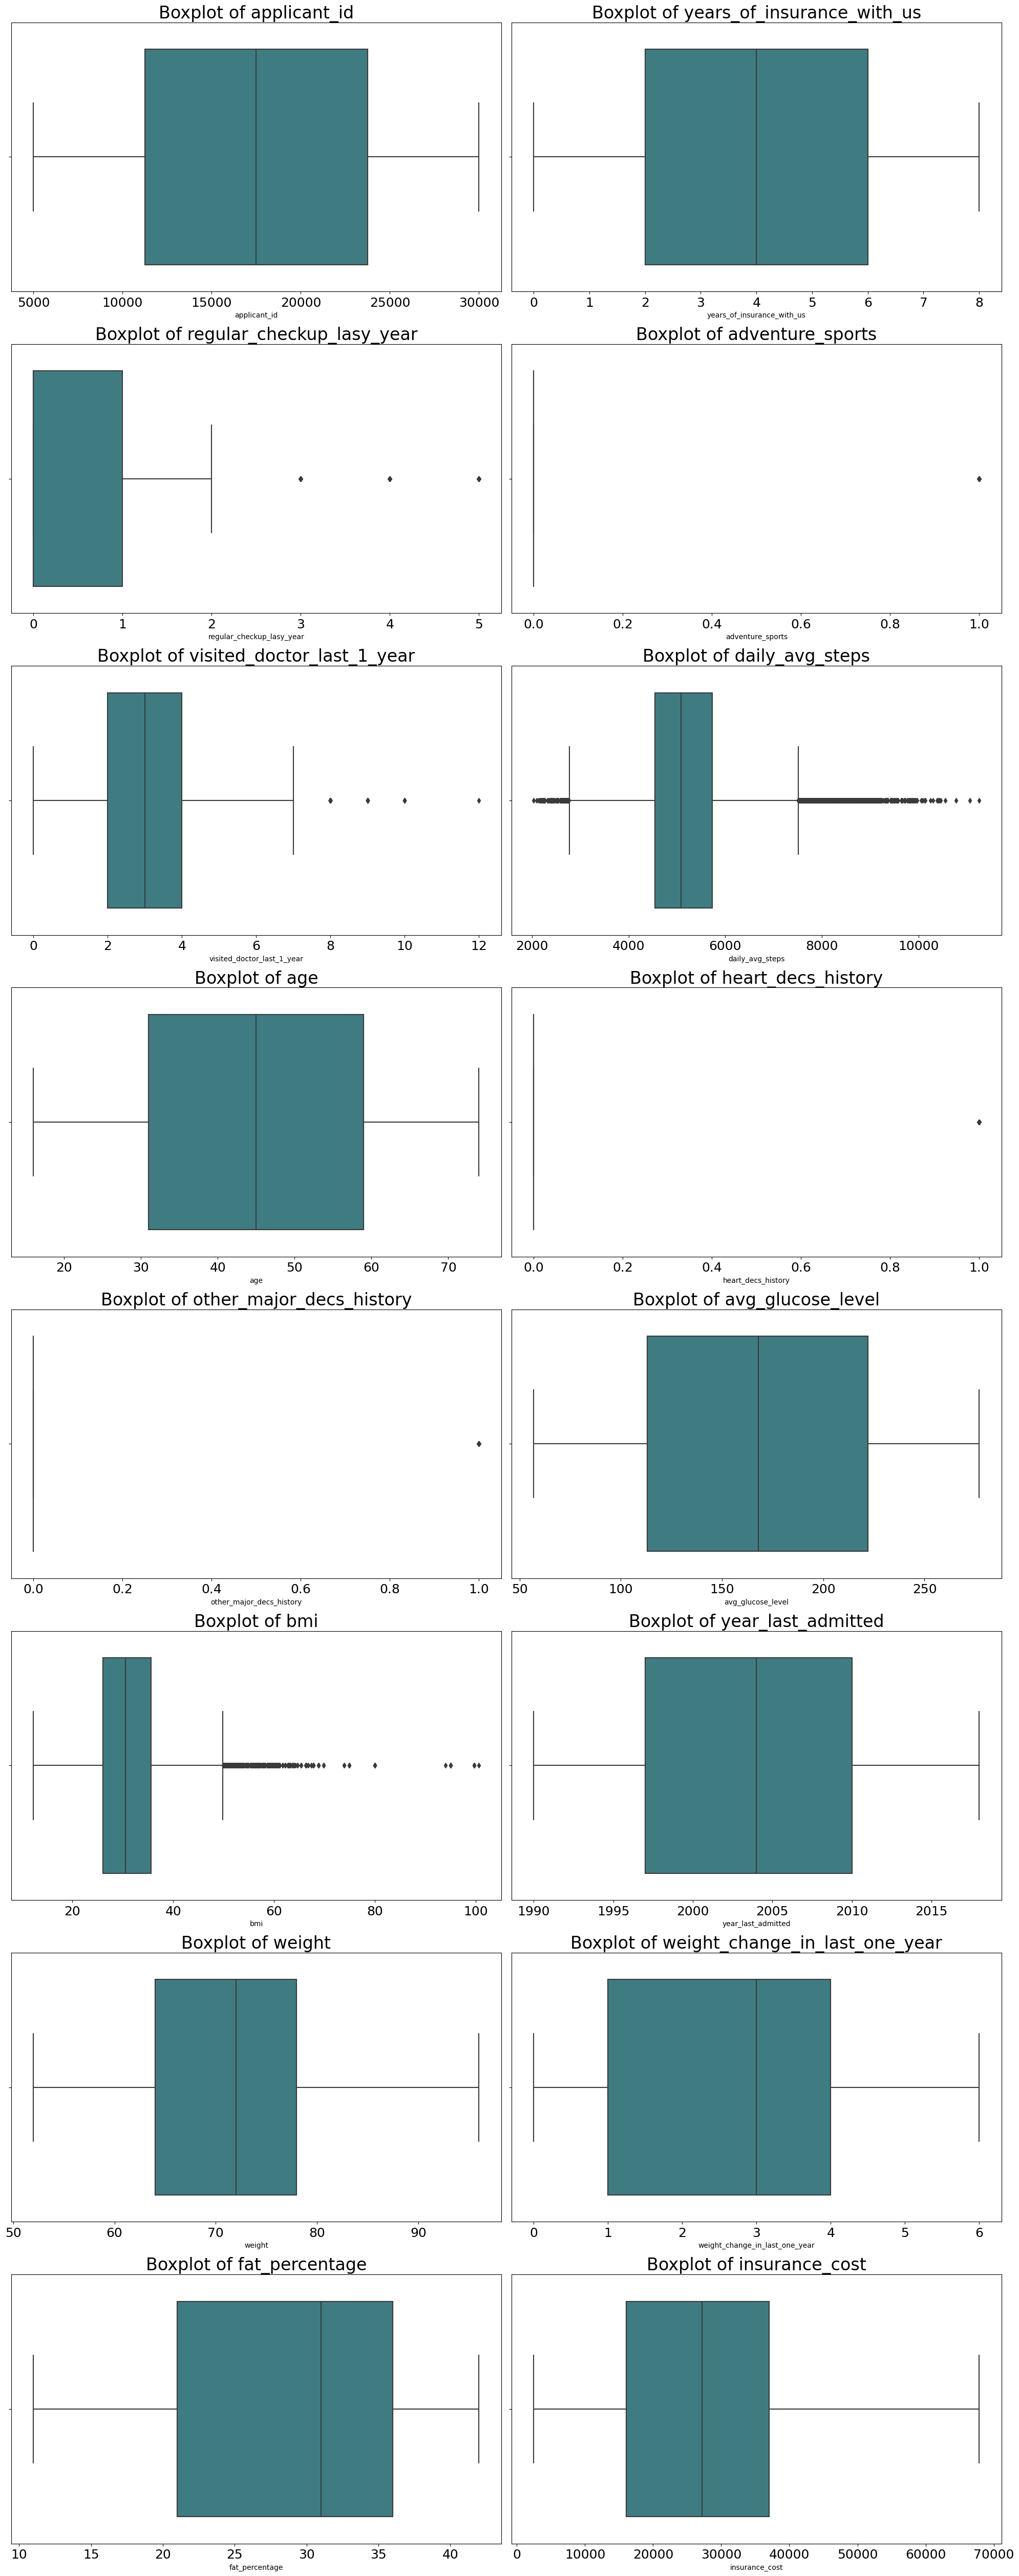

In [18]:
plt.figure(figsize=(20,75))
features=df_num.columns
for f in range(0,len(features)):
    plt.subplot(12,2,f+1)
    sns.boxplot(data=df_num,x=df_num.columns[f],palette='crest')
    plt.title(f"Boxplot of {df_num.columns[f]}",fontsize=24)
    plt.xticks(fontsize=18)
    plt.tight_layout();

C:\Users\hp\AppData\Local\Temp\ipykernel_46220\797061915.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\797061915.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\797061915.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\797061915.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\797061915.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\797061915.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\797061915.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_

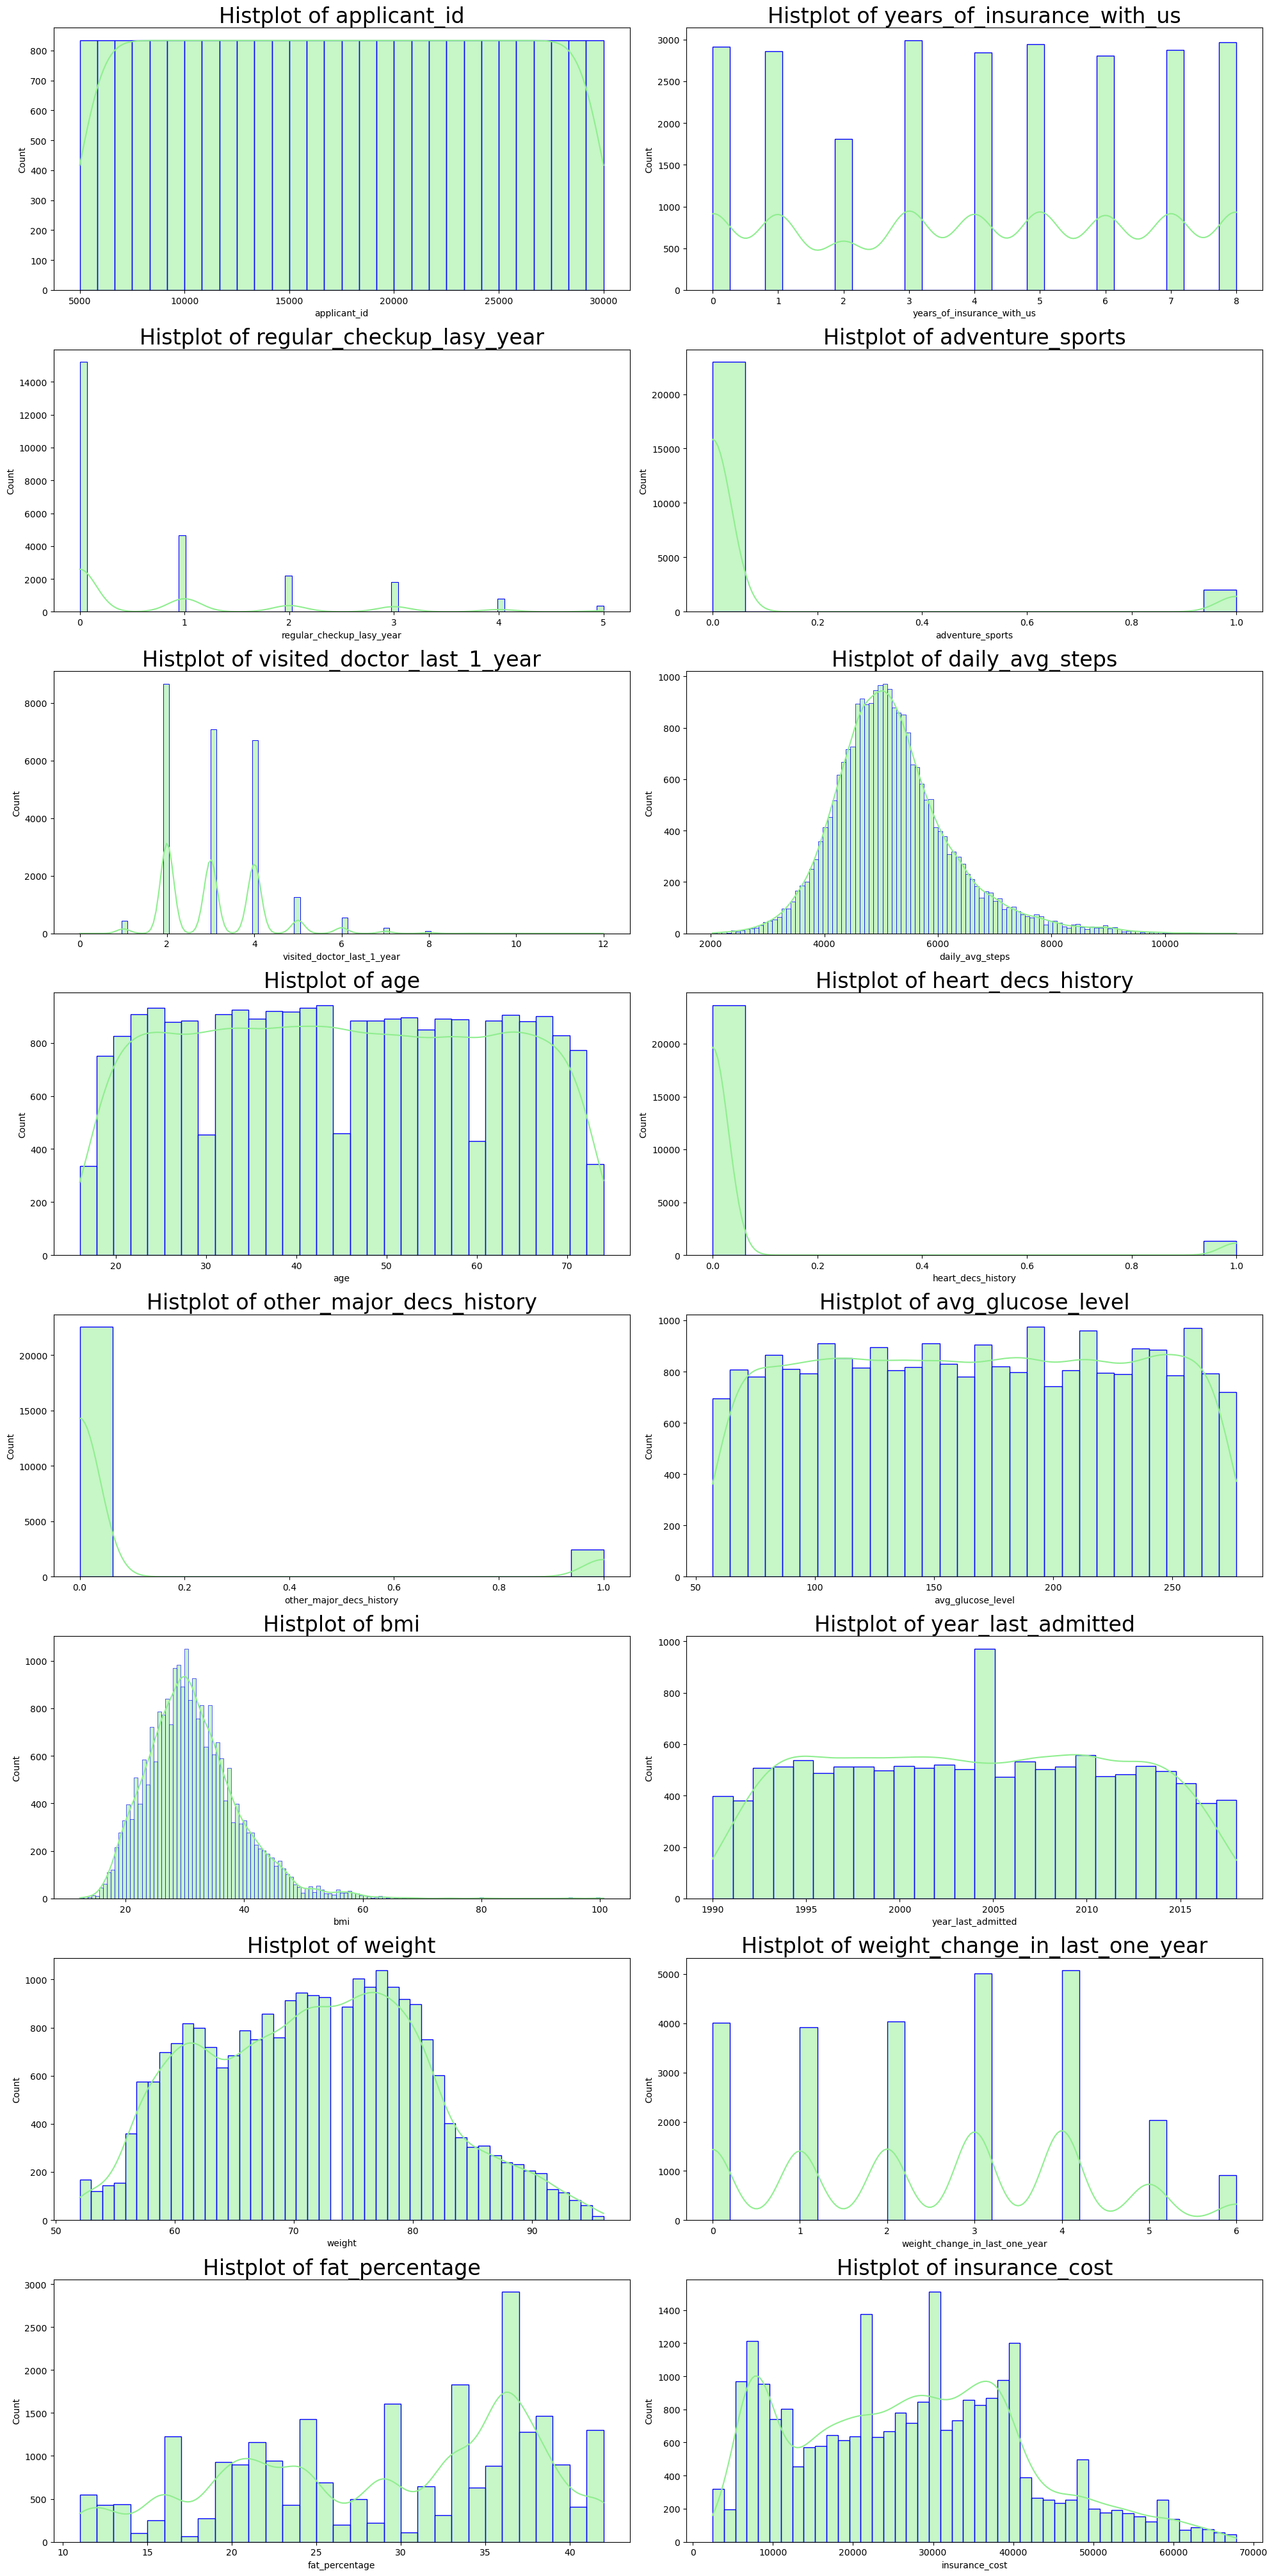

In [19]:
plt.figure(figsize=(20,60))
features=df_num.columns
for f in range(0,len(features)):
    plt.subplot(12,2,f+1)
    sns.histplot(data=df_num,x=df_num.columns[f],kde=True,color='lightgreen',edgecolor='blue')
    plt.title(f"Histplot of {df_num.columns[f]}",fontsize=24)
    plt.tight_layout();

In [20]:
df_cat.head()

occupation cholesterol_level  gender   smoking_status   location  \
0   Salaried        125 to 150    Male          Unknown    Chennai   
1    Student        150 to 175    Male  formerly smoked     Jaipur   
2   Business        200 to 225  Female  formerly smoked     Jaipur   
3   Business        175 to 200  Female          Unknown    Chennai   
4    Student        150 to 175    Male     never smoked  Bangalore   

  covered_by_any_other_company alcohol  exercise  
0                            N    Rare  Moderate  
1                            N    Rare  Moderate  
2                            N   Daily   Extreme  
3                            Y    Rare        No  
4                            N      No   Extreme

In [21]:
df_cat.describe().T

count unique           top   freq
occupation                    25000      3       Student  10169
cholesterol_level             25000      5    150 to 175   8763
gender                        25000      2          Male  16422
smoking_status                25000      4  never smoked   9249
location                      25000     15     Bangalore   1742
covered_by_any_other_company  25000      2             N  17418
alcohol                       25000      3          Rare  13752
exercise                      25000      3      Moderate  14638

In [22]:
df_num.head()

applicant_id  years_of_insurance_with_us  regular_checkup_lasy_year  \
0          5000                           3                          1   
1          5001                           0                          0   
2          5002                           1                          0   
3          5003                           7                          4   
4          5004                           3                          1   

   adventure_sports  visited_doctor_last_1_year  daily_avg_steps  age  \
0                 1                           2             4866   28   
1                 0                           4             6411   50   
2                 0                           4             4509   68   
3                 0                           2             6214   51   
4                 0                           2             4938   44   

   heart_decs_history  other_major_decs_history  avg_glucose_level   bmi  \
0                   1                         0                 97  31.2   
1                   0                         0                212  34.2   
2                   0                         0                166  40.4   
3                   0                         0                109  22.9   
4                   0                         1                118  26.5   

   year_last_admitted  weight  weight_change_in_last_one_year  fat_percentage  \
0                 NaN      67                               1              25   
1                 NaN      58                               3              27   
2                 NaN      73                               0              32   
3                 NaN      71                               3              37   
4              2004.0      74                               0              34   

   insurance_cost  
0           20978  
1            6170  
2           28382  
3           27148  
4           29616

In [23]:
df_num.describe().T

count          mean           std     min  \
applicant_id                    25000.0  17499.500000   7217.022701  5000.0   
years_of_insurance_with_us      25000.0      4.089040      2.606612     0.0   
regular_checkup_lasy_year       25000.0      0.773680      1.199449     0.0   
adventure_sports                25000.0      0.081720      0.273943     0.0   
visited_doctor_last_1_year      25000.0      3.104200      1.141663     0.0   
daily_avg_steps                 25000.0   5215.889320   1053.179748  2034.0   
age                             25000.0     44.918320     16.107492    16.0   
heart_decs_history              25000.0      0.054640      0.227281     0.0   
other_major_decs_history        25000.0      0.098160      0.297537     0.0   
avg_glucose_level               25000.0    167.530000     62.729712    57.0   
bmi                             24010.0     31.393328      7.876535    12.3   
year_last_admitted              13119.0   2003.892217      7.581521  1990.0   
weight                          25000.0     71.610480      9.325183    52.0   
weight_change_in_last_one_year  25000.0      2.517960      1.690335     0.0   
fat_percentage                  25000.0     28.812280      8.632382    11.0   
insurance_cost                  25000.0  27147.407680  14323.691832  2468.0   

                                     25%      50%       75%      max  
applicant_id                    11249.75  17499.5  23749.25  29999.0  
years_of_insurance_with_us          2.00      4.0      6.00      8.0  
regular_checkup_lasy_year           0.00      0.0      1.00      5.0  
adventure_sports                    0.00      0.0      0.00      1.0  
visited_doctor_last_1_year          2.00      3.0      4.00     12.0  
daily_avg_steps                  4543.00   5089.0   5730.00  11255.0  
age                                31.00     45.0     59.00     74.0  
heart_decs_history                  0.00      0.0      0.00      1.0  
other_major_decs_history            0.00      0.0      0.00      1.0  
avg_glucose_level                 113.00    168.0    222.00    277.0  
bmi                                26.10     30.5     35.60    100.6  
year_last_admitted               1997.00   2004.0   2010.00   2018.0  
weight                             64.00     72.0     78.00     96.0  
weight_change_in_last_one_year      1.00      3.0      4.00      6.0  
fat_percentage                     21.00     31.0     36.00     42.0  
insurance_cost                  16042.00  27148.0  37020.00  67870.0

1. Problem Understanding <br>
a) Defining problem statement <br> 
b) Need of the study/project <br> 
c) Understanding business/social opportunity 
- 4 marks

2. Data Report <br>
a) Understanding how data was collected in terms of time, frequency and methodology <br>
b) Visual inspection of data (rows, columns, descriptive details) <br>
c) Understanding of attributes (variable info, renaming if required) <br> 
- 2 marks

3. Exploratory Data Analysis <br>
a) Univariate analysis (distribution and spread for every continuous attribute, distribution of data in categories for categorical ones) <br>
b) Bivariate analysis (relationship between different variables, correlations) <br>
c) Removal of unwanted variables (if applicable) b) Missing Value treatment (if applicable) <br>
d) Outlier treatment (if required) <br>
e) Variable transformation (if applicable) f) Addition of new variables (if required) <br>
- 10 marks

4. Business insights from EDA <br>
a) Is the data unbalanced? If so, what can be done? Please explain in the context of the business <br>
b) Any business insights using clustering (if applicable) <br>
c) Any other business insights <br>
- 4 marks

C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3582637954.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3582637954.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3582637954.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3582637954.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3582637954.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3582637954.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3582637954.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout();


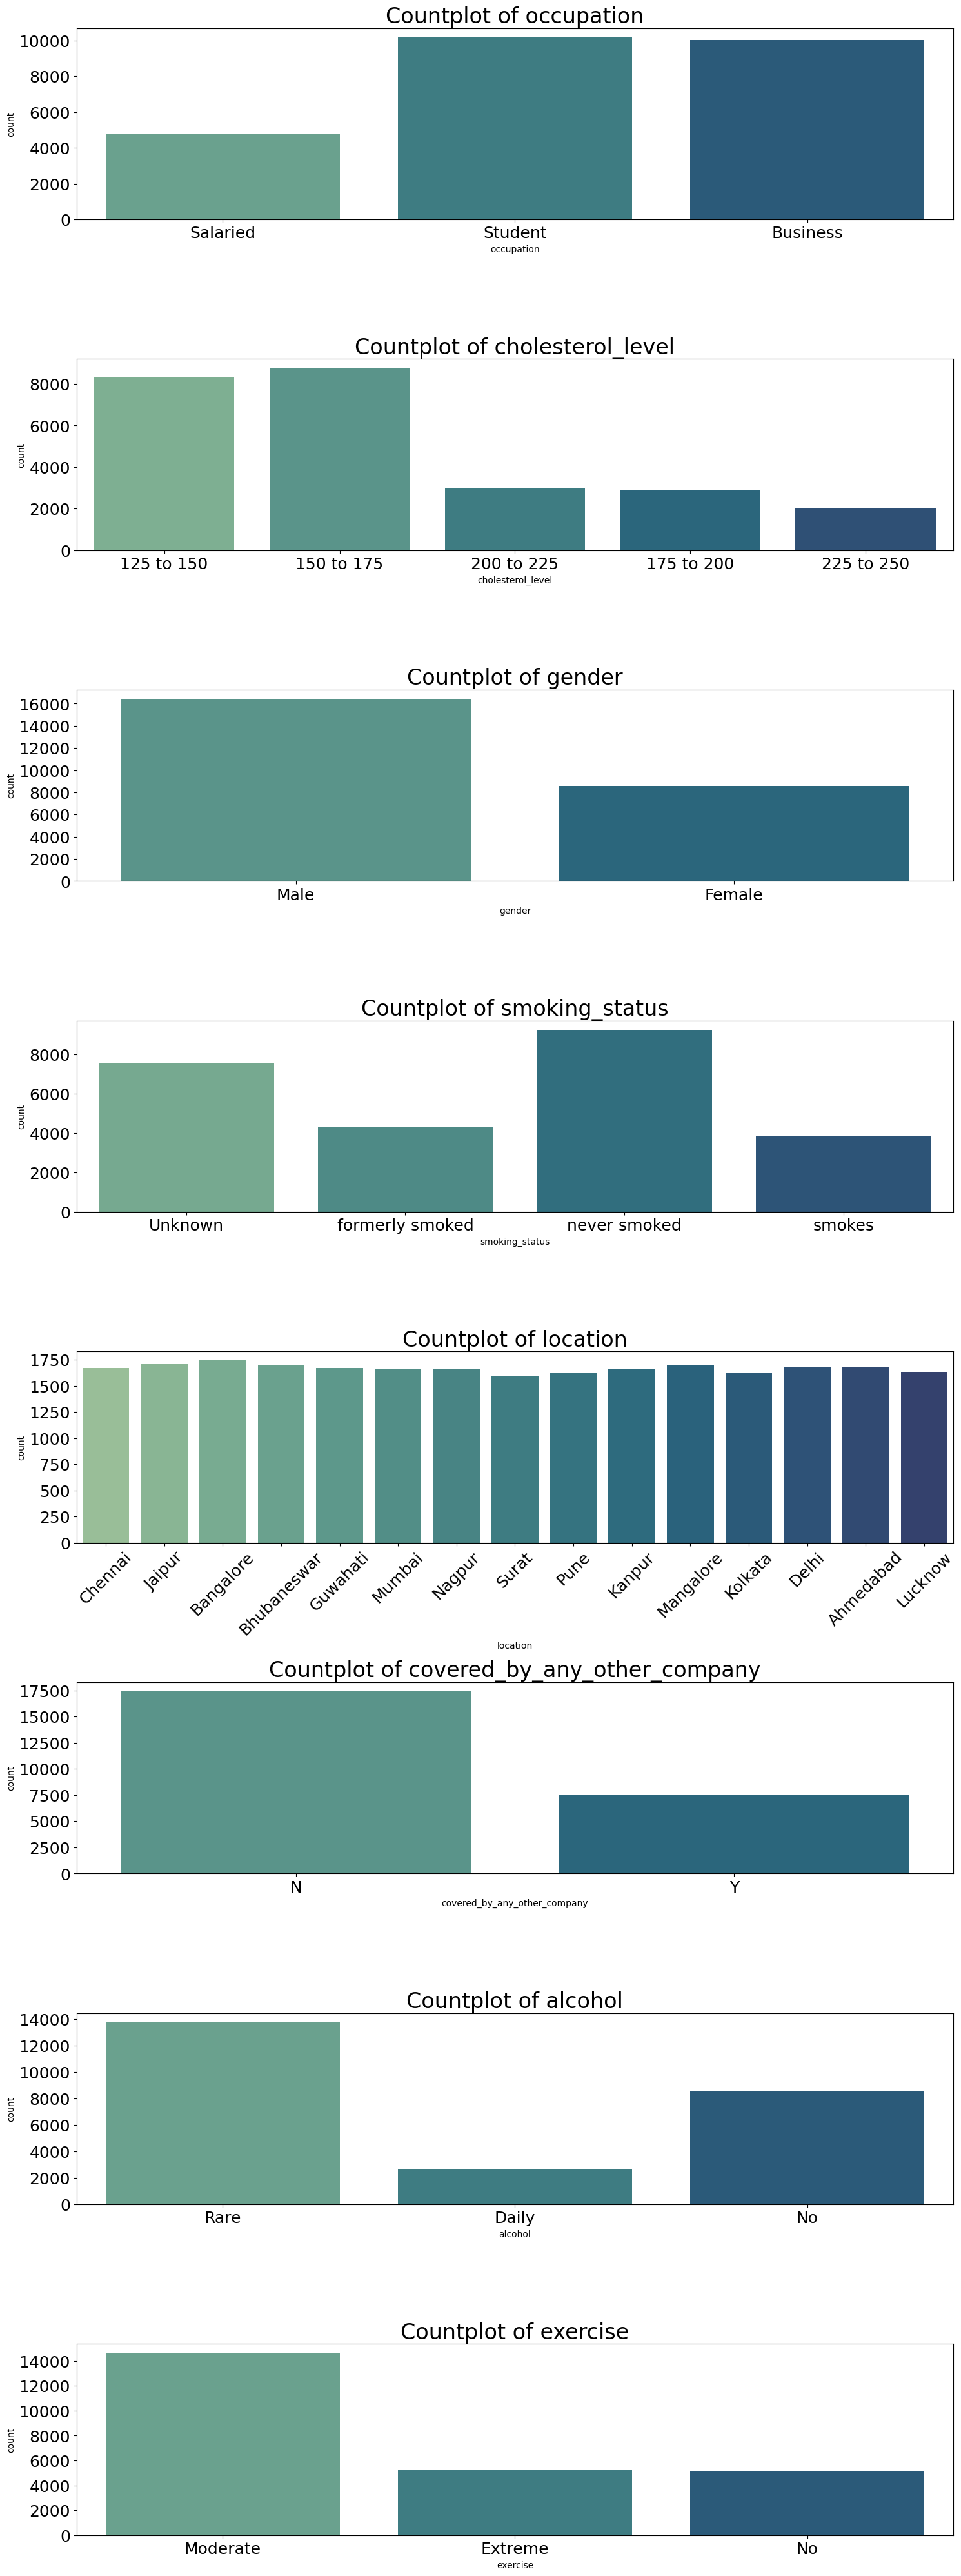

In [24]:
### df_cat EDA
plt.figure(figsize=(15,60))
for f in range(0,len(df_cat.columns)):
    plt.subplot(12,1,f+1)
    sns.countplot(data=df_cat,x=df_cat.columns[f],palette='crest')
    plt.title(f"Countplot of {df_cat.columns[f]}",fontsize=24)
    if df_cat.columns[f]=='location':
        plt.xticks(rotation=45,fontsize=18)
        plt.yticks(fontsize=18)
    else:
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
    plt.tight_layout();

In [25]:
#sns.pairplot(data=df_num);

In [26]:
### typo in column name found and corrected
df_num.rename(columns={'regular_checkup_lasy_year':'regular_checkup_last_year'},inplace=True)

In [27]:
df_num.columns

Index(['applicant_id', 'years_of_insurance_with_us',
       'regular_checkup_last_year', 'adventure_sports',
       'visited_doctor_last_1_year', 'daily_avg_steps', 'age',
       'heart_decs_history', 'other_major_decs_history', 'avg_glucose_level',
       'bmi', 'year_last_admitted', 'weight', 'weight_change_in_last_one_year',
       'fat_percentage', 'insurance_cost'],
      dtype='object')

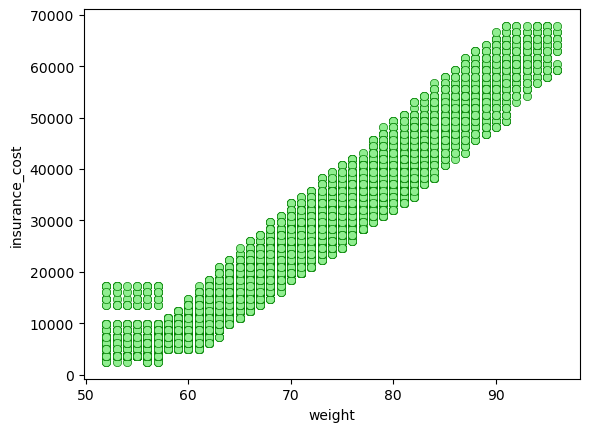

In [28]:
sns.scatterplot(data=df_num,x=df_num.weight,y=df_num.insurance_cost,color='lightgreen',edgecolor='g');

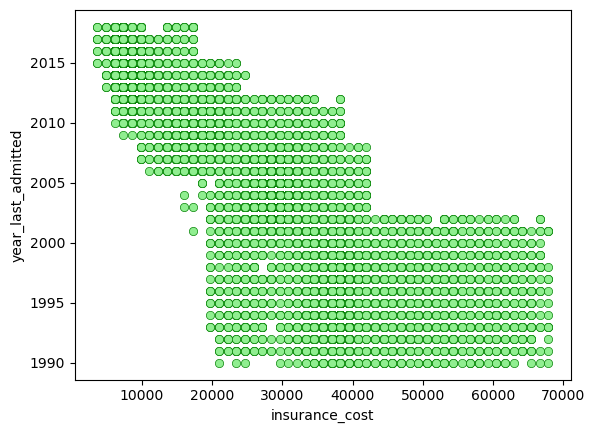

In [29]:
sns.scatterplot(data=df_num,x=df_num.insurance_cost,y=df_num.year_last_admitted,color='lightgreen',edgecolor='g');

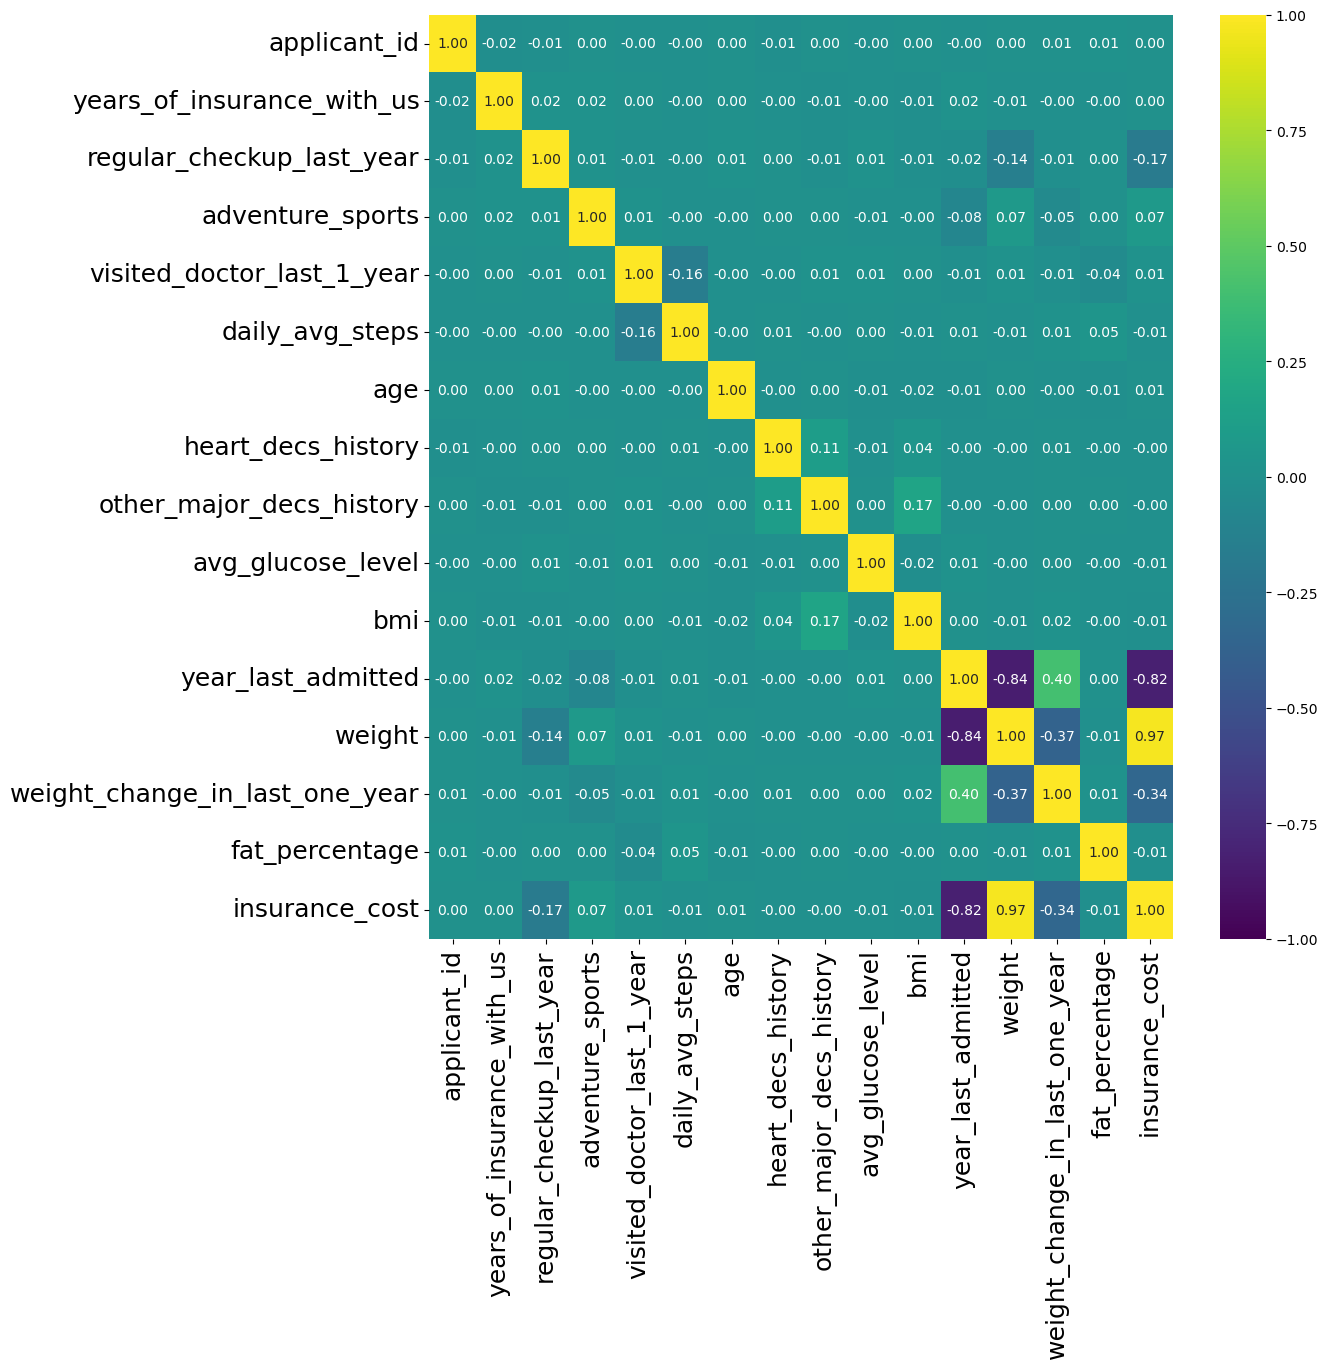

In [30]:
corr=df_num.corr()
plt.figure(figsize=(12,12))
sns.heatmap(data=corr,annot=True,fmt='.2f',vmin=-1,vmax=1,cmap='viridis')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

In [31]:
df.rename(columns={"regular_checkup_lasy_year":"regular_checkup_last_year"},inplace=True)

In [32]:
df.columns

Index(['applicant_id', 'years_of_insurance_with_us',
       'regular_checkup_last_year', 'adventure_sports', 'occupation',
       'visited_doctor_last_1_year', 'cholesterol_level', 'daily_avg_steps',
       'age', 'heart_decs_history', 'other_major_decs_history', 'gender',
       'avg_glucose_level', 'bmi', 'smoking_status', 'year_last_admitted',
       'location', 'weight', 'covered_by_any_other_company', 'alcohol',
       'exercise', 'weight_change_in_last_one_year', 'fat_percentage',
       'insurance_cost'],
      dtype='object')

In [33]:
df.isnull().sum()

applicant_id                          0
years_of_insurance_with_us            0
regular_checkup_last_year             0
adventure_sports                      0
occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
year_last_admitted                11881
location                              0
weight                                0
covered_by_any_other_company          0
alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

In [34]:
df.drop(['applicant_id'],axis=1,inplace=True)

In [35]:
df.columns

Index(['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'occupation', 'visited_doctor_last_1_year',
       'cholesterol_level', 'daily_avg_steps', 'age', 'heart_decs_history',
       'other_major_decs_history', 'gender', 'avg_glucose_level', 'bmi',
       'smoking_status', 'year_last_admitted', 'location', 'weight',
       'covered_by_any_other_company', 'alcohol', 'exercise',
       'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost'],
      dtype='object')

In [36]:
df.shape

(25000, 23)

In [37]:
(990/25000)*100

3.9600000000000004

In [38]:
(11881/25000)*100

47.524

In [39]:
# dropped because there were too many missing values to treat
df.drop(['year_last_admitted'],axis=1,inplace=True)

In [40]:
df.bmi=df.bmi.fillna(df.bmi.median())

In [41]:
df.isna().sum()

years_of_insurance_with_us        0
regular_checkup_last_year         0
adventure_sports                  0
occupation                        0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
gender                            0
avg_glucose_level                 0
bmi                               0
smoking_status                    0
location                          0
weight                            0
covered_by_any_other_company      0
alcohol                           0
exercise                          0
weight_change_in_last_one_year    0
fat_percentage                    0
insurance_cost                    0
dtype: int64

In [42]:
df_num=df.select_dtypes(['float64','int64'])
df_cat=df.select_dtypes(['object'])

In [43]:
df_num=pd.DataFrame(df_num)

C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3980642600.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3980642600.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3980642600.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3980642600.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3980642600.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3980642600.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3980642600.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipy

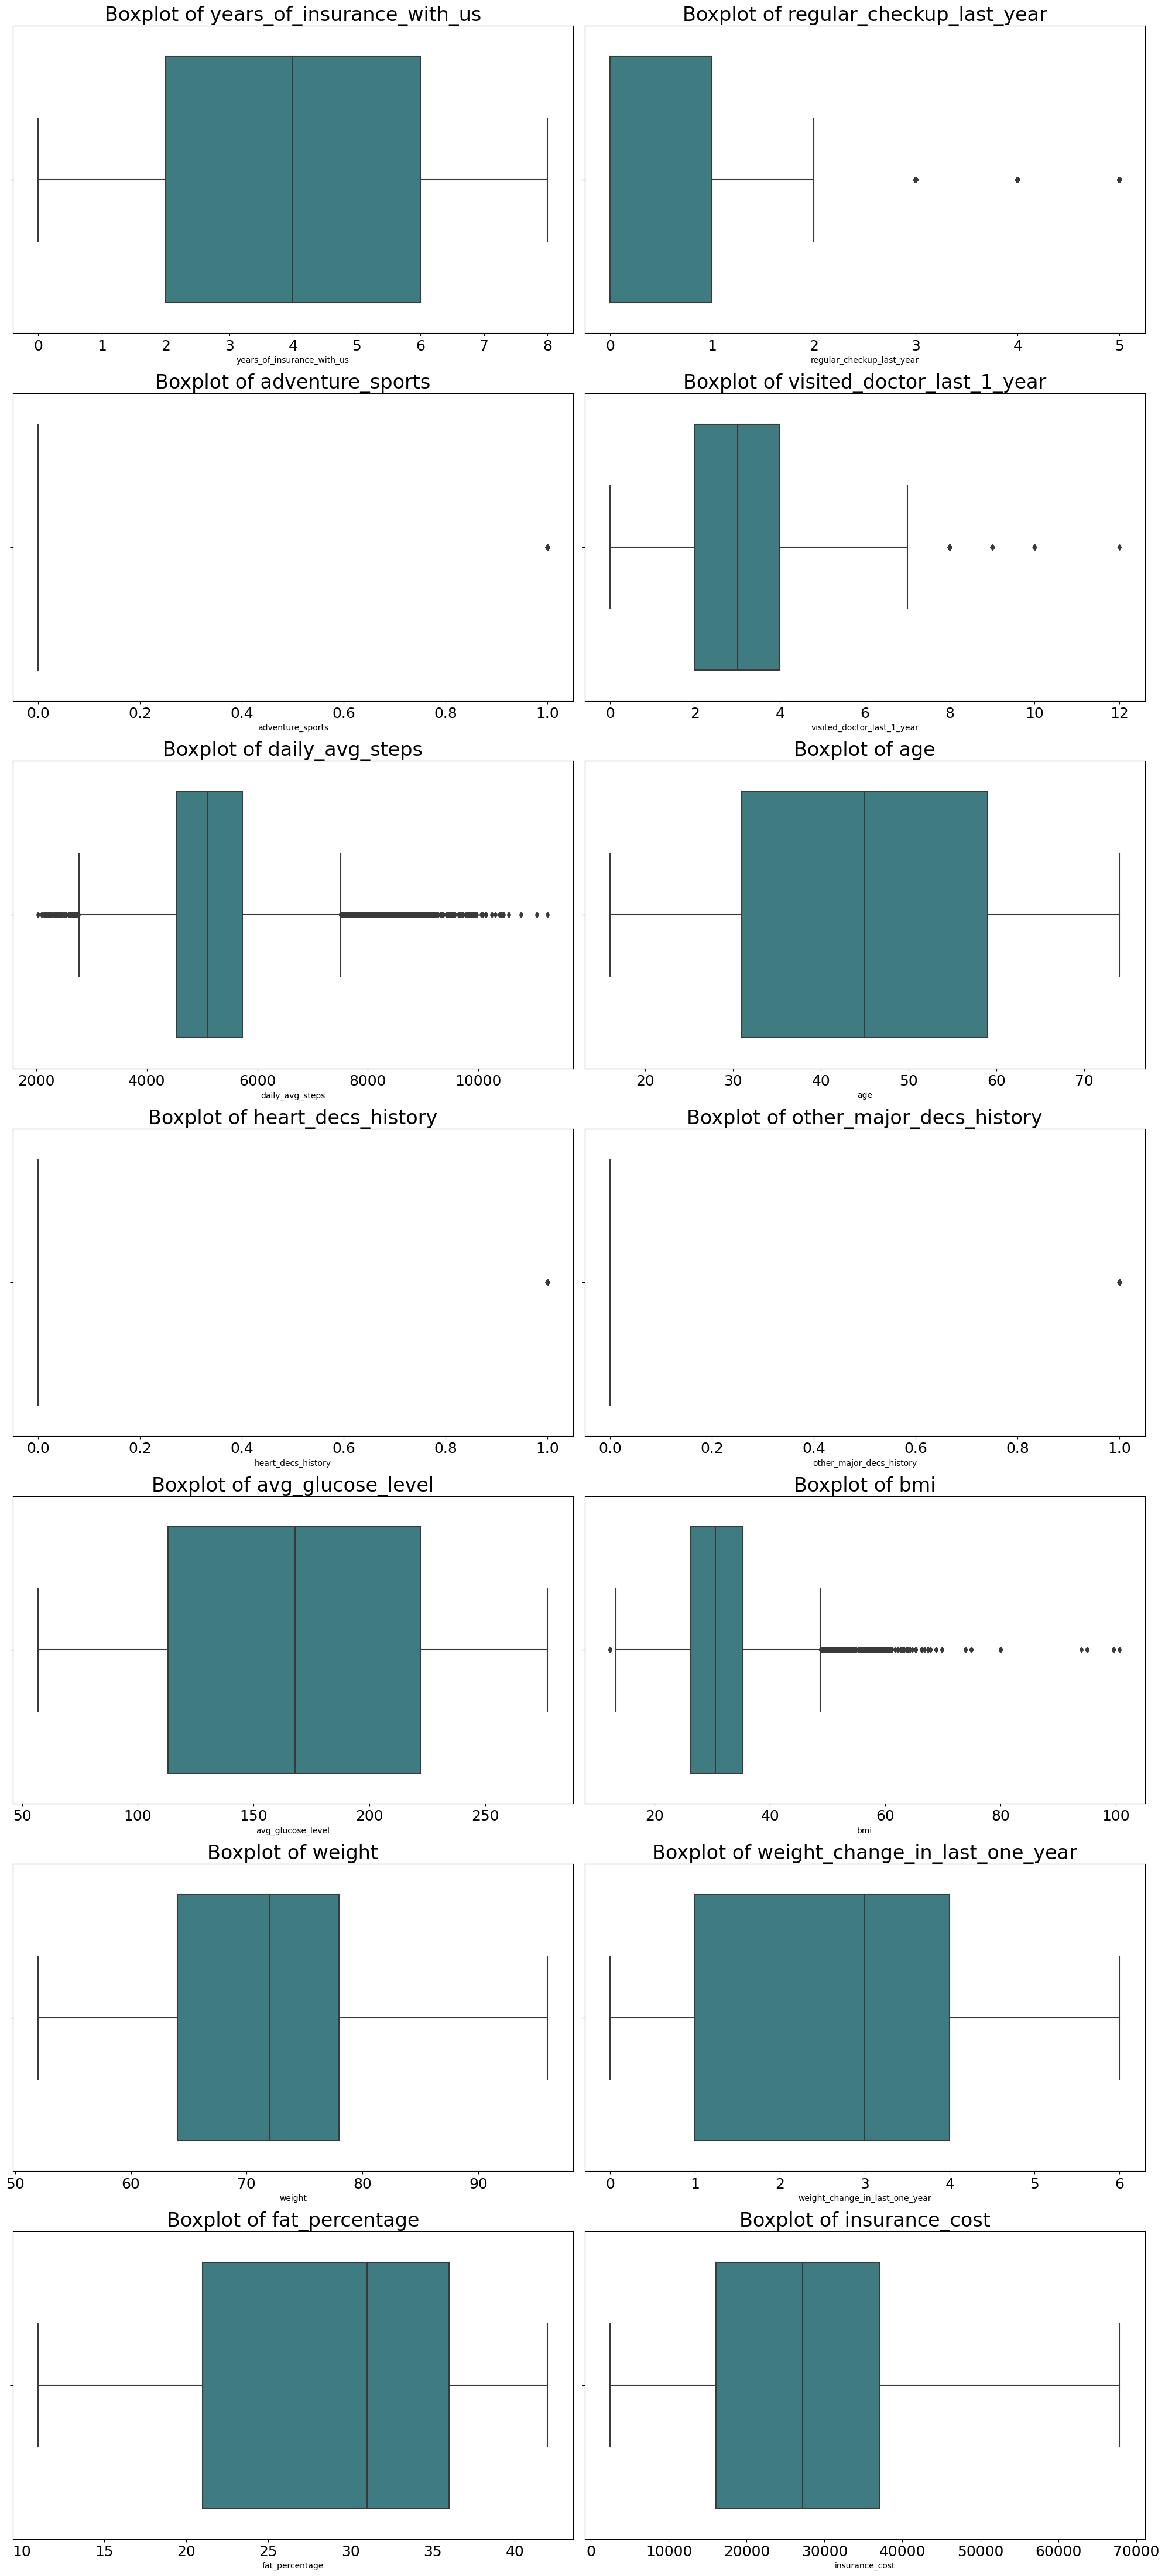

In [44]:
plt.figure(figsize=(20,75))
features=df_num.columns
for f in range(0,len(features)):
    plt.subplot(12,2,f+1)
    sns.boxplot(data=df_num,x=df_num.columns[f],palette='crest')
    plt.title(f"Boxplot of {df_num.columns[f]}",fontsize=24)
    plt.xticks(fontsize=18)
    plt.tight_layout();

In [45]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    upperrange=Q3+(1.5*IQR)
    lowerrange=Q1-(1.5*IQR)
    return upperrange,lowerrange

In [46]:
Q1=df_num.quantile(0.25)
Q3=df_num.quantile(0.75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

In [47]:
### UNIVARIATE
((df_num > UL) | (df_num < LL)).sum()

years_of_insurance_with_us           0
regular_checkup_last_year         2943
adventure_sports                  2043
visited_doctor_last_1_year          96
daily_avg_steps                    952
age                                  0
heart_decs_history                1366
other_major_decs_history          2454
avg_glucose_level                    0
bmi                                624
weight                               0
weight_change_in_last_one_year       0
fat_percentage                       0
insurance_cost                       0
dtype: int64

In [48]:
df_num[df_num.regular_checkup_last_year<0]

Empty DataFrame
Columns: [years_of_insurance_with_us, regular_checkup_last_year, adventure_sports, visited_doctor_last_1_year, daily_avg_steps, age, heart_decs_history, other_major_decs_history, avg_glucose_level, bmi, weight, weight_change_in_last_one_year, fat_percentage, insurance_cost]
Index: []

In [49]:
df_num[df_num.visited_doctor_last_1_year<0]

Empty DataFrame
Columns: [years_of_insurance_with_us, regular_checkup_last_year, adventure_sports, visited_doctor_last_1_year, daily_avg_steps, age, heart_decs_history, other_major_decs_history, avg_glucose_level, bmi, weight, weight_change_in_last_one_year, fat_percentage, insurance_cost]
Index: []

In [50]:
df_num[df_num.daily_avg_steps<0]

Empty DataFrame
Columns: [years_of_insurance_with_us, regular_checkup_last_year, adventure_sports, visited_doctor_last_1_year, daily_avg_steps, age, heart_decs_history, other_major_decs_history, avg_glucose_level, bmi, weight, weight_change_in_last_one_year, fat_percentage, insurance_cost]
Index: []

In [51]:
df_num[df_num.bmi<0]

Empty DataFrame
Columns: [years_of_insurance_with_us, regular_checkup_last_year, adventure_sports, visited_doctor_last_1_year, daily_avg_steps, age, heart_decs_history, other_major_decs_history, avg_glucose_level, bmi, weight, weight_change_in_last_one_year, fat_percentage, insurance_cost]
Index: []

In [52]:
df_num[df_num.bmi==100.6]

years_of_insurance_with_us  regular_checkup_last_year  adventure_sports  \
7389                           5                          0                 0   

      visited_doctor_last_1_year  daily_avg_steps  age  heart_decs_history  \
7389                           4             5101   38                   0   

      other_major_decs_history  avg_glucose_level    bmi  weight  \
7389                         1                165  100.6      95   

      weight_change_in_last_one_year  fat_percentage  insurance_cost  
7389                               2              35           57998

In [53]:
df_num[df_num.bmi>75]

years_of_insurance_with_us  regular_checkup_last_year  \
430                             3                          0   
1757                            4                          0   
2859                            4                          0   
3513                            4                          0   
6084                            6                          0   
7389                            5                          0   
8385                            1                          0   
9376                            2                          0   
11127                           3                          2   
15398                           4                          0   
20244                           3                          1   
22150                           8                          0   
23924                           5                          1   
24327                           6                          3   
24902                           0                          0   

       adventure_sports  visited_doctor_last_1_year  daily_avg_steps  age  \
430                   0                           4             4159   18   
1757                  0                           2             6210   27   
2859                  0                           3             4600   59   
3513                  1                           1             4360   39   
6084                  0                           2             6027   26   
7389                  0                           4             5101   38   
8385                  0                           2             4962   22   
9376                  0                           4             5278   59   
11127                 0                           5             4639   66   
15398                 0                           4             5576   38   
20244                 0                           2             6560   18   
22150                 0                           3             5091   28   
23924                 0                           4             5116   59   
24327                 0                           2             5313   44   
24902                 0                           2             5357   67   

       heart_decs_history  other_major_decs_history  avg_glucose_level    bmi  \
430                     0                         1                253   99.6   
1757                    0                         1                 99   80.0   
2859                    0                         1                 94   95.0   
3513                    0                         1                132   95.0   
6084                    0                         1                 73   94.0   
7389                    0                         1                165  100.6   
8385                    0                         1                155   99.6   
9376                    0                         1                 77   80.0   
11127                   0                         1                208   99.6   
15398                   0                         1                232   80.0   
20244                   0                         1                212   99.6   
22150                   0                         1                140   80.0   
23924                   0                         1                 97   80.0   
24327                   0                         1                101   95.0   
24902                   0                         1                145   95.0   

       weight  weight_change_in_last_one_year  fat_percentage  insurance_cost  
430        69                               2              24           25914  
1757       75                               1              18           34552  
2859       72                               1              20           29616  
3513       65                               5              39           22212  
6084       87                               4       

In [54]:
df.daily_avg_steps.max()

11255

In [55]:
ur,lr=remove_outlier(df_num.bmi)
df_num.bmi=np.where(df_num.bmi>ur,ur,df_num.bmi)
df_num.bmi=np.where(df_num.bmi<lr,lr,df_num.bmi)

In [56]:
ur,lr

(48.79999999999999, 12.800000000000006)

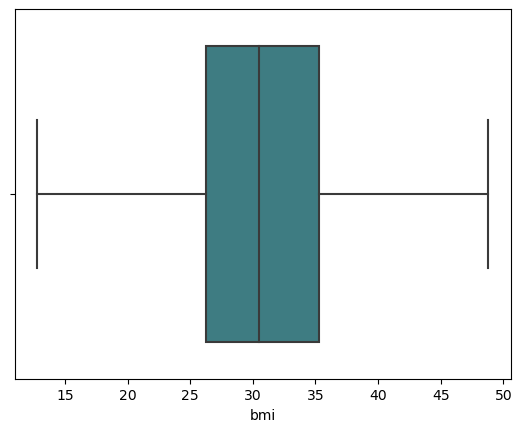

In [57]:
sns.boxplot(data=df_num,x=df_num.bmi,palette='crest');

In [58]:
df_cat.columns

Index(['occupation', 'cholesterol_level', 'gender', 'smoking_status',
       'location', 'covered_by_any_other_company', 'alcohol', 'exercise'],
      dtype='object')

In [59]:
df_cat.covered_by_any_other_company.value_counts()

covered_by_any_other_company
N    17418
Y     7582
Name: count, dtype: int64

In [60]:
df_cat['covered_by_any_other_company']=np.where(df_cat['covered_by_any_other_company']=='N',0,df_cat['covered_by_any_other_company'])
df_cat['covered_by_any_other_company']=np.where(df_cat['covered_by_any_other_company']=='Y',1,df_cat['covered_by_any_other_company'])

In [61]:
df_cat['alcohol']=np.where(df_cat['alcohol']=='No',0,df_cat['alcohol'])
df_cat['alcohol']=np.where(df_cat['alcohol']=='Rare',1,df_cat['alcohol'])
df_cat['alcohol']=np.where(df_cat['alcohol']=='Daily',2,df_cat['alcohol'])

In [62]:
df_cat.exercise.value_counts()

exercise
Moderate    14638
Extreme      5248
No           5114
Name: count, dtype: int64

In [63]:
df_cat['exercise']=np.where(df_cat['exercise']=='No',0,df_cat['exercise'])
df_cat['exercise']=np.where(df_cat['exercise']=='Moderate',1,df_cat['exercise'])
df_cat['exercise']=np.where(df_cat['exercise']=='Extreme',2,df_cat['exercise'])

In [64]:
df_cat.head()

occupation cholesterol_level  gender   smoking_status   location  \
0   Salaried        125 to 150    Male          Unknown    Chennai   
1    Student        150 to 175    Male  formerly smoked     Jaipur   
2   Business        200 to 225  Female  formerly smoked     Jaipur   
3   Business        175 to 200  Female          Unknown    Chennai   
4    Student        150 to 175    Male     never smoked  Bangalore   

  covered_by_any_other_company alcohol exercise  
0                            0       1        1  
1                            0       1        1  
2                            0       2        2  
3                            1       1        0  
4                            0       0        2

In [65]:
df_cat.cholesterol_level.value_counts()   

cholesterol_level
150 to 175    8763
125 to 150    8339
200 to 225    2963
175 to 200    2881
225 to 250    2054
Name: count, dtype: int64

In [66]:
df_cat['cholesterol_level']=np.where(df_cat['cholesterol_level']=='125 to 150',1,df_cat['cholesterol_level'])
df_cat['cholesterol_level']=np.where(df_cat['cholesterol_level']=='150 to 175',2,df_cat['cholesterol_level'])
df_cat['cholesterol_level']=np.where(df_cat['cholesterol_level']=='175 to 200',3,df_cat['cholesterol_level'])
df_cat['cholesterol_level']=np.where(df_cat['cholesterol_level']=='200 to 225',4,df_cat['cholesterol_level'])
df_cat['cholesterol_level']=np.where(df_cat['cholesterol_level']=='225 to 250',5,df_cat['cholesterol_level'])

In [67]:
df_cat

occupation cholesterol_level  gender   smoking_status     location  \
0       Salaried                 1    Male          Unknown      Chennai   
1        Student                 2    Male  formerly smoked       Jaipur   
2       Business                 4  Female  formerly smoked       Jaipur   
3       Business                 3  Female          Unknown      Chennai   
4        Student                 2    Male     never smoked    Bangalore   
...          ...               ...     ...              ...          ...   
24995   Salaried                 5    Male           smokes       Kanpur   
24996   Business                 4    Male     never smoked       Kanpur   
24997    Student                 2    Male          Unknown  Bhubaneswar   
24998   Salaried                 5    Male          Unknown        Surat   
24999   Business                 2    Male  formerly smoked      Chennai   

      covered_by_any_other_company alcohol exercise  
0                                0       1        1  
1                                0       1        1  
2                                0       2        2  
3                                1       1        0  
4                                0       0        2  
...                            ...     ...      ...  
24995                            1       1        1  
24996                            0       1        1  
24997                            0       1        1  
24998                            0       1        1  
24999                            0       0        0  

[25000 rows x 8 columns]

In [68]:
df_num['cholesterol_level']=df_cat['cholesterol_level']

In [69]:
df_num['covered_by_any_other_company']=df_cat['covered_by_any_other_company']

In [70]:
df_num['alcohol_intake']=df_cat['alcohol']

In [71]:
df_num['exercise_frequency']=df_cat['exercise']

In [72]:
df_num

years_of_insurance_with_us  regular_checkup_last_year  \
0                               3                          1   
1                               0                          0   
2                               1                          0   
3                               7                          4   
4                               3                          1   
...                           ...                        ...   
24995                           3                          0   
24996                           6                          0   
24997                           7                          0   
24998                           1                          0   
24999                           8                          2   

       adventure_sports  visited_doctor_last_1_year  daily_avg_steps  age  \
0                     1                           2             4866   28   
1                     0                           4             6411   50   
2                     0                           4             4509   68   
3                     0                           2             6214   51   
4                     0                           2             4938   44   
...                 ...                         ...              ...  ...   
24995                 0                           4             5614   22   
24996                 0                           4             4719   58   
24997                 1                           2             5624   34   
24998                 0                           2            10777   27   
24999                 0                           4             5882   22   

       heart_decs_history  other_major_decs_history  avg_glucose_level   bmi  \
0                       1                         0                 97  31.2   
1                       0                         0                212  34.2   
2                       0                         0                166  40.4   
3                       0                         0                109  22.9   
4                       0                         1                118  26.5   
...                   ...                       ...                ...   ...   
24995                   0                         0                145  36.1   
24996                   0                         0                134  31.3   
24997                   0                         1                151  30.5   
24998                   0                         0                 66  26.6   
24999                   1                         0                245  41.6   

       weight  weight_change_in_last_one_year  fat_percentage  insurance_cost  \
0          67                               1              25           20978   
1          58                               3              27            6170   
2          73                               0              32           28382   
3          71                               3              37           27148   
4          74                               0              34           29616   
...       ...                             ...             ...             ...   
24995      79                               4              40           39488   
24996      66                               2              28           14808   
24997      76                               1              35           33318   
24998      74                               0              40           30850   
24999      57                               4              21            6170   

      cholesterol_level covered_by_any_other_company alcohol_intake  \
0                     1                            0              1   
1                     2                            0              1   
2                     4                            0              2   
3                     3                            1              1   
4                     2 

### DF_NUM is ok till here

In [73]:
df_cat.drop(['alcohol','exercise','cholesterol_level','covered_by_any_other_company'],axis=1,inplace=True)

In [74]:
df_cat

occupation  gender   smoking_status     location
0       Salaried    Male          Unknown      Chennai
1        Student    Male  formerly smoked       Jaipur
2       Business  Female  formerly smoked       Jaipur
3       Business  Female          Unknown      Chennai
4        Student    Male     never smoked    Bangalore
...          ...     ...              ...          ...
24995   Salaried    Male           smokes       Kanpur
24996   Business    Male     never smoked       Kanpur
24997    Student    Male          Unknown  Bhubaneswar
24998   Salaried    Male          Unknown        Surat
24999   Business    Male  formerly smoked      Chennai

[25000 rows x 4 columns]

In [75]:
df_cat['zone']=df_cat['location']
df_cat['zone']=np.where((df_cat['zone']=='Chennai')|(df_cat['zone']=='Bangalore')|(df_cat['zone']=='Mangalore'),'South',df_cat['zone'])
df_cat['zone']=np.where((df_cat['zone']=='Bhubaneswar')|(df_cat['zone']=='Guwahati')|(df_cat['zone']=='Kolkata'),'East',df_cat['zone'])
df_cat['zone']=np.where((df_cat['zone']=='Jaipur')|(df_cat['zone']=='Kanpur')|(df_cat['zone']=='Delhi')|(df_cat['zone']=='Ahmedabad')|(df_cat['zone']=='Lucknow'),'North',df_cat['zone'])
df_cat['zone']=np.where((df_cat['zone']=='Mumbai')|(df_cat['zone']=='Nagpur')|(df_cat['zone']=='Surat')|(df_cat['zone']=='Pune'),'West',df_cat['zone'])

In [76]:
df_cat_zonal=df_cat.drop(['location'],axis=1)

In [77]:
df_cat_zonal.columns

Index(['occupation', 'gender', 'smoking_status', 'zone'], dtype='object')

In [78]:
df_cat_encoded=pd.get_dummies(df_cat_zonal,columns=df_cat_zonal.columns,dtype=int)

In [79]:
df_cat_encoded

occupation_Business  occupation_Salaried  occupation_Student  \
0                        0                    1                   0   
1                        0                    0                   1   
2                        1                    0                   0   
3                        1                    0                   0   
4                        0                    0                   1   
...                    ...                  ...                 ...   
24995                    0                    1                   0   
24996                    1                    0                   0   
24997                    0                    0                   1   
24998                    0                    1                   0   
24999                    1                    0                   0   

       gender_Female  gender_Male  smoking_status_Unknown  \
0                  0            1                       1   
1                  0            1                       0   
2                  1            0                       0   
3                  1            0                       1   
4                  0            1                       0   
...              ...          ...                     ...   
24995              0            1                       0   
24996              0            1                       0   
24997              0            1                       1   
24998              0            1                       1   
24999              0            1                       0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
0                                   0                            0   
1                                   1                            0   
2                                   1                            0   
3                                   0                            0   
4                                   0                            1   
...                               ...                          ...   
24995                               0                            0   
24996                               0                            1   
24997                               0                            0   
24998                               0                            0   
24999                               1                            0   

       smoking_status_smokes  zone_East  zone_North  zone_South  zone_West  
0                          0          0           0           1          0  
1                          0          0           1           0          0  
2                          0          0           1           0          0  
3                          0          0           0           1          0  
4                          0          0           0           1          0  
...                      ...        ...         ...         ...        ...  
24995                      1          0           1           0          0  
24996                      0          0           1           0          0  
24997                      0          1           0           0          0  
24998                      0          0           0           0          1  
24999                      0          0           0           1          0  

[25000 rows x 13 columns]

In [80]:
df_cat_encoded.columns

Index(['occupation_Business', 'occupation_Salaried', 'occupation_Student',
       'gender_Female', 'gender_Male', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'zone_East', 'zone_North', 'zone_South',
       'zone_West'],
      dtype='object')

In [81]:
df_cat_encoded.drop(['gender_Male'],axis=1,inplace=True)
df_cat_encoded.head()

occupation_Business  occupation_Salaried  occupation_Student  \
0                    0                    1                   0   
1                    0                    0                   1   
2                    1                    0                   0   
3                    1                    0                   0   
4                    0                    0                   1   

   gender_Female  smoking_status_Unknown  smoking_status_formerly smoked  \
0              0                       1                               0   
1              0                       0                               1   
2              1                       0                               1   
3              1                       1                               0   
4              0                       0                               0   

   smoking_status_never smoked  smoking_status_smokes  zone_East  zone_North  \
0                            0                      0          0           0   
1                            0                      0          0           1   
2                            0                      0          0           1   
3                            0                      0          0           0   
4                            1                      0          0           0   

   zone_South  zone_West  
0           1          0  
1           0          0  
2           0          0  
3           1          0  
4           1          0

In [82]:
df_num

years_of_insurance_with_us  regular_checkup_last_year  \
0                               3                          1   
1                               0                          0   
2                               1                          0   
3                               7                          4   
4                               3                          1   
...                           ...                        ...   
24995                           3                          0   
24996                           6                          0   
24997                           7                          0   
24998                           1                          0   
24999                           8                          2   

       adventure_sports  visited_doctor_last_1_year  daily_avg_steps  age  \
0                     1                           2             4866   28   
1                     0                           4             6411   50   
2                     0                           4             4509   68   
3                     0                           2             6214   51   
4                     0                           2             4938   44   
...                 ...                         ...              ...  ...   
24995                 0                           4             5614   22   
24996                 0                           4             4719   58   
24997                 1                           2             5624   34   
24998                 0                           2            10777   27   
24999                 0                           4             5882   22   

       heart_decs_history  other_major_decs_history  avg_glucose_level   bmi  \
0                       1                         0                 97  31.2   
1                       0                         0                212  34.2   
2                       0                         0                166  40.4   
3                       0                         0                109  22.9   
4                       0                         1                118  26.5   
...                   ...                       ...                ...   ...   
24995                   0                         0                145  36.1   
24996                   0                         0                134  31.3   
24997                   0                         1                151  30.5   
24998                   0                         0                 66  26.6   
24999                   1                         0                245  41.6   

       weight  weight_change_in_last_one_year  fat_percentage  insurance_cost  \
0          67                               1              25           20978   
1          58                               3              27            6170   
2          73                               0              32           28382   
3          71                               3              37           27148   
4          74                               0              34           29616   
...       ...                             ...             ...             ...   
24995      79                               4              40           39488   
24996      66                               2              28           14808   
24997      76                               1              35           33318   
24998      74                               0              40           30850   
24999      57                               4              21            6170   

      cholesterol_level covered_by_any_other_company alcohol_intake  \
0                     1                            0              1   
1                     2                            0              1   
2                     4                            0              2   
3                     3                            1              1   
4                     2 

### df_new starts here

In [83]:
df_new=pd.concat([df_num,df_cat_encoded],axis=1,join='inner')

In [84]:
df_new.head()

years_of_insurance_with_us  regular_checkup_last_year  adventure_sports  \
0                           3                          1                 1   
1                           0                          0                 0   
2                           1                          0                 0   
3                           7                          4                 0   
4                           3                          1                 0   

   visited_doctor_last_1_year  daily_avg_steps  age  heart_decs_history  \
0                           2             4866   28                   1   
1                           4             6411   50                   0   
2                           4             4509   68                   0   
3                           2             6214   51                   0   
4                           2             4938   44                   0   

   other_major_decs_history  avg_glucose_level   bmi  ...  occupation_Student  \
0                         0                 97  31.2  ...                   0   
1                         0                212  34.2  ...                   1   
2                         0                166  40.4  ...                   0   
3                         0                109  22.9  ...                   0   
4                         1                118  26.5  ...                   1   

   gender_Female  smoking_status_Unknown  smoking_status_formerly smoked  \
0              0                       1                               0   
1              0                       0                               1   
2              1                       0                               1   
3              1                       1                               0   
4              0                       0                               0   

  smoking_status_never smoked smoking_status_smokes zone_East zone_North  \
0                           0                     0         0          0   
1                           0                     0         0          1   
2                           0                     0         0          1   
3                           0                     0         0          0   
4                           1                     0         0          0   

   zone_South  zone_West  
0           1          0  
1           0          0  
2           0          0  
3           1          0  
4           1          0  

[5 rows x 30 columns]

In [85]:
df_new.shape

(25000, 30)

In [86]:
df_new.columns

Index(['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'daily_avg_steps',
       'age', 'heart_decs_history', 'other_major_decs_history',
       'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year',
       'fat_percentage', 'insurance_cost', 'cholesterol_level',
       'covered_by_any_other_company', 'alcohol_intake', 'exercise_frequency',
       'occupation_Business', 'occupation_Salaried', 'occupation_Student',
       'gender_Female', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'zone_East', 'zone_North', 'zone_South',
       'zone_West'],
      dtype='object')

In [87]:
df_new.cholesterol_level=df_new.cholesterol_level.astype('int64')

In [88]:
df_new.alcohol_intake=df_new.alcohol_intake.astype('int64')

In [89]:
df_new.exercise_frequency=df_new.exercise_frequency.astype('int64')

In [90]:
df_new.covered_by_any_other_company=df_new.covered_by_any_other_company.astype('int64')

In [91]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  int64  
 1   regular_checkup_last_year       25000 non-null  int64  
 2   adventure_sports                25000 non-null  int64  
 3   visited_doctor_last_1_year      25000 non-null  int64  
 4   daily_avg_steps                 25000 non-null  int64  
 5   age                             25000 non-null  int64  
 6   heart_decs_history              25000 non-null  int64  
 7   other_major_decs_history        25000 non-null  int64  
 8   avg_glucose_level               25000 non-null  int64  
 9   bmi                             25000 non-null  float64
 10  weight                          25000 non-null  int64  
 11  weight_change_in_last_one_year  25000 non-null  int64  
 12  fat_percentage                  

In [92]:
df_cat=df.select_dtypes(['object'])

In [93]:
df_cat.columns

Index(['occupation', 'cholesterol_level', 'gender', 'smoking_status',
       'location', 'covered_by_any_other_company', 'alcohol', 'exercise'],
      dtype='object')

In [94]:
for c in df_cat.columns:
    print(f"{c}:\n{df_cat[c].value_counts(normalize=True)}\n")

occupation:
occupation
Student     0.40676
Business    0.40080
Salaried    0.19244
Name: proportion, dtype: float64

cholesterol_level:
cholesterol_level
150 to 175    0.35052
125 to 150    0.33356
200 to 225    0.11852
175 to 200    0.11524
225 to 250    0.08216
Name: proportion, dtype: float64

gender:
gender
Male      0.65688
Female    0.34312
Name: proportion, dtype: float64

smoking_status:
smoking_status
never smoked       0.36996
Unknown            0.30220
formerly smoked    0.17316
smokes             0.15468
Name: proportion, dtype: float64

location:
location
Bangalore      0.06968
Jaipur         0.06824
Bhubaneswar    0.06816
Mangalore      0.06788
Delhi          0.06720
Ahmedabad      0.06708
Guwahati       0.06688
Chennai        0.06676
Kanpur         0.06656
Nagpur         0.06652
Mumbai         0.06632
Lucknow        0.06548
Pune           0.06488
Kolkata        0.06480
Surat          0.06356
Name: proportion, dtype: float64

covered_by_any_other_company:
covered_by_any_o

In [95]:
### clustering
#from sklearn.preprocessing import StandardScaler
#X=StandardScaler()

In [96]:
#scaler=StandardScaler().fit(df_new)
#scaled_df=scaler.transform(df_new)
#scaled_df=pd.DataFrame(scaled_df,columns=df_new.columns)
#scaled_df.describe()

In [97]:
#from sklearn.cluster import KMeans

In [98]:
#wss=[]
#for i in range(5,26):
#    KM=KMeans(n_clusters=i)
#    KM.fit(scaled_df)
#    wss.append(KM.inertia_)

In [99]:
#wss

In [100]:
#plt.plot(range(5,26), wss);

In [101]:
#k_means=KMeans(n_clusters=15)
#k_means.fit(scaled_df)
#labels=k_means.labels_

In [102]:
#df_new["kmeans_clusters"]=labels
#df_new.head(5)

In [103]:
#id_df=pd.read_csv("Data.csv")

In [104]:
#id_df=id_df['applicant_id']

In [105]:
#clustered_df=pd.concat([id_df,df_new],axis=1,join='inner')

In [106]:
#clustered_df

In [107]:
#from sklearn.metrics import silhouette_samples, silhouette_score

In [108]:
#silhouette_score(scaled_df,labels)

In [109]:
#sil_width=silhouette_samples(scaled_df,labels)
#sil_width.min()

In [110]:
#clustered_df.to_csv('insurance_data_cleaned+clustered.csv')

In [111]:
### k-means algorithm has clustered the data primarily using the location feature.
### It has given 15 clusters, which matches the total number of locations within the dataset, which is also 15.

In [112]:
#data_further=pd.read_csv("Data.csv")

In [113]:
#data_further

In [114]:
#sns.barplot(data=data_further,x=data_further.Alcohol,y=data_further.insurance_cost);

In [115]:
#sns.barplot(data=data_further,x=data_further.exercise,y=data_further.insurance_cost);

In [116]:
#sns.barplot(data=data_further,x=data_further.Occupation,y=data_further.insurance_cost);

In [117]:
#sns.barplot(data=data_further,x=data_further.smoking_status,y=data_further.insurance_cost);

In [118]:
#sns.barplot(data=data_further,x=data_further.Location,y=data_further.insurance_cost)
#plt.xticks(rotation=45);

In [119]:
#sns.barplot(data=data_further,x=data_further.covered_by_any_other_company,y=data_further.insurance_cost);

In [120]:
#sns.barplot(data=data_further,x=data_further.cholesterol_level,y=data_further.insurance_cost);

In [121]:
#sns.barplot(data=data_further,x=data_further.Gender,y=data_further.insurance_cost);

In [122]:
#df_new.to_csv("life_cost_insurance_cleaned.csv")

In [123]:
#!pip install notebook

In [124]:
df_new

years_of_insurance_with_us  regular_checkup_last_year  \
0                               3                          1   
1                               0                          0   
2                               1                          0   
3                               7                          4   
4                               3                          1   
...                           ...                        ...   
24995                           3                          0   
24996                           6                          0   
24997                           7                          0   
24998                           1                          0   
24999                           8                          2   

       adventure_sports  visited_doctor_last_1_year  daily_avg_steps  age  \
0                     1                           2             4866   28   
1                     0                           4             6411   50   
2                     0                           4             4509   68   
3                     0                           2             6214   51   
4                     0                           2             4938   44   
...                 ...                         ...              ...  ...   
24995                 0                           4             5614   22   
24996                 0                           4             4719   58   
24997                 1                           2             5624   34   
24998                 0                           2            10777   27   
24999                 0                           4             5882   22   

       heart_decs_history  other_major_decs_history  avg_glucose_level   bmi  \
0                       1                         0                 97  31.2   
1                       0                         0                212  34.2   
2                       0                         0                166  40.4   
3                       0                         0                109  22.9   
4                       0                         1                118  26.5   
...                   ...                       ...                ...   ...   
24995                   0                         0                145  36.1   
24996                   0                         0                134  31.3   
24997                   0                         1                151  30.5   
24998                   0                         0                 66  26.6   
24999                   1                         0                245  41.6   

       ...  occupation_Student  gender_Female  smoking_status_Unknown  \
0      ...                   0              0                       1   
1      ...                   1              0                       0   
2      ...                   0              1                       0   
3      ...                   0              1                       1   
4      ...                   1              0                       0   
...    ...                 ...            ...                     ...   
24995  ...                   0              0                       0   
24996  ...                   0              0                       0   
24997  ...                   1              0                       1   
24998  ...                   0              0                       1   
24999  ...                   0              0                       0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
0                                   0                            0   
1                                   1                            0   
2                                   1                            0   
3                                   0                            0   
4                                   0                            1   
...                               ...                  

In [125]:
df_new.exercise_frequency.value_counts()

exercise_frequency
1    14638
2     5248
0     5114
Name: count, dtype: int64

In [126]:
df_new.alcohol_intake.value_counts()

alcohol_intake
1    13752
0     8541
2     2707
Name: count, dtype: int64

In [127]:
df_new.cholesterol_level.value_counts()

cholesterol_level
2    8763
1    8339
4    2963
3    2881
5    2054
Name: count, dtype: int64

In [128]:
df_new.covered_by_any_other_company.value_counts()

covered_by_any_other_company
0    17418
1     7582
Name: count, dtype: int64

In [129]:
#df_new.drop(['kmeans_clusters'],axis=1,inplace=True)

### Model Building Starts Here:

In [130]:
df_new

years_of_insurance_with_us  regular_checkup_last_year  \
0                               3                          1   
1                               0                          0   
2                               1                          0   
3                               7                          4   
4                               3                          1   
...                           ...                        ...   
24995                           3                          0   
24996                           6                          0   
24997                           7                          0   
24998                           1                          0   
24999                           8                          2   

       adventure_sports  visited_doctor_last_1_year  daily_avg_steps  age  \
0                     1                           2             4866   28   
1                     0                           4             6411   50   
2                     0                           4             4509   68   
3                     0                           2             6214   51   
4                     0                           2             4938   44   
...                 ...                         ...              ...  ...   
24995                 0                           4             5614   22   
24996                 0                           4             4719   58   
24997                 1                           2             5624   34   
24998                 0                           2            10777   27   
24999                 0                           4             5882   22   

       heart_decs_history  other_major_decs_history  avg_glucose_level   bmi  \
0                       1                         0                 97  31.2   
1                       0                         0                212  34.2   
2                       0                         0                166  40.4   
3                       0                         0                109  22.9   
4                       0                         1                118  26.5   
...                   ...                       ...                ...   ...   
24995                   0                         0                145  36.1   
24996                   0                         0                134  31.3   
24997                   0                         1                151  30.5   
24998                   0                         0                 66  26.6   
24999                   1                         0                245  41.6   

       ...  occupation_Student  gender_Female  smoking_status_Unknown  \
0      ...                   0              0                       1   
1      ...                   1              0                       0   
2      ...                   0              1                       0   
3      ...                   0              1                       1   
4      ...                   1              0                       0   
...    ...                 ...            ...                     ...   
24995  ...                   0              0                       0   
24996  ...                   0              0                       0   
24997  ...                   1              0                       1   
24998  ...                   0              0                       1   
24999  ...                   0              0                       0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
0                                   0                            0   
1                                   1                            0   
2                                   1                            0   
3                                   0                            0   
4                                   0                            1   
...                               ...                  

In [131]:
df_cat.location.unique()

array(['Chennai', 'Jaipur', 'Bangalore', 'Bhubaneswar', 'Guwahati',
       'Mumbai', 'Nagpur', 'Surat', 'Pune', 'Kanpur', 'Mangalore',
       'Kolkata', 'Delhi', 'Ahmedabad', 'Lucknow'], dtype=object)

In [132]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pylab
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [133]:
df_cat['zone']=df_cat['location']

In [134]:
df_cat['zone']=np.where((df_cat['zone']=='Chennai')|(df_cat['zone']=='Bangalore')|(df_cat['zone']=='Mangalore'),'South',df_cat['zone'])

In [135]:
df_cat['zone']=np.where((df_cat['zone']=='Bhubaneswar')|(df_cat['zone']=='Guwahati')|(df_cat['zone']=='Kolkata'),'East',df_cat['zone'])

In [136]:
df_cat['zone']=np.where((df_cat['zone']=='Jaipur')|(df_cat['zone']=='Kanpur')|(df_cat['zone']=='Delhi')|(df_cat['zone']=='Ahmedabad')|(df_cat['zone']=='Lucknow'),'North',df_cat['zone'])

In [137]:
df_cat['zone']=np.where((df_cat['zone']=='Mumbai')|(df_cat['zone']=='Nagpur')|(df_cat['zone']=='Surat')|(df_cat['zone']=='Pune'),'West',df_cat['zone'])

In [138]:
df_cat.groupby(['location'])['zone'].value_counts()

location     zone 
Ahmedabad    North    1677
Bangalore    South    1742
Bhubaneswar  East     1704
Chennai      South    1669
Delhi        North    1680
Guwahati     East     1672
Jaipur       North    1706
Kanpur       North    1664
Kolkata      East     1620
Lucknow      North    1637
Mangalore    South    1697
Mumbai       West     1658
Nagpur       West     1663
Pune         West     1622
Surat        West     1589
Name: count, dtype: int64

In [139]:
### 15 locations have been reduced to four zones - south, east, north, west
df_new

years_of_insurance_with_us  regular_checkup_last_year  \
0                               3                          1   
1                               0                          0   
2                               1                          0   
3                               7                          4   
4                               3                          1   
...                           ...                        ...   
24995                           3                          0   
24996                           6                          0   
24997                           7                          0   
24998                           1                          0   
24999                           8                          2   

       adventure_sports  visited_doctor_last_1_year  daily_avg_steps  age  \
0                     1                           2             4866   28   
1                     0                           4             6411   50   
2                     0                           4             4509   68   
3                     0                           2             6214   51   
4                     0                           2             4938   44   
...                 ...                         ...              ...  ...   
24995                 0                           4             5614   22   
24996                 0                           4             4719   58   
24997                 1                           2             5624   34   
24998                 0                           2            10777   27   
24999                 0                           4             5882   22   

       heart_decs_history  other_major_decs_history  avg_glucose_level   bmi  \
0                       1                         0                 97  31.2   
1                       0                         0                212  34.2   
2                       0                         0                166  40.4   
3                       0                         0                109  22.9   
4                       0                         1                118  26.5   
...                   ...                       ...                ...   ...   
24995                   0                         0                145  36.1   
24996                   0                         0                134  31.3   
24997                   0                         1                151  30.5   
24998                   0                         0                 66  26.6   
24999                   1                         0                245  41.6   

       ...  occupation_Student  gender_Female  smoking_status_Unknown  \
0      ...                   0              0                       1   
1      ...                   1              0                       0   
2      ...                   0              1                       0   
3      ...                   0              1                       1   
4      ...                   1              0                       0   
...    ...                 ...            ...                     ...   
24995  ...                   0              0                       0   
24996  ...                   0              0                       0   
24997  ...                   1              0                       1   
24998  ...                   0              0                       1   
24999  ...                   0              0                       0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
0                                   0                            0   
1                                   1                            0   
2                                   1                            0   
3                                   0                            0   
4                                   0                            1   
...                               ...                  

In [140]:
df_new.columns

Index(['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'daily_avg_steps',
       'age', 'heart_decs_history', 'other_major_decs_history',
       'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year',
       'fat_percentage', 'insurance_cost', 'cholesterol_level',
       'covered_by_any_other_company', 'alcohol_intake', 'exercise_frequency',
       'occupation_Business', 'occupation_Salaried', 'occupation_Student',
       'gender_Female', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'zone_East', 'zone_North', 'zone_South',
       'zone_West'],
      dtype='object')

In [141]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  int64  
 1   regular_checkup_last_year       25000 non-null  int64  
 2   adventure_sports                25000 non-null  int64  
 3   visited_doctor_last_1_year      25000 non-null  int64  
 4   daily_avg_steps                 25000 non-null  int64  
 5   age                             25000 non-null  int64  
 6   heart_decs_history              25000 non-null  int64  
 7   other_major_decs_history        25000 non-null  int64  
 8   avg_glucose_level               25000 non-null  int64  
 9   bmi                             25000 non-null  float64
 10  weight                          25000 non-null  int64  
 11  weight_change_in_last_one_year  25000 non-null  int64  
 12  fat_percentage                  

In [142]:
df_new.describe().T

count         mean           std     min  \
years_of_insurance_with_us      25000.0      4.08904      2.606612     0.0   
regular_checkup_last_year       25000.0      0.77368      1.199449     0.0   
adventure_sports                25000.0      0.08172      0.273943     0.0   
visited_doctor_last_1_year      25000.0      3.10420      1.141663     0.0   
daily_avg_steps                 25000.0   5215.88932   1053.179748  2034.0   
age                             25000.0     44.91832     16.107492    16.0   
heart_decs_history              25000.0      0.05464      0.227281     0.0   
other_major_decs_history        25000.0      0.09816      0.297537     0.0   
avg_glucose_level               25000.0    167.53000     62.729712    57.0   
bmi                             25000.0     31.18408      7.135348    12.8   
weight                          25000.0     71.61048      9.325183    52.0   
weight_change_in_last_one_year  25000.0      2.51796      1.690335     0.0   
fat_percentage                  25000.0     28.81228      8.632382    11.0   
insurance_cost                  25000.0  27147.40768  14323.691832  2468.0   
cholesterol_level               25000.0      2.26520      1.261766     1.0   
covered_by_any_other_company    25000.0      0.30328      0.459684     0.0   
alcohol_intake                  25000.0      0.76664      0.628871     0.0   
exercise_frequency              25000.0      1.00536      0.643792     0.0   
occupation_Business             25000.0      0.40080      0.490070     0.0   
occupation_Salaried             25000.0      0.19244      0.394225     0.0   
occupation_Student              25000.0      0.40676      0.491239     0.0   
gender_Female                   25000.0      0.34312      0.474761     0.0   
smoking_status_Unknown          25000.0      0.30220      0.459221     0.0   
smoking_status_formerly smoked  25000.0      0.17316      0.378393     0.0   
smoking_status_never smoked     25000.0      0.36996      0.482803     0.0   
smoking_status_smokes           25000.0      0.15468      0.361607     0.0   
zone_East                       25000.0      0.19984      0.399888     0.0   
zone_North                      25000.0      0.33456      0.471846     0.0   
zone_South                      25000.0      0.20432      0.403212     0.0   
zone_West                       25000.0      0.26128      0.439341     0.0   

                                    25%      50%      75%      max  
years_of_insurance_with_us          2.0      4.0      6.0      8.0  
regular_checkup_last_year           0.0      0.0      1.0      5.0  
adventure_sports                    0.0      0.0      0.0      1.0  
visited_doctor_last_1_year          2.0      3.0      4.0     12.0  
daily_avg_steps                  4543.0   5089.0   5730.0  11255.0  
age                                31.0     45.0     59.0     74.0  
heart_decs_history                  0.0      0.0      0.0      1.0  
other_major_decs_history            0.0      0.0      0.0      1.0  
avg_glucose_level                 113.0    168.0    222.0    277.0  
bmi                                26.3     30.5     35.3     48.8  
weight                             64.0     72.0     78.0     96.0  
weight_change_in_last_one_year      1.0      3.0      4.0      6.0  
fat_percentage                     21.0     31.0     36.0     42.0  
insurance_cost                  16042.0  27148.0  37020.0  67870.0  
cholesterol_level                   1.0      2.0      3.0      5.0  
covered_by_any_other_company        0.0      0.0      1.0      1.0  
alcohol_intake                      0.0      1.0      1.0      2.0  
exercise_frequency                  1.0      1.0      1.0      2.0  
occupation_Business                 0.0      0.0      1.0      1.0  
occupation_Salaried                 0.0      0.0      0.0      1.0  
occupation_Student                  0.0      0.0      1.0      1.0  
gender_Female                       0.0      0.0      1.0      1.0  
smoking_status_Unknown      

### DF_NEW is ok till here

In [143]:
# independent variables
X=df_new.drop(["insurance_cost"],axis=1)
# dependent variable
y=df_new[["insurance_cost"]]

In [144]:
X.columns

Index(['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'daily_avg_steps',
       'age', 'heart_decs_history', 'other_major_decs_history',
       'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year',
       'fat_percentage', 'cholesterol_level', 'covered_by_any_other_company',
       'alcohol_intake', 'exercise_frequency', 'occupation_Business',
       'occupation_Salaried', 'occupation_Student', 'gender_Female',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes', 'zone_East',
       'zone_North', 'zone_South', 'zone_West'],
      dtype='object')

In [145]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  int64  
 1   regular_checkup_last_year       25000 non-null  int64  
 2   adventure_sports                25000 non-null  int64  
 3   visited_doctor_last_1_year      25000 non-null  int64  
 4   daily_avg_steps                 25000 non-null  int64  
 5   age                             25000 non-null  int64  
 6   heart_decs_history              25000 non-null  int64  
 7   other_major_decs_history        25000 non-null  int64  
 8   avg_glucose_level               25000 non-null  int64  
 9   bmi                             25000 non-null  float64
 10  weight                          25000 non-null  int64  
 11  weight_change_in_last_one_year  25000 non-null  int64  
 12  fat_percentage                  

In [146]:
# constant added to X
X=sm.add_constant(X)

### 1st checkpoint for VIF

In [147]:
def calc_vif(X):
    # Calculating VIF
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return(vif)

In [148]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   const                           25000 non-null  float64
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_last_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   visited_doctor_last_1_year      25000 non-null  int64  
 5   daily_avg_steps                 25000 non-null  int64  
 6   age                             25000 non-null  int64  
 7   heart_decs_history              25000 non-null  int64  
 8   other_major_decs_history        25000 non-null  int64  
 9   avg_glucose_level               25000 non-null  int64  
 10  bmi                             25000 non-null  float64
 11  weight                          25000 non-null  int64  
 12  weight_change_in_last_one_year  

In [149]:
X.columns

Index(['const', 'years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'daily_avg_steps',
       'age', 'heart_decs_history', 'other_major_decs_history',
       'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year',
       'fat_percentage', 'cholesterol_level', 'covered_by_any_other_company',
       'alcohol_intake', 'exercise_frequency', 'occupation_Business',
       'occupation_Salaried', 'occupation_Student', 'gender_Female',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes', 'zone_East',
       'zone_North', 'zone_South', 'zone_West'],
      dtype='object')

In [151]:
#contX=X.drop(['regular_checkup_last_year','adventure_sports','visited_doctor_last_1_year','heart_decs_history','other_major_decs_history','cholesterol_level','covered_by_any_other_company','alcohol_intake','exercise_frequency','occupation_Business','occupation_Salaried','occupation_Student','gender_Female','smoking_status_Unknown', 'smoking_status_formerly smoked',
#       'smoking_status_never smoked', 'smoking_status_smokes', 'zone_East','zone_North', 'zone_South', 'zone_West'],axis=1)

In [152]:
X_VIF_1=calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X.drop([X_VIF_1.variables[0]],axis=1,inplace=True)
X_VIF_1

C:\Users\hp\anaconda3\postreset11102023\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\hp\anaconda3\postreset11102023\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


index                       variables       VIF
0      29                       zone_West       inf
1      24     smoking_status_never smoked       inf
2      20              occupation_Student       inf
3      18             occupation_Business       inf
4      23  smoking_status_formerly smoked       inf
5      22          smoking_status_Unknown       inf
6      25           smoking_status_smokes       inf
7      26                       zone_East       inf
8      27                      zone_North       inf
9      28                      zone_South       inf
10     19             occupation_Salaried       inf
11     14               cholesterol_level  1.427476
12     21                   gender_Female  1.253960
13     11                          weight  1.198452
14     10                             bmi  1.195893
15     12  weight_change_in_last_one_year  1.168321
16     13                  fat_percentage  1.099266
17     15    covered_by_any_other_company  1.081412
18      1      years_of_insurance_with_us  1.074975
19      8        other_major_decs_history  1.054029
20      5                 daily_avg_steps  1.046913
21      4      visited_doctor_last_1_year  1.030828
22      2       regular_checkup_last_year  1.030054
23      7              heart_decs_history  1.026413
24     16                  alcohol_intake  1.020610
25     17              exercise_frequency  1.012635
26      3                adventure_sports  1.007382
27      9               avg_glucose_level  1.001146
28      6                             age  1.000711
29      0                           const  0.000000

In [153]:
X_VIF_2=calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X.drop([X_VIF_2.variables[0]],axis=1,inplace=True)
X_VIF_2

C:\Users\hp\anaconda3\postreset11102023\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\hp\anaconda3\postreset11102023\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


index                       variables       VIF
0      18             occupation_Business       inf
1      25           smoking_status_smokes       inf
2      24     smoking_status_never smoked       inf
3      23  smoking_status_formerly smoked       inf
4      22          smoking_status_Unknown       inf
5      20              occupation_Student       inf
6      19             occupation_Salaried       inf
7      27                      zone_North  1.518298
8      14               cholesterol_level  1.427476
9      28                      zone_South  1.421142
10     26                       zone_East  1.413553
11     21                   gender_Female  1.253960
12     11                          weight  1.198452
13     10                             bmi  1.195893
14     12  weight_change_in_last_one_year  1.168321
15     13                  fat_percentage  1.099266
16     15    covered_by_any_other_company  1.081412
17      1      years_of_insurance_with_us  1.074975
18      8        other_major_decs_history  1.054029
19      5                 daily_avg_steps  1.046913
20      4      visited_doctor_last_1_year  1.030828
21      2       regular_checkup_last_year  1.030054
22      7              heart_decs_history  1.026413
23     16                  alcohol_intake  1.020610
24     17              exercise_frequency  1.012635
25      3                adventure_sports  1.007382
26      9               avg_glucose_level  1.001146
27      6                             age  1.000711
28      0                           const  0.000000

In [154]:
X_VIF_3=calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X.drop([X_VIF_3.variables[0]],axis=1,inplace=True)
X_VIF_3

C:\Users\hp\anaconda3\postreset11102023\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\hp\anaconda3\postreset11102023\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


index                       variables       VIF
0      24           smoking_status_smokes       inf
1      23     smoking_status_never smoked       inf
2      22  smoking_status_formerly smoked       inf
3      21          smoking_status_Unknown       inf
4      19              occupation_Student  1.645449
5      26                      zone_North  1.518298
6      14               cholesterol_level  1.427476
7      27                      zone_South  1.421142
8      25                       zone_East  1.413553
9      18             occupation_Salaried  1.317571
10     20                   gender_Female  1.253960
11     11                          weight  1.198452
12     10                             bmi  1.195893
13     12  weight_change_in_last_one_year  1.168321
14     13                  fat_percentage  1.099266
15     15    covered_by_any_other_company  1.081412
16      1      years_of_insurance_with_us  1.074975
17      8        other_major_decs_history  1.054029
18      5                 daily_avg_steps  1.046913
19      4      visited_doctor_last_1_year  1.030828
20      2       regular_checkup_last_year  1.030054
21      7              heart_decs_history  1.026413
22     16                  alcohol_intake  1.020610
23     17              exercise_frequency  1.012635
24      3                adventure_sports  1.007382
25      9               avg_glucose_level  1.001146
26      6                             age  1.000711
27      0                           const  0.000000

In [155]:
#X_VIF_4=calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
#X.drop([X_VIF_4.variables[0]],axis=1,inplace=True)
#X_VIF_4
calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()

index                       variables         VIF
0       0                           const  202.622911
1      21          smoking_status_Unknown    2.249410
2      23     smoking_status_never smoked    2.145540
3      22  smoking_status_formerly smoked    1.756488
4      19              occupation_Student    1.645449
5      25                      zone_North    1.518298
6      14               cholesterol_level    1.427476
7      26                      zone_South    1.421142
8      24                       zone_East    1.413553
9      18             occupation_Salaried    1.317571
10     20                   gender_Female    1.253960
11     11                          weight    1.198452
12     10                             bmi    1.195893
13     12  weight_change_in_last_one_year    1.168321
14     13                  fat_percentage    1.099266
15     15    covered_by_any_other_company    1.081412
16      1      years_of_insurance_with_us    1.074975
17      8        other_major_decs_history    1.054029
18      5                 daily_avg_steps    1.046913
19      4      visited_doctor_last_1_year    1.030828
20      2       regular_checkup_last_year    1.030054
21      7              heart_decs_history    1.026413
22     16                  alcohol_intake    1.020610
23     17              exercise_frequency    1.012635
24      3                adventure_sports    1.007382
25      9               avg_glucose_level    1.001146
26      6                             age    1.000711

##### temp_checkpoint for VIF
##### don't run the below

X_VIF_5=calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X.drop([X_VIF_5.variables[1]],axis=1,inplace=True)
X_VIF_5

X_VIF_6=calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X.drop([X_VIF_6.variables[1]],axis=1,inplace=True)
X_VIF_6

X_VIF_7=calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X.drop([X_VIF_7.variables[1]],axis=1,inplace=True)
X_VIF_7

X_VIF_8=calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X.drop([X_VIF_8.variables[1]],axis=1,inplace=True)
X_VIF_8

X_VIF_9=calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X.drop([X_VIF_9.variables[1]],axis=1,inplace=True)
X_VIF_9

X_VIF_10=calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X.drop([X_VIF_10.variables[1]],axis=1,inplace=True)
X_VIF_10

X_VIF_11=calc_vif(X.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X.drop([X_VIF_11.variables[1]],axis=1,inplace=True)
X_VIF_11

In [156]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   const                           25000 non-null  float64
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_last_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   visited_doctor_last_1_year      25000 non-null  int64  
 5   daily_avg_steps                 25000 non-null  int64  
 6   age                             25000 non-null  int64  
 7   heart_decs_history              25000 non-null  int64  
 8   other_major_decs_history        25000 non-null  int64  
 9   avg_glucose_level               25000 non-null  int64  
 10  bmi                             25000 non-null  float64
 11  weight                          25000 non-null  int64  
 12  weight_change_in_last_one_year  

In [157]:
X_train_1,X_test_1,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [158]:
#X_train=X_train.astype((float))
X_train_1

const  years_of_insurance_with_us  regular_checkup_last_year  \
4913     1.0                           8                          0   
9338     1.0                           8                          0   
24211    1.0                           6                          1   
18791    1.0                           7                          0   
16066    1.0                           6                          5   
...      ...                         ...                        ...   
21575    1.0                           6                          0   
5390     1.0                           0                          1   
860      1.0                           7                          1   
15795    1.0                           1                          0   
23654    1.0                           2                          0   

       adventure_sports  visited_doctor_last_1_year  daily_avg_steps  age  \
4913                  0                           4             5301   53   
9338                  0                           4             5472   51   
24211                 0                           3             4882   45   
18791                 0                           2             6678   29   
16066                 0                           3             5478   59   
...                 ...                         ...              ...  ...   
21575                 0                           4             4564   52   
5390                  0                           4             7240   26   
860                   1                           3             5029   24   
15795                 0                           2             5157   66   
23654                 0                           3             7508   63   

       heart_decs_history  other_major_decs_history  avg_glucose_level  ...  \
4913                    0                         0                 71  ...   
9338                    0                         0                106  ...   
24211                   0                         0                152  ...   
18791                   0                         1                 98  ...   
16066                   0                         0                277  ...   
...                   ...                       ...                ...  ...   
21575                   0                         0                 58  ...   
5390                    0                         0                231  ...   
860                     0                         0                189  ...   
15795                   0                         0                229  ...   
23654                   0                         0                191  ...   

       exercise_frequency  occupation_Salaried  occupation_Student  \
4913                    0                    0                   1   
9338                    0                    1                   0   
24211                   1                    0                   1   
18791                   1                    0                   0   
16066                   2                    0                   1   
...                   ...                  ...                 ...   
21575                   1                    0                   0   
5390                    0                    0                   1   
860                     0                    0                   0   
15795                   0                    0                   0   
23654                   1                    0                   1   

       gender_Female  smoking_status_Unknown  smoking_status_formerly smoked  \
4913               0                       0                               0   
9338               1                       1                               0   
24211              0                       0                               0   
18791              0                       0                               1   
16066              0                   

In [159]:
X_test_1

const  years_of_insurance_with_us  regular_checkup_last_year  \
6868     1.0                           3                          3   
24016    1.0                           6                          0   
9668     1.0                           3                          2   
13640    1.0                           1                          0   
14018    1.0                           1                          0   
...      ...                         ...                        ...   
21156    1.0                           6                          0   
24654    1.0                           6                          0   
14592    1.0                           4                          0   
20160    1.0                           3                          0   
4731     1.0                           7                          2   

       adventure_sports  visited_doctor_last_1_year  daily_avg_steps  age  \
6868                  0                           3             5207   51   
24016                 0                           3             5000   67   
9668                  0                           7             4570   38   
13640                 0                           4             6515   32   
14018                 0                           2             6859   69   
...                 ...                         ...              ...  ...   
21156                 0                           2             4697   29   
24654                 0                           4             4628   46   
14592                 0                           2             4459   56   
20160                 0                           2             6175   48   
4731                  1                           2             5849   20   

       heart_decs_history  other_major_decs_history  avg_glucose_level  ...  \
6868                    0                         0                 93  ...   
24016                   0                         0                267  ...   
9668                    0                         0                 90  ...   
13640                   0                         0                228  ...   
14018                   0                         0                133  ...   
...                   ...                       ...                ...  ...   
21156                   0                         0                225  ...   
24654                   0                         0                139  ...   
14592                   0                         0                229  ...   
20160                   0                         0                264  ...   
4731                    0                         0                251  ...   

       exercise_frequency  occupation_Salaried  occupation_Student  \
6868                    1                    0                   1   
24016                   2                    0                   1   
9668                    1                    1                   0   
13640                   0                    0                   0   
14018                   1                    0                   0   
...                   ...                  ...                 ...   
21156                   1                    0                   0   
24654                   2                    0                   0   
14592                   0                    0                   0   
20160                   0                    0                   1   
4731                    1                    0                   1   

       gender_Female  smoking_status_Unknown  smoking_status_formerly smoked  \
6868               0                       0                               1   
24016              0                       0                               0   
9668               1                       1                               0   
13640              1                       0                               1   
14018              0                   

In [161]:
y_train

insurance_cost
4913            55530
9338            38254
24211           35786
18791           20978
16066           33318
...               ...
21575           32084
5390            24680
860             32084
15795           28382
23654           27148

[17500 rows x 1 columns]

In [162]:
y_test

insurance_cost
6868             7404
24016           20978
9668            13574
13640           38254
14018           20978
...               ...
21156            8638
24654           34552
14592            8638
20160            7404
4731            22212

[7500 rows x 1 columns]

In [163]:
olsmod_1=sm.OLS(y_train,X_train_1.astype((float)))
olsres_1=olsmod_1.fit()
olsres_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.151e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:59:17   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17473   BIC:                         3.342e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.992e+04    362.340   -220.580      0.000   -8.06e+04   -7.92e+04
years_of_insurance_with_us       -10.8636     10.143     -1.071      0.284     -30.745       9.018
regular_checkup_last_year       -449.3523     21.550    -20.852      0.000    -491.592    -407.113
adventure_sports                 203.6273     93.118      2.187      0.029      21.107     386.147
visited_doctor_last_1_year       -56.2333     22.810     -2.465      0.014    -100.944     -11.523
daily_avg_steps                   -0.0077      0.025     -0.311      0.756      -0.057       0.041
age                                3.7702      1.588      2.375      0.018       0.658       6.882
heart_decs_history               296.7094    112.971      2.626      0.009      75.274     518.144
other_major_decs_history          22.0491     86.970      0.254      0.800    -148.421     192.519
avg_glucose_level                  0.1781      0.406      0.438      0.661      -0.618       0.974
bmi                               -4.9184      3.907     -1.259      0.208     -12.576       2.739
weight                          1488.9188      2.986    498.569      0.000    1483.065    1494.772
weight_change_in_last_one_year   164.0383     16.345     10.036      0.000     132.000     196.077
fat_percentage                    -0.9071      3.097     -0.293      0.770      -6.978       5.163
cholesterol_level                 34.1096     24.163      1.412      0.158     -13.252      81.471
covered_by_any_other_company    1259.2300     57.857     21.765      0.000    1145.825    1372.635
alcohol_intake                    -3.1401     40.927     -0.077      0.939     -83.360      77.080
exercise_frequency               -12.2701     40.046     -0.306      0.759     -90.763      66.223
occupation_Salaried              145.9151     74.348      1.963      0.050       0.186     291.644
occupation_Student                76.9692     66.504      1.157      0.247     -53.385     207.324
gender_Female                    -30.2098     60.135     -0.502      0.615    -148.080      87.660
smoking_status_Unknown            89.6952     82.863      1.082      0.279     -72.725     252.115
smoking_status_formerly smoked    69.1641     89.096      0.776      0.438    -105.472     243.800
smoking_status_never smoked      101.7969     77.073      1.321      0.187     -49.274     252.868
zone_East                        -18.6994     75.369     -0.248      0.804    -166.431     129.032
zone_North                        10.0008     66.506      0.150      0.880    -120.357     140.359
zone_South                        67.8451     75.338      0.901      0.368     -79.825     215.515
==============================================================================
Omnibus:                      380.

In [164]:
## The r-sq and r-adj are too high (mention this in the report)
## Therefore, variables with high p values need to be removed one by one

In [165]:
# removing the insignificant variables one at a time
X_train_2=X_train_1.drop(['alcohol_intake'],axis=1)

In [166]:
olsmod_2=sm.OLS(y_train,X_train_2.astype((float)))
olsres_2=olsmod_2.fit()
olsres_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.197e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:59:18   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17474   BIC:                         3.342e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.993e+04    361.442   -221.133      0.000   -8.06e+04   -7.92e+04
years_of_insurance_with_us       -10.8648     10.143     -1.071      0.284     -30.746       9.016
regular_checkup_last_year       -449.3300     21.547    -20.853      0.000    -491.565    -407.095
adventure_sports                 203.6191     93.115      2.187      0.029      21.105     386.134
visited_doctor_last_1_year       -56.2335     22.810     -2.465      0.014    -100.943     -11.524
daily_avg_steps                   -0.0078      0.025     -0.313      0.754      -0.057       0.041
age                                3.7709      1.588      2.375      0.018       0.659       6.883
heart_decs_history               296.7835    112.964      2.627      0.009      75.363     518.204
other_major_decs_history          21.9119     86.949      0.252      0.801    -148.517     192.341
avg_glucose_level                  0.1782      0.406      0.439      0.661      -0.618       0.974
bmi                               -4.9165      3.906     -1.259      0.208     -12.573       2.740
weight                          1488.9199      2.986    498.590      0.000    1483.067    1494.773
weight_change_in_last_one_year   164.0384     16.345     10.036      0.000     132.001     196.076
fat_percentage                    -0.9102      3.097     -0.294      0.769      -6.980       5.160
cholesterol_level                 34.1454     24.158      1.413      0.158     -13.206      81.497
covered_by_any_other_company    1259.2192     57.855     21.765      0.000    1145.818    1372.621
exercise_frequency               -12.3322     40.036     -0.308      0.758     -90.807      66.143
occupation_Salaried              145.2545     73.845      1.967      0.049       0.510     289.999
occupation_Student                76.5718     66.300      1.155      0.248     -53.383     206.527
gender_Female                    -30.2007     60.133     -0.502      0.616    -148.067      87.666
smoking_status_Unknown            89.6649     82.860      1.082      0.279     -72.749     252.079
smoking_status_formerly smoked    69.2321     89.089      0.777      0.437    -105.391     243.855
smoking_status_never smoked      101.7807     77.071      1.321      0.187     -49.285     252.847
zone_East                        -18.7038     75.367     -0.248      0.804    -166.431     129.023
zone_North                         9.9857     66.504      0.150      0.881    -120.368     140.339
zone_South                        67.7521     75.326      0.899      0.368     -79.895     215.399
==============================================================================
Omnibus:                      380.743   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (J

In [167]:
# removing the insignificant variables one at a time
X_train_3=X_train_2.drop(['zone_North'],axis=1)

In [168]:
olsmod_3=sm.OLS(y_train,X_train_3.astype((float)))
olsres_3=olsmod_3.fit()
olsres_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.247e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:59:18   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17475   BIC:                         3.342e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.992e+04    359.785   -222.137      0.000   -8.06e+04   -7.92e+04
years_of_insurance_with_us       -10.8673     10.143     -1.071      0.284     -30.748       9.013
regular_checkup_last_year       -449.2958     21.545    -20.853      0.000    -491.527    -407.065
adventure_sports                 203.5970     93.112      2.187      0.029      21.088     386.106
visited_doctor_last_1_year       -56.2157     22.809     -2.465      0.014    -100.923     -11.508
daily_avg_steps                   -0.0078      0.025     -0.313      0.754      -0.057       0.041
age                                3.7707      1.588      2.375      0.018       0.659       6.882
heart_decs_history               296.7329    112.960      2.627      0.009      75.319     518.146
other_major_decs_history          21.9514     86.946      0.252      0.801    -148.472     192.375
avg_glucose_level                  0.1785      0.406      0.440      0.660      -0.618       0.975
bmi                               -4.9130      3.906     -1.258      0.209     -12.570       2.744
weight                          1488.9190      2.986    498.605      0.000    1483.066    1494.772
weight_change_in_last_one_year   164.0257     16.344     10.036      0.000     131.989     196.062
fat_percentage                    -0.9094      3.097     -0.294      0.769      -6.979       5.160
cholesterol_level                 34.1647     24.157      1.414      0.157     -13.185      81.514
covered_by_any_other_company    1259.1124     57.849     21.766      0.000    1145.723    1372.502
exercise_frequency               -12.2501     40.031     -0.306      0.760     -90.716      66.215
occupation_Salaried              145.3584     73.840      1.969      0.049       0.624     290.093
occupation_Student                76.6696     66.295      1.156      0.247     -53.275     206.614
gender_Female                    -30.0557     60.123     -0.500      0.617    -147.904      87.792
smoking_status_Unknown            89.5934     82.856      1.081      0.280     -72.813     252.000
smoking_status_formerly smoked    69.2039     89.086      0.777      0.437    -105.414     243.821
smoking_status_never smoked      101.8287     77.068      1.321      0.186     -49.232     252.889
zone_East                        -24.2636     65.642     -0.370      0.712    -152.929     104.402
zone_South                        62.1896     65.585      0.948      0.343     -66.364     190.744
==============================================================================
Omnibus:                      380.662   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.398
Skew:                           0.344   Prob(JB):                     3.81

In [169]:
from sklearn.metrics import mean_absolute_percentage_error

### MAPE CAN BE CHECKED WITH Y_TRUE and Y_PRED VALUES ONCE THE PREDICTIONS HAVE BEEN MADE

In [170]:
# removing the insignificant variables one at a time
X_train_4=X_train_3.drop(['other_major_decs_history'],axis=1)

# model 4
olsmod_4=sm.OLS(y_train,X_train_4.astype((float)))
olsres_4=olsmod_4.fit()
olsres_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.302e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:59:18   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17476   BIC:                         3.342e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.992e+04    359.774   -222.145      0.000   -8.06e+04   -7.92e+04
years_of_insurance_with_us       -10.8920     10.142     -1.074      0.283     -30.771       8.987
regular_checkup_last_year       -449.3325     21.544    -20.856      0.000    -491.562    -407.103
adventure_sports                 203.7533     93.108      2.188      0.029      21.253     386.254
visited_doctor_last_1_year       -56.1598     22.807     -2.462      0.014    -100.864     -11.456
daily_avg_steps                   -0.0078      0.025     -0.313      0.754      -0.057       0.041
age                                3.7747      1.587      2.378      0.017       0.663       6.886
heart_decs_history               299.1363    112.555      2.658      0.008      78.516     519.756
avg_glucose_level                  0.1787      0.406      0.440      0.660      -0.617       0.975
bmi                               -4.8193      3.888     -1.239      0.215     -12.441       2.802
weight                          1488.9155      2.986    498.623      0.000    1483.063    1494.768
weight_change_in_last_one_year   163.9906     16.343     10.034      0.000     131.956     196.025
fat_percentage                    -0.9045      3.096     -0.292      0.770      -6.974       5.165
cholesterol_level                 34.1557     24.156      1.414      0.157     -13.192      81.504
covered_by_any_other_company    1259.0680     57.847     21.765      0.000    1145.682    1372.454
exercise_frequency               -12.2581     40.030     -0.306      0.759     -90.722      66.205
occupation_Salaried              145.4436     73.837      1.970      0.049       0.715     290.172
occupation_Student                76.6697     66.293      1.157      0.247     -53.272     206.611
gender_Female                    -31.3977     59.886     -0.524      0.600    -148.781      85.986
smoking_status_Unknown            88.6677     82.773      1.071      0.284     -73.575     250.911
smoking_status_formerly smoked    69.3590     89.082      0.779      0.436    -105.250     243.968
smoking_status_never smoked      102.1093     77.058      1.325      0.185     -48.931     253.150
zone_East                        -24.1231     65.638     -0.368      0.713    -152.780     104.534
zone_South                        62.2929     65.582      0.950      0.342     -66.255     190.841
==============================================================================
Omnibus:                      380.894   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.701
Skew:                           0.344   Prob(JB):                     3.27e-91
Kurtosis:                       3.315   Cond. No.                     7.55e+04
===============

In [171]:
# removing the insignificant variables one at a time
X_train_5=X_train_4.drop(['fat_percentage'],axis=1)

# model 5
olsmod_5=sm.OLS(y_train,X_train_5.astype((float)))
olsres_5=olsmod_5.fit()
olsres_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.361e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:59:18   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17477   BIC:                         3.342e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.995e+04    350.162   -228.311      0.000   -8.06e+04   -7.93e+04
years_of_insurance_with_us       -10.8695     10.141     -1.072      0.284     -30.747       9.008
regular_checkup_last_year       -449.3361     21.544    -20.857      0.000    -491.564    -407.108
adventure_sports                 203.8739     93.104      2.190      0.029      21.380     386.368
visited_doctor_last_1_year       -55.9596     22.796     -2.455      0.014    -100.642     -11.277
daily_avg_steps                   -0.0083      0.025     -0.333      0.739      -0.057       0.040
age                                3.7778      1.587      2.380      0.017       0.667       6.889
heart_decs_history               299.3324    112.551      2.660      0.008      78.722     519.943
avg_glucose_level                  0.1785      0.406      0.440      0.660      -0.618       0.974
bmi                               -4.8156      3.888     -1.238      0.216     -12.437       2.806
weight                          1488.9191      2.986    498.641      0.000    1483.066    1494.772
weight_change_in_last_one_year   163.9475     16.342     10.032      0.000     131.915     195.980
cholesterol_level                 33.3978     24.016      1.391      0.164     -13.675      80.471
covered_by_any_other_company    1258.9205     57.843     21.764      0.000    1145.542    1372.299
exercise_frequency               -12.4685     40.023     -0.312      0.755     -90.917      65.980
occupation_Salaried              151.2254     71.133      2.126      0.034      11.798     290.653
occupation_Student                77.1938     66.267      1.165      0.244     -52.697     207.084
gender_Female                    -31.3019     59.884     -0.523      0.601    -148.680      86.077
smoking_status_Unknown            88.4341     82.767      1.068      0.285     -73.797     250.665
smoking_status_formerly smoked    69.6146     89.075      0.782      0.435    -104.981     244.210
smoking_status_never smoked      102.1296     77.056      1.325      0.185     -48.907     253.166
zone_East                        -24.0170     65.635     -0.366      0.714    -152.669     104.635
zone_South                        62.3409     65.580      0.951      0.342     -66.203     190.885
==============================================================================
Omnibus:                      381.319   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.233
Skew:                           0.344   Prob(JB):                     2.51e-91
Kurtosis:                       3.315   Cond. No.                     7.35e+04
==============================================================================

Notes:
[1] Standard Errors assume 

In [172]:
# removing the insignificant variables one at a time
X_train_6=X_train_5.drop(['exercise_frequency'],axis=1)

# model 6
olsmod_6=sm.OLS(y_train,X_train_6.astype((float)))
olsres_6=olsmod_6.fit()
olsres_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.426e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:59:18   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17478   BIC:                         3.341e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.996e+04    346.641   -230.675      0.000   -8.06e+04   -7.93e+04
years_of_insurance_with_us       -10.8531     10.141     -1.070      0.285     -30.730       9.024
regular_checkup_last_year       -449.3285     21.543    -20.857      0.000    -491.555    -407.102
adventure_sports                 204.1918     93.096      2.193      0.028      21.714     386.670
visited_doctor_last_1_year       -56.0410     22.794     -2.459      0.014    -100.720     -11.362
daily_avg_steps                   -0.0075      0.025     -0.305      0.760      -0.056       0.041
age                                3.7749      1.587      2.378      0.017       0.664       6.886
heart_decs_history               299.2733    112.547      2.659      0.008      78.669     519.878
avg_glucose_level                  0.1776      0.406      0.437      0.662      -0.618       0.974
bmi                               -4.8207      3.888     -1.240      0.215     -12.442       2.801
weight                          1488.9160      2.986    498.656      0.000    1483.063    1494.769
weight_change_in_last_one_year   163.9135     16.341     10.031      0.000     131.883     195.944
cholesterol_level                 33.2942     24.013      1.387      0.166     -13.773      80.361
covered_by_any_other_company    1258.8925     57.842     21.764      0.000    1145.517    1372.268
occupation_Salaried              151.2586     71.131      2.126      0.033      11.835     290.682
occupation_Student                77.6728     66.248      1.172      0.241     -52.179     207.525
gender_Female                    -31.1891     59.881     -0.521      0.602    -148.562      86.184
smoking_status_Unknown            88.3992     82.765      1.068      0.285     -73.828     250.626
smoking_status_formerly smoked    69.3041     89.067      0.778      0.437    -105.276     243.884
smoking_status_never smoked      102.1174     77.054      1.325      0.185     -48.915     253.150
zone_East                        -23.8362     65.631     -0.363      0.716    -152.480     104.807
zone_South                        62.6712     65.570      0.956      0.339     -65.853     191.195
==============================================================================
Omnibus:                      381.163   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.045
Skew:                           0.344   Prob(JB):                     2.75e-91
Kurtosis:                       3.315   Cond. No.                     7.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,

In [173]:
# removing the insignificant variables one at a time
X_train_7=X_train_6.drop(['daily_avg_steps'],axis=1)

# model 7
olsmod_7=sm.OLS(y_train,X_train_7.astype((float)))
olsres_7=olsmod_7.fit()
olsres_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.497e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:59:18   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17479   BIC:                         3.341e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              -8e+04    316.364   -252.888      0.000   -8.06e+04   -7.94e+04
years_of_insurance_with_us       -10.8662     10.141     -1.072      0.284     -30.743       9.010
regular_checkup_last_year       -449.2895     21.542    -20.856      0.000    -491.514    -407.064
adventure_sports                 203.9350     93.090      2.191      0.028      21.469     386.401
visited_doctor_last_1_year       -54.9126     22.492     -2.441      0.015     -98.999     -10.826
age                                3.7763      1.587      2.379      0.017       0.665       6.887
heart_decs_history               299.1445    112.544      2.658      0.008      78.548     519.742
avg_glucose_level                  0.1774      0.406      0.437      0.662      -0.619       0.973
bmi                               -4.8092      3.888     -1.237      0.216     -12.430       2.812
weight                          1488.9180      2.986    498.671      0.000    1483.066    1494.770
weight_change_in_last_one_year   163.8609     16.340     10.028      0.000     131.833     195.889
cholesterol_level                 33.3219     24.012      1.388      0.165     -13.744      80.387
covered_by_any_other_company    1258.8759     57.840     21.765      0.000    1145.503    1372.249
occupation_Salaried              149.9348     70.997      2.112      0.035      10.774     289.096
occupation_Student                78.0286     66.236      1.178      0.239     -51.800     207.857
gender_Female                    -31.3181     59.878     -0.523      0.601    -148.685      86.049
smoking_status_Unknown            88.5076     82.762      1.069      0.285     -73.713     250.729
smoking_status_formerly smoked    69.5525     89.061      0.781      0.435    -105.016     244.121
smoking_status_never smoked      102.2303     77.051      1.327      0.185     -48.797     253.257
zone_East                        -23.8021     65.629     -0.363      0.717    -152.442     104.838
zone_South                        62.8067     65.567      0.958      0.338     -65.711     191.325
==============================================================================
Omnibus:                      380.775   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.576
Skew:                           0.344   Prob(JB):                     3.48e-91
Kurtosis:                       3.315   Cond. No.                     2.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.

In [174]:
# removing the insignificant variables one at a time
X_train_8=X_train_7.drop(['zone_East'],axis=1)

# model 8
olsmod_8=sm.OLS(y_train,X_train_8.astype((float)))
olsres_8=olsmod_8.fit()
olsres_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.576e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:59:19   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17480   BIC:                         3.341e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -8.001e+04    316.151   -253.072      0.000   -8.06e+04   -7.94e+04
years_of_insurance_with_us       -10.8424     10.140     -1.069      0.285     -30.718       9.033
regular_checkup_last_year       -449.2136     21.541    -20.854      0.000    -491.436    -406.992
adventure_sports                 203.9431     93.088      2.191      0.028      21.482     386.404
visited_doctor_last_1_year       -54.8880     22.491     -2.440      0.015     -98.973     -10.803
age                                3.7761      1.587      2.379      0.017       0.665       6.887
heart_decs_history               299.0344    112.541      2.657      0.008      78.444     519.625
avg_glucose_level                  0.1756      0.406      0.433      0.665      -0.620       0.971
bmi                               -4.8205      3.888     -1.240      0.215     -12.441       2.800
weight                          1488.9005      2.985    498.742      0.000    1483.049    1494.752
weight_change_in_last_one_year   163.7637     16.337     10.024      0.000     131.741     195.787
cholesterol_level                 33.2344     24.010      1.384      0.166     -13.828      80.296
covered_by_any_other_company    1258.9813     57.838     21.767      0.000    1145.613    1372.350
occupation_Salaried              150.3660     70.985      2.118      0.034      11.228     289.504
occupation_Student                78.1285     66.234      1.180      0.238     -51.696     207.953
gender_Female                    -31.3355     59.877     -0.523      0.601    -148.700      86.029
smoking_status_Unknown            88.6568     82.759      1.071      0.284     -73.558     250.872
smoking_status_formerly smoked    69.3244     89.057      0.778      0.436    -105.235     243.884
smoking_status_never smoked      102.4659     77.046      1.330      0.184     -48.552     253.484
zone_South                        68.8296     63.427      1.085      0.278     -55.495     193.154
==============================================================================
Omnibus:                      380.487   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.196
Skew:                           0.343   Prob(JB):                     4.21e-91
Kurtosis:                       3.315   Cond. No.                     2.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [175]:
# removing the insignificant variables one at a time
X_train_9=X_train_8.drop(['avg_glucose_level'],axis=1)

# model 9
olsmod_9=sm.OLS(y_train,X_train_9.astype((float)))
olsres_9=olsmod_9.fit()
olsres_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.664e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:59:19   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17481   BIC:                         3.341e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.998e+04    307.943   -259.717      0.000   -8.06e+04   -7.94e+04
years_of_insurance_with_us       -10.8414     10.140     -1.069      0.285     -30.716       9.034
regular_checkup_last_year       -449.1281     21.539    -20.852      0.000    -491.347    -406.909
adventure_sports                 203.7925     93.085      2.189      0.029      21.337     386.248
visited_doctor_last_1_year       -54.7892     22.489     -2.436      0.015     -98.871     -10.708
age                                3.7715      1.587      2.376      0.017       0.661       6.882
heart_decs_history               298.7586    112.536      2.655      0.008      78.177     519.341
bmi                               -4.8523      3.887     -1.248      0.212     -12.471       2.766
weight                          1488.8948      2.985    498.757      0.000    1483.044    1494.746
weight_change_in_last_one_year   163.7812     16.337     10.025      0.000     131.759     195.803
cholesterol_level                 33.0943     24.007      1.379      0.168     -13.962      80.151
covered_by_any_other_company    1259.1296     57.836     21.771      0.000    1145.766    1372.493
occupation_Salaried              150.2034     70.982      2.116      0.034      11.071     289.336
occupation_Student                77.8805     66.229      1.176      0.240     -51.936     207.697
gender_Female                    -31.5139     59.874     -0.526      0.599    -148.873      85.845
smoking_status_Unknown            88.8231     82.756      1.073      0.283     -73.386     251.033
smoking_status_formerly smoked    69.5573     89.053      0.781      0.435    -104.995     244.110
smoking_status_never smoked      102.5160     77.044      1.331      0.183     -48.498     253.530
zone_South                        68.6650     63.425      1.083      0.279     -55.654     192.984
==============================================================================
Omnibus:                      381.043   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.879
Skew:                           0.344   Prob(JB):                     2.99e-91
Kurtosis:                       3.315   Cond. No.                     1.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [176]:
# removing the insignificant variables one at a time
X_train_10=X_train_9.drop(['gender_Female'],axis=1)

# model 10
olsmod_10=sm.OLS(y_train,X_train_10.astype((float)))
olsres_10=olsmod_10.fit()
olsres_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.762e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:59:19   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17482   BIC:                         3.341e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -8.001e+04    303.419   -263.680      0.000   -8.06e+04   -7.94e+04
years_of_insurance_with_us       -10.8319     10.140     -1.068      0.285     -30.707       9.043
regular_checkup_last_year       -449.2238     21.538    -20.857      0.000    -491.441    -407.007
adventure_sports                 203.4741     93.081      2.186      0.029      21.026     385.922
visited_doctor_last_1_year       -54.7747     22.489     -2.436      0.015     -98.855     -10.694
age                                3.7779      1.587      2.381      0.017       0.667       6.889
heart_decs_history               303.9526    112.100      2.711      0.007      84.225     523.680
bmi                               -4.2653      3.723     -1.146      0.252     -11.563       3.033
weight                          1488.8991      2.985    498.770      0.000    1483.048    1494.750
weight_change_in_last_one_year   163.8401     16.336     10.029      0.000     131.819     195.861
cholesterol_level                 33.1565     24.006      1.381      0.167     -13.899      80.212
covered_by_any_other_company    1258.9434     57.833     21.768      0.000    1145.584    1372.303
occupation_Salaried              150.1257     70.981      2.115      0.034      10.996     289.255
occupation_Student                78.2144     66.225      1.181      0.238     -51.593     208.022
smoking_status_Unknown            80.6621     81.289      0.992      0.321     -78.672     239.996
smoking_status_formerly smoked    71.3076     88.989      0.801      0.423    -103.120     245.735
smoking_status_never smoked      101.2507     77.005      1.315      0.189     -49.687     252.188
zone_South                        68.6746     63.424      1.083      0.279     -55.642     192.991
==============================================================================
Omnibus:                      381.341   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.247
Skew:                           0.344   Prob(JB):                     2.49e-91
Kurtosis:                       3.315   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [177]:
# removing the insignificant variables one at a time
X_train_11=X_train_10.drop(['smoking_status_formerly smoked'],axis=1)

# model 11
olsmod_11=sm.OLS(y_train,X_train_11.astype((float)))
olsres_11=olsmod_11.fit()
olsres_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.872e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:59:19   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17483   BIC:                         3.341e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.997e+04    300.204   -266.387      0.000   -8.06e+04   -7.94e+04
years_of_insurance_with_us       -10.7619     10.139     -1.061      0.289     -30.636       9.112
regular_checkup_last_year       -449.3171     21.538    -20.862      0.000    -491.533    -407.101
adventure_sports                 203.5074     93.080      2.186      0.029      21.061     385.954
visited_doctor_last_1_year       -54.6898     22.489     -2.432      0.015     -98.770     -10.610
age                                3.7718      1.587      2.377      0.017       0.661       6.882
heart_decs_history               304.4827    112.097      2.716      0.007      84.761     524.204
bmi                               -4.2252      3.723     -1.135      0.256     -11.523       3.072
weight                          1488.9058      2.985    498.780      0.000    1483.055    1494.757
weight_change_in_last_one_year   163.8767     16.336     10.032      0.000     131.856     195.897
cholesterol_level                 33.1769     24.006      1.382      0.167     -13.878      80.231
covered_by_any_other_company    1258.7623     57.832     21.766      0.000    1145.405    1372.120
occupation_Salaried              150.0954     70.980      2.115      0.034      10.967     289.223
occupation_Student                78.1051     66.224      1.179      0.238     -51.701     207.911
smoking_status_Unknown            43.4922     66.753      0.652      0.515     -87.351     174.336
smoking_status_never smoked       63.9059     61.300      1.043      0.297     -56.248     184.060
zone_South                        68.7731     63.423      1.084      0.278     -55.542     193.088
==============================================================================
Omnibus:                      381.415   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.312
Skew:                           0.344   Prob(JB):                     2.41e-91
Kurtosis:                       3.315   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [178]:
# removing the insignificant variables one at a time
X_train_12=X_train_11.drop(['smoking_status_Unknown'],axis=1)

# model 12
olsmod_12=sm.OLS(y_train,X_train_12.astype((float)))
olsres_12=olsmod_12.fit()
olsres_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.997e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:59:19   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17484   BIC:                         3.341e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.993e+04    294.023   -271.852      0.000   -8.05e+04   -7.94e+04
years_of_insurance_with_us       -10.7166     10.139     -1.057      0.291     -30.590       9.156
regular_checkup_last_year       -449.3033     21.537    -20.862      0.000    -491.518    -407.088
adventure_sports                 203.2812     93.078      2.184      0.029      20.839     385.723
visited_doctor_last_1_year       -54.8461     22.487     -2.439      0.015     -98.923     -10.770
age                                3.7764      1.587      2.380      0.017       0.666       6.887
heart_decs_history               298.8045    111.756      2.674      0.008      79.751     517.858
bmi                               -4.8652      3.591     -1.355      0.175     -11.904       2.174
weight                          1488.9291      2.985    498.831      0.000    1483.079    1494.780
weight_change_in_last_one_year   163.9259     16.336     10.035      0.000     131.907     195.945
cholesterol_level                 33.0906     24.005      1.378      0.168     -13.962      80.144
covered_by_any_other_company    1258.7090     57.831     21.765      0.000    1145.354    1372.064
occupation_Salaried              150.0936     70.979      2.115      0.034      10.968     289.219
occupation_Student                77.8016     66.222      1.175      0.240     -51.999     207.602
smoking_status_never smoked       44.0652     53.200      0.828      0.408     -60.213     148.343
zone_South                        68.5646     63.421      1.081      0.280     -55.747     192.876
==============================================================================
Omnibus:                      382.017   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              418.103
Skew:                           0.344   Prob(JB):                     1.62e-91
Kurtosis:                       3.316   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [179]:
# removing the insignificant variables one at a time
X_train_13=X_train_12.drop(['smoking_status_never smoked'],axis=1)

# model 13
olsmod_13=sm.OLS(y_train,X_train_13.astype((float)))
olsres_13=olsmod_13.fit()
olsres_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 2.139e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:59:19   Log-Likelihood:            -1.6696e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17485   BIC:                         3.341e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.993e+04    293.989   -271.872      0.000   -8.05e+04   -7.94e+04
years_of_insurance_with_us       -10.8075     10.138     -1.066      0.286     -30.679       9.064
regular_checkup_last_year       -449.2728     21.537    -20.861      0.000    -491.487    -407.058
adventure_sports                 203.2408     93.077      2.184      0.029      20.800     385.681
visited_doctor_last_1_year       -54.7555     22.486     -2.435      0.015     -98.831     -10.680
age                                3.7691      1.587      2.375      0.018       0.659       6.880
heart_decs_history               296.2707    111.713      2.652      0.008      77.302     515.240
bmi                               -4.5191      3.567     -1.267      0.205     -11.510       2.472
weight                          1488.9567      2.985    498.876      0.000    1483.107    1494.807
weight_change_in_last_one_year   164.2146     16.332     10.055      0.000     132.203     196.226
cholesterol_level                 32.9538     24.005      1.373      0.170     -14.098      80.005
covered_by_any_other_company    1259.0298     57.830     21.771      0.000    1145.678    1372.382
occupation_Salaried              149.7392     70.977      2.110      0.035      10.617     288.861
occupation_Student                77.6139     66.221      1.172      0.241     -52.185     207.413
zone_South                        68.7802     63.420      1.085      0.278     -55.529     193.089
==============================================================================
Omnibus:                      382.001   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              418.084
Skew:                           0.344   Prob(JB):                     1.64e-91
Kurtosis:                       3.316   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [180]:
# removing the insignificant variables one at a time
X_train_14=X_train_13.drop(['years_of_insurance_with_us'],axis=1)

# model 14
olsmod_14=sm.OLS(y_train,X_train_14.astype((float)))
olsres_14=olsmod_14.fit()
olsres_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 2.304e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:59:19   Log-Likelihood:            -1.6697e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17486   BIC:                         3.341e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.997e+04    290.892   -274.922      0.000   -8.05e+04   -7.94e+04
regular_checkup_last_year       -449.5743     21.535    -20.876      0.000    -491.785    -407.363
adventure_sports                 202.0446     93.071      2.171      0.030      19.617     384.472
visited_doctor_last_1_year       -54.6984     22.486     -2.433      0.015     -98.774     -10.623
age                                3.7620      1.587      2.371      0.018       0.652       6.872
heart_decs_history               297.6879    111.706      2.665      0.008      78.734     516.642
bmi                               -4.4295      3.566     -1.242      0.214     -11.418       2.559
weight                          1489.0029      2.984    498.942      0.000    1483.153    1494.852
weight_change_in_last_one_year   164.0972     16.331     10.048      0.000     132.086     196.108
cholesterol_level                 33.1479     24.004      1.381      0.167     -13.902      80.198
covered_by_any_other_company    1242.6489     55.751     22.289      0.000    1133.371    1351.926
occupation_Salaried              150.6608     70.972      2.123      0.034      11.549     289.773
occupation_Student                78.0574     66.220      1.179      0.239     -51.739     207.854
zone_South                        68.4059     63.419      1.079      0.281     -55.902     192.714
==============================================================================
Omnibus:                      377.984   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.920
Skew:                           0.343   Prob(JB):                     2.17e-90
Kurtosis:                       3.311   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [181]:
# removing the insignificant variables one at a time
X_train_15=X_train_14.drop(['zone_South'],axis=1)

# model 15
olsmod_15=sm.OLS(y_train,X_train_15.astype((float)))
olsres_15=olsmod_15.fit()
olsres_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 2.496e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:59:20   Log-Likelihood:            -1.6697e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17487   BIC:                         3.341e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.996e+04    290.701   -275.064      0.000   -8.05e+04   -7.94e+04
regular_checkup_last_year       -448.6058     21.517    -20.849      0.000    -490.780    -406.431
adventure_sports                 201.8113     93.071      2.168      0.030      19.383     384.239
visited_doctor_last_1_year       -54.9340     22.485     -2.443      0.015     -99.008     -10.860
age                                3.7666      1.587      2.374      0.018       0.656       6.877
heart_decs_history               297.2456    111.706      2.661      0.008      78.292     516.200
bmi                               -4.4459      3.566     -1.247      0.212     -11.435       2.543
weight                          1489.0416      2.984    498.989      0.000    1483.192    1494.891
weight_change_in_last_one_year   164.1195     16.331     10.049      0.000     132.108     196.131
cholesterol_level                 33.1276     24.004      1.380      0.168     -13.923      80.178
covered_by_any_other_company    1243.2168     55.749     22.300      0.000    1133.944    1352.490
occupation_Salaried              149.8007     70.968      2.111      0.035      10.697     288.905
occupation_Student                78.0207     66.220      1.178      0.239     -51.777     207.818
==============================================================================
Omnibus:                      377.359   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.027
Skew:                           0.343   Prob(JB):                     3.38e-90
Kurtosis:                       3.309   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [182]:
# removing the insignificant variables one at a time
X_train_16=X_train_15.drop(['occupation_Student'],axis=1)

# model 16
olsmod_16=sm.OLS(y_train,X_train_16.astype((float)))
olsres_16=olsmod_16.fit()
olsres_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 2.723e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:59:20   Log-Likelihood:            -1.6697e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17488   BIC:                         3.341e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.989e+04    283.702   -281.586      0.000   -8.04e+04   -7.93e+04
regular_checkup_last_year       -448.7687     21.516    -20.857      0.000    -490.943    -406.594
adventure_sports                 199.6200     93.053      2.145      0.032      17.226     382.014
visited_doctor_last_1_year       -55.9285     22.470     -2.489      0.013     -99.972     -11.885
age                                3.7568      1.587      2.367      0.018       0.646       6.867
heart_decs_history               295.3936    111.696      2.645      0.008      76.459     514.328
bmi                               -4.3917      3.565     -1.232      0.218     -11.380       2.597
weight                          1489.0238      2.984    498.984      0.000    1483.175    1494.873
weight_change_in_last_one_year   164.1051     16.332     10.048      0.000     132.093     196.117
cholesterol_level                 18.4752     20.532      0.900      0.368     -21.769      58.719
covered_by_any_other_company    1242.6807     55.747     22.291      0.000    1133.410    1351.951
occupation_Salaried              118.4889     65.805      1.801      0.072     -10.495     247.473
==============================================================================
Omnibus:                      378.255   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.057
Skew:                           0.343   Prob(JB):                     2.02e-90
Kurtosis:                       3.309   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [183]:
# removing the insignificant variables one at a time
X_train_17=X_train_16.drop(['cholesterol_level'],axis=1)

# model 17
olsmod_17=sm.OLS(y_train,X_train_17.astype((float)))
olsres_17=olsmod_17.fit()
olsres_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 2.995e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:59:20   Log-Likelihood:            -1.6697e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17489   BIC:                         3.340e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.984e+04    279.408   -285.755      0.000   -8.04e+04   -7.93e+04
regular_checkup_last_year       -448.7554     21.516    -20.857      0.000    -490.929    -406.581
adventure_sports                 198.8941     93.049      2.138      0.033      16.508     381.280
visited_doctor_last_1_year       -56.8224     22.448     -2.531      0.011    -100.822     -12.823
age                                3.7510      1.587      2.364      0.018       0.641       6.861
heart_decs_history               294.6571    111.692      2.638      0.008      75.730     513.585
bmi                               -4.4001      3.565     -1.234      0.217     -11.388       2.588
weight                          1489.0135      2.984    498.987      0.000    1483.164    1494.863
weight_change_in_last_one_year   164.0172     16.331     10.043      0.000     132.006     196.028
covered_by_any_other_company    1242.6973     55.747     22.292      0.000    1133.427    1351.967
occupation_Salaried              128.6509     64.828      1.984      0.047       1.581     255.720
==============================================================================
Omnibus:                      377.758   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.446
Skew:                           0.343   Prob(JB):                     2.74e-90
Kurtosis:                       3.309   Cond. No.                         998.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
# removing the insignificant variables one at a time
X_train_18=X_train_17.drop(['bmi'],axis=1)

# model 18
olsmod_18=sm.OLS(y_train,X_train_18.astype((float)))
olsres_18=olsmod_18.fit()
olsres_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 3.327e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:59:20   Log-Likelihood:            -1.6697e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17490   BIC:                         3.340e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.998e+04    256.122   -312.273      0.000   -8.05e+04   -7.95e+04
regular_checkup_last_year       -448.4774     21.515    -20.844      0.000    -490.650    -406.305
adventure_sports                 198.8551     93.051      2.137      0.033      16.466     381.244
visited_doctor_last_1_year       -56.6450     22.448     -2.523      0.012    -100.645     -12.645
age                                3.7737      1.587      2.378      0.017       0.663       6.884
heart_decs_history               288.8000    111.593      2.588      0.010      70.067     507.533
weight                          1489.0112      2.984    498.979      0.000    1483.162    1494.860
weight_change_in_last_one_year   163.7847     16.330     10.029      0.000     131.775     195.794
covered_by_any_other_company    1242.6576     55.748     22.291      0.000    1133.386    1351.929
occupation_Salaried              127.7940     64.825      1.971      0.049       0.730     254.858
==============================================================================
Omnibus:                      376.804   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              411.268
Skew:                           0.343   Prob(JB):                     4.95e-90
Kurtosis:                       3.308   Cond. No.                         860.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
# removing the insignificant variables one at a time
X_train_19=X_train_18.drop(['occupation_Salaried'],axis=1)

# model 19
olsmod_19=sm.OLS(y_train,X_train_19.astype((float)))
olsres_19=olsmod_19.fit()
olsres_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 3.743e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:59:20   Log-Likelihood:            -1.6697e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17491   BIC:                         3.340e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.995e+04    255.817   -312.546      0.000   -8.05e+04   -7.95e+04
regular_checkup_last_year       -448.0684     21.516    -20.825      0.000    -490.242    -405.895
adventure_sports                 197.8003     93.057      2.126      0.034      15.400     380.201
visited_doctor_last_1_year       -56.3654     22.449     -2.511      0.012    -100.368     -12.363
age                                3.7650      1.587      2.373      0.018       0.654       6.875
heart_decs_history               286.2358    111.595      2.565      0.010      67.499     504.972
weight                          1488.9844      2.984    498.934      0.000    1483.135    1494.834
weight_change_in_last_one_year   163.8253     16.332     10.031      0.000     131.813     195.837
covered_by_any_other_company    1243.0843     55.752     22.297      0.000    1133.804    1352.364
==============================================================================
Omnibus:                      378.047   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.698
Skew:                           0.343   Prob(JB):                     2.42e-90
Kurtosis:                       3.308   Cond. No.                         859.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
olsmod_19_test=sm.OLS(y_train,X_train_19.astype((float)))
olsres_19=olsmod_19.fit()
olsres_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 3.743e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:59:20   Log-Likelihood:            -1.6697e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17491   BIC:                         3.340e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -7.995e+04    255.817   -312.546      0.000   -8.05e+04   -7.95e+04
regular_checkup_last_year       -448.0684     21.516    -20.825      0.000    -490.242    -405.895
adventure_sports                 197.8003     93.057      2.126      0.034      15.400     380.201
visited_doctor_last_1_year       -56.3654     22.449     -2.511      0.012    -100.368     -12.363
age                                3.7650      1.587      2.373      0.018       0.654       6.875
heart_decs_history               286.2358    111.595      2.565      0.010      67.499     504.972
weight                          1488.9844      2.984    498.934      0.000    1483.135    1494.834
weight_change_in_last_one_year   163.8253     16.332     10.031      0.000     131.813     195.837
covered_by_any_other_company    1243.0843     55.752     22.297      0.000    1133.804    1352.364
==============================================================================
Omnibus:                      378.047   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.698
Skew:                           0.343   Prob(JB):                     2.42e-90
Kurtosis:                       3.308   Cond. No.                         859.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [187]:
X_train_19.columns

Index(['const', 'regular_checkup_last_year', 'adventure_sports',
       'visited_doctor_last_1_year', 'age', 'heart_decs_history', 'weight',
       'weight_change_in_last_one_year', 'covered_by_any_other_company'],
      dtype='object')

In [188]:
X_train_19.covered_by_any_other_company.value_counts()

covered_by_any_other_company
0    12228
1     5272
Name: count, dtype: int64

In [189]:
df_pred=pd.DataFrame()

df_pred["Actual Values"]=y_train.values.flatten()  # actual values
df_pred["Fitted Values"]=olsres_19.fittedvalues.values  # predicted values
df_pred["Residuals"]=olsres_19.resid.values  # residuals

df_pred.head()

Actual Values  Fitted Values    Residuals
0          55530   55435.038698    94.961302
1          38254   35155.277671  3098.722329
2          35786   34413.334101  1372.665899
3          20978   22535.927456 -1557.927456
4          33318   26717.832510  6600.167490

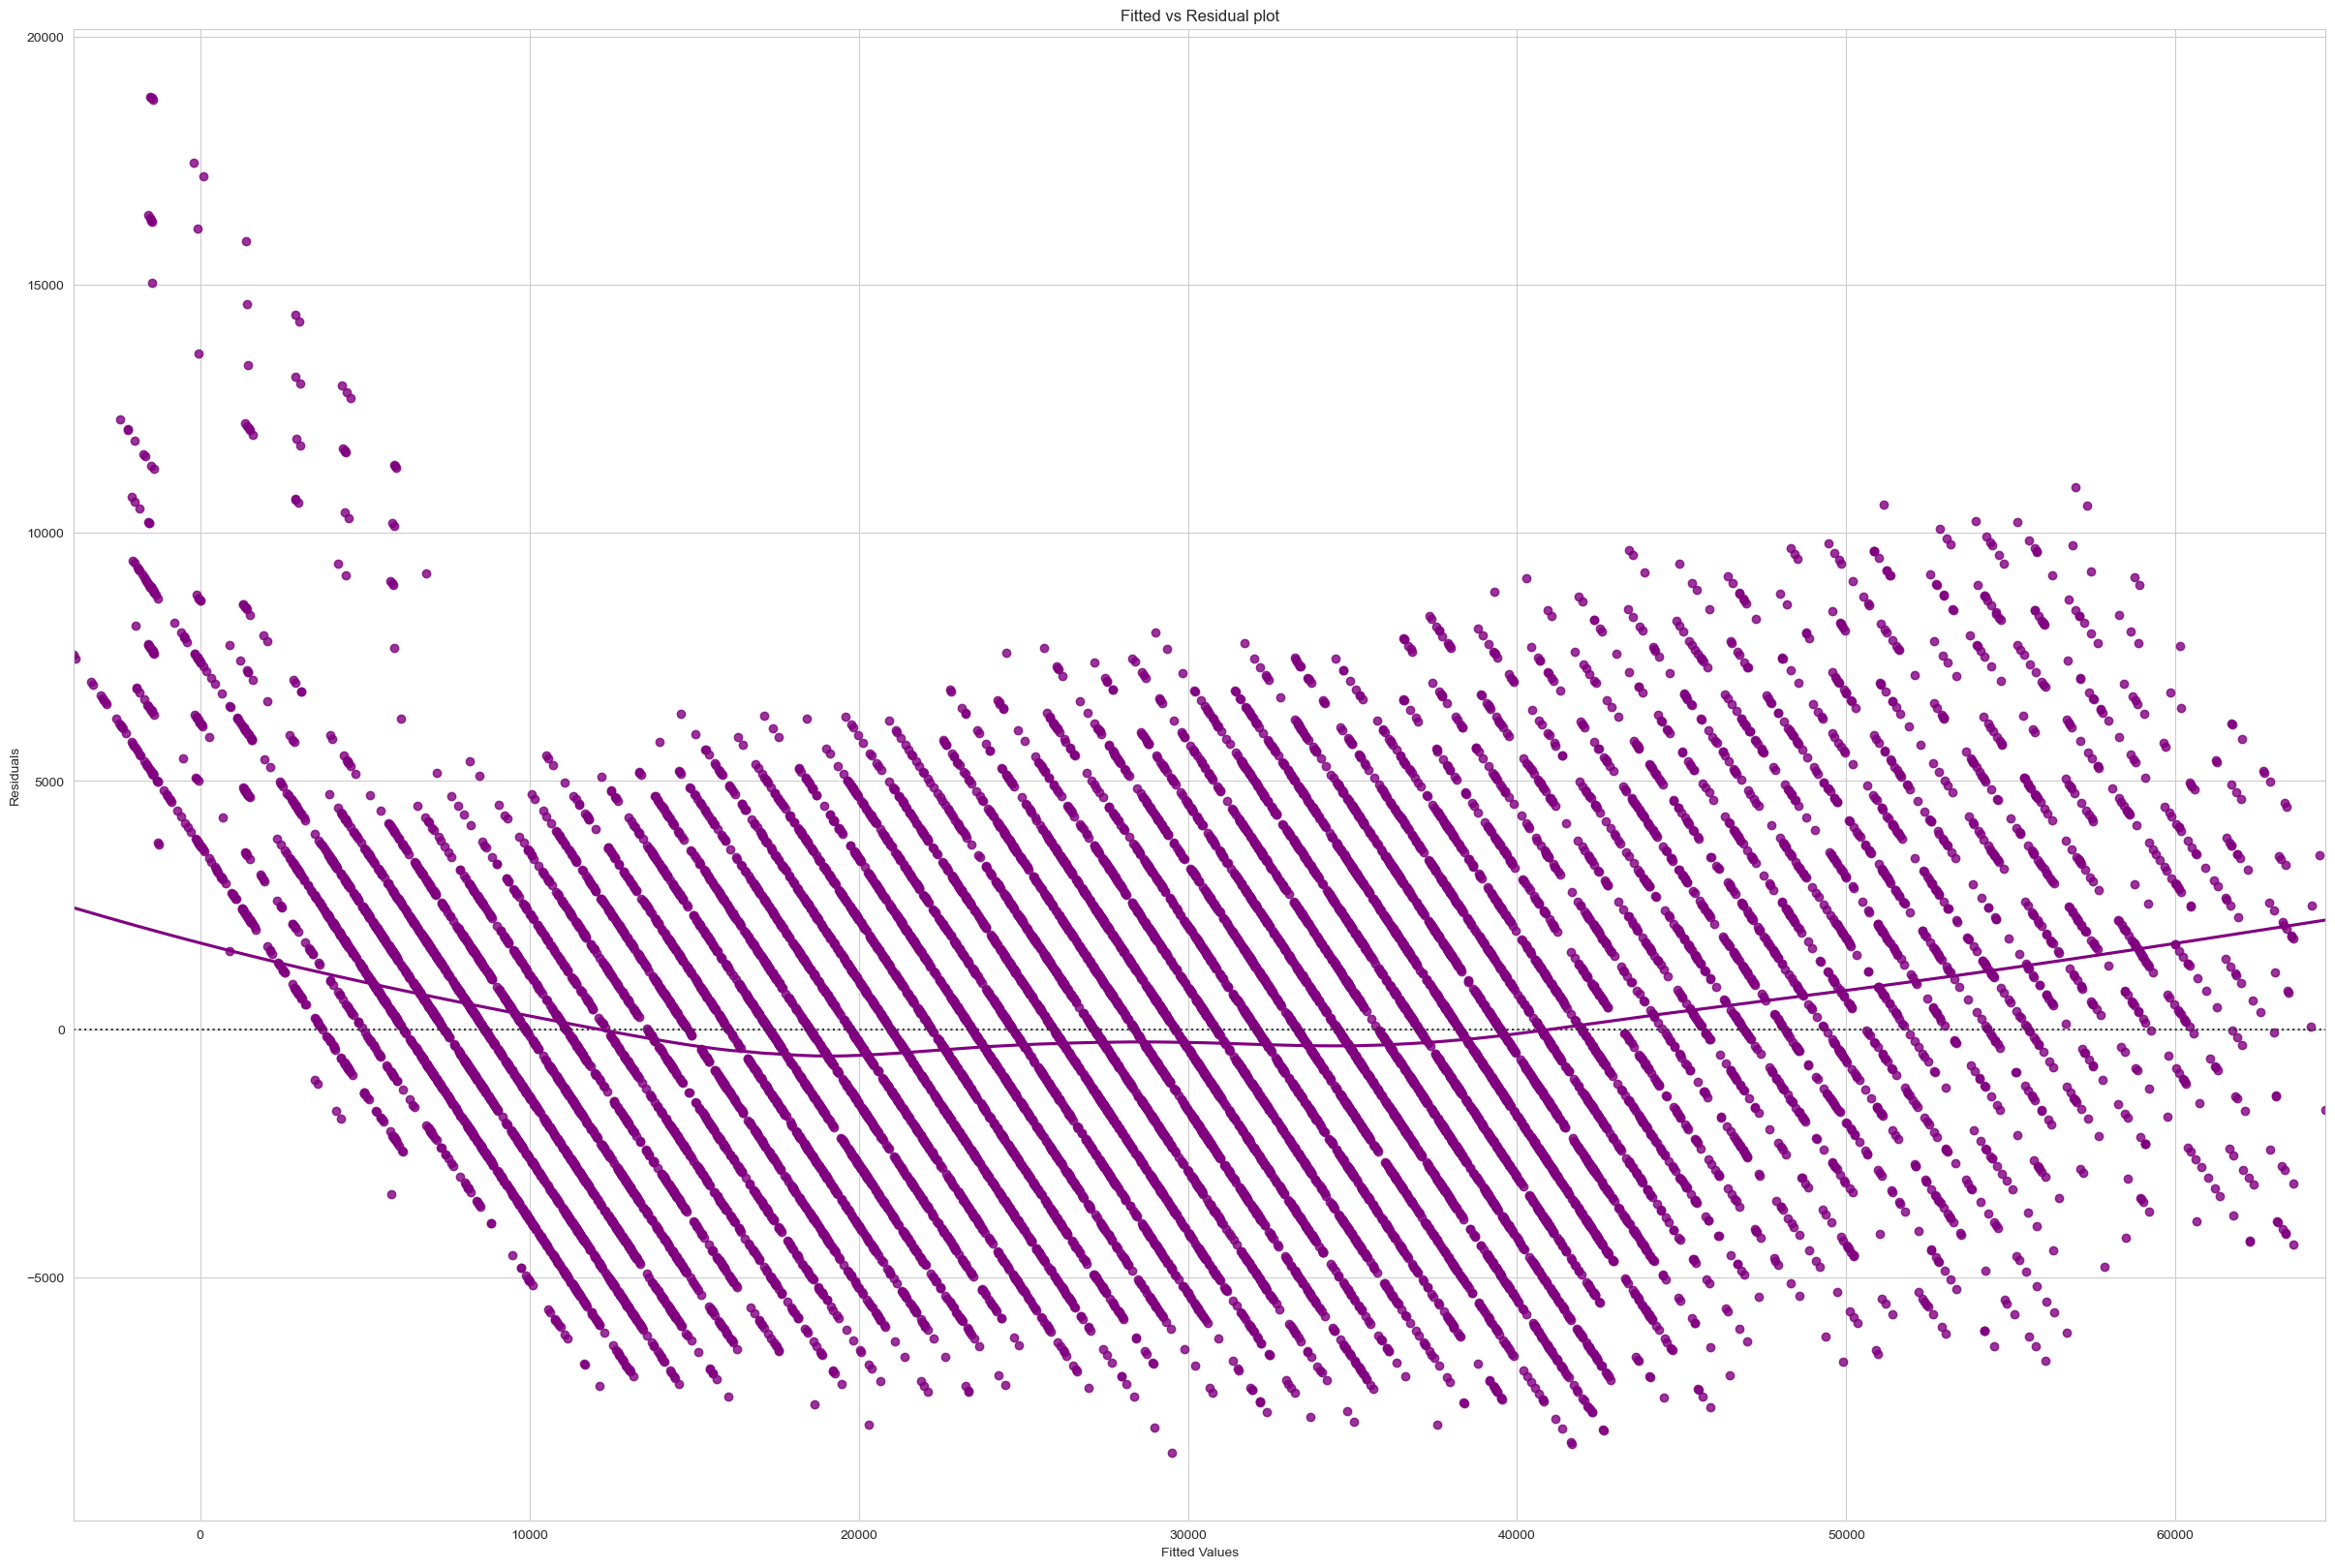

In [190]:
# let us plot the fitted values vs residuals
plt.figure(figsize=(30,20))
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred,x="Fitted Values",y="Residuals",color="purple",lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### The plot is not showing any non-linear pattern and the curve is almost straight.

#### This is the test for linearity between residuals and fitted values. This is the first assumption of linear regression.

C:\Users\hp\anaconda3\postreset11102023\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

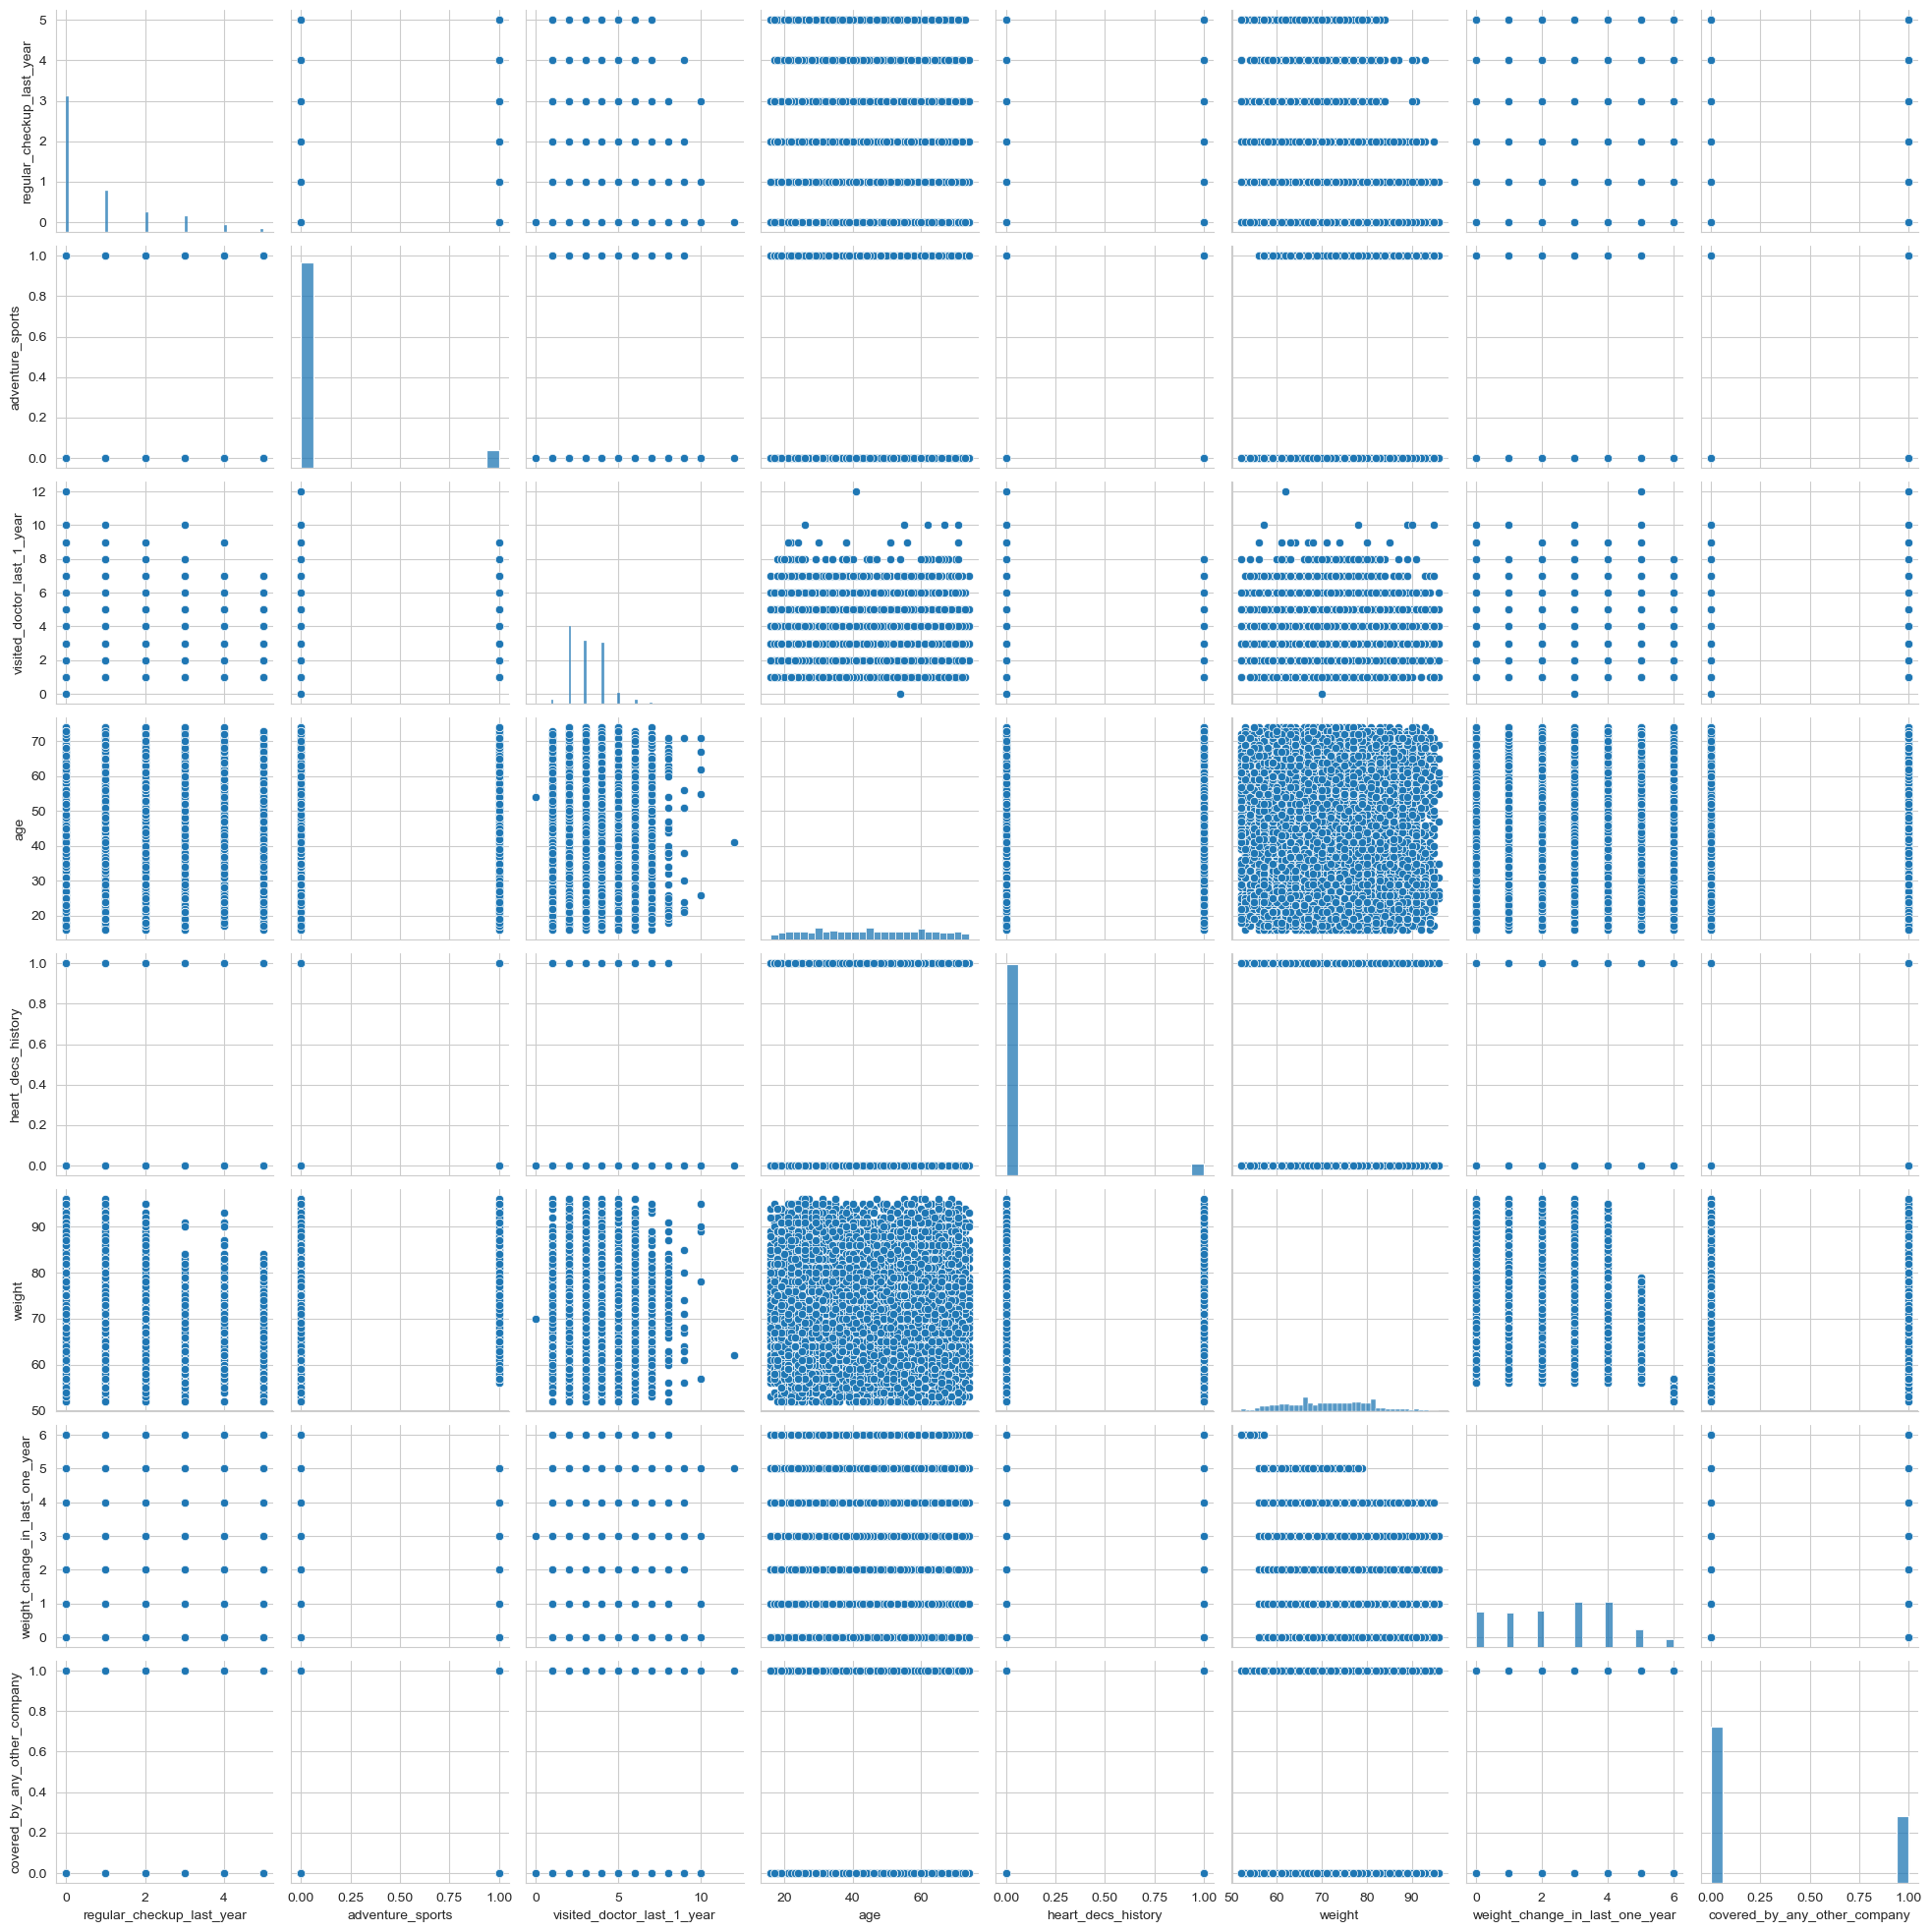

In [191]:
### checking for any non-linear pattern present
plt.figure(figsize=(20,20))
pairplot_train19=X_train_19.drop(['const'],axis=1)
sns.pairplot(data=pairplot_train19);

#### No non-linear pattern present

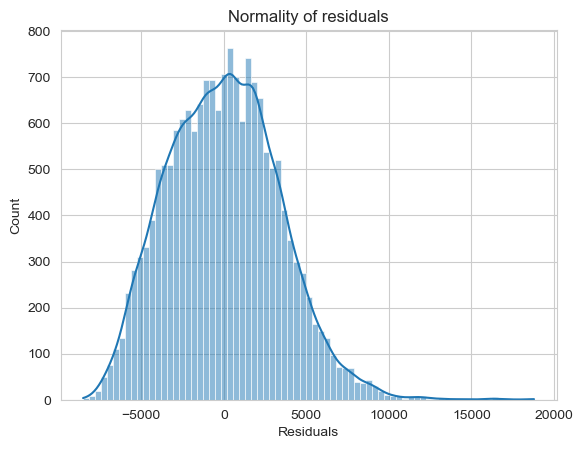

In [192]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals");

#### The distribution of residuals is normal with skewness on the right.

#### The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

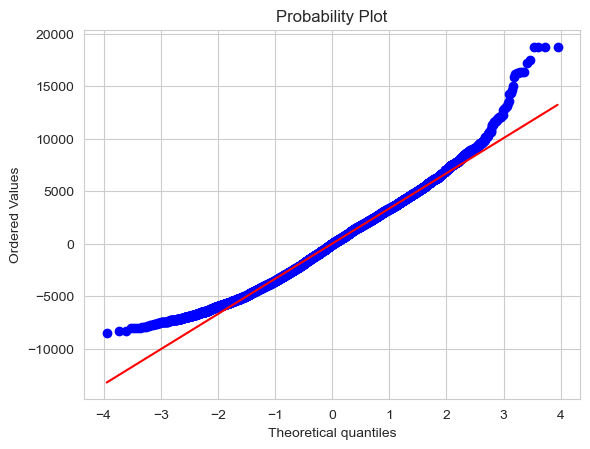

In [193]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"],dist="norm",plot=pylab)
plt.show()

#### Most of the points are on the straight line of the QQ plot.

In [194]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [195]:
name=["F statistic","p-value"]
test=sms.het_goldfeldquandt(df_pred["Residuals"],X_train_19.astype(('float')))
lzip(name,test)

[('F statistic', 1.0086457698965705), ('p-value', 0.34369057487401594)]

###### The null and alternate hypotheses of the goldfeldquandt test are as follows:

###### Null hypothesis : Residuals are homoscedastic
###### Alternate hypothesis : Residuals have hetroscedasticity

#### The p-value is more than 0.05, hence the residuals are homoscedastic.

In [196]:
print(olsres_19.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 3.743e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:01:02   Log-Likelihood:            -1.6697e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17491   BIC:                         3.340e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Insert Inferences from the Coef here

In [197]:
olsres_19.params

const                            -79954.550831
regular_checkup_last_year          -448.068404
adventure_sports                    197.800282
visited_doctor_last_1_year          -56.365366
age                                   3.764978
heart_decs_history                  286.235819
weight                             1488.984417
weight_change_in_last_one_year      163.825331
covered_by_any_other_company       1243.084316
dtype: float64

In [198]:
# Let us write the equation of linear regression
Equation="insurance cost ="
print(Equation,end=" ")
for i in range(len(X_train_19.columns)):
    if i == 0:
        print(olsres_19.params[i], "+", end=" ")
    elif i != len(X_train_19.columns) - 1:
        print(
            olsres_19.params[i],
            "* (",
            X_train_19.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_19.params[i], "* (", X_train_19.columns[i], ")")

insurance cost = -79954.55083061793 + -448.06840434262756 * ( regular_checkup_last_year ) +  197.80028245711242 * ( adventure_sports ) +  -56.3653660599313 * ( visited_doctor_last_1_year ) +  3.764978087623719 * ( age ) +  286.2358189877085 * ( heart_decs_history ) +  1488.9844167405124 * ( weight ) +  163.82533141421987 * ( weight_change_in_last_one_year ) +  1243.0843158180355 * ( covered_by_any_other_company )


insurance cost = -79954.55083061793 + -448.06840434262756 * ( regular_checkup_last_year ) +  197.80028245711242 * ( adventure_sports ) +  -56.3653660599313 * ( visited_doctor_last_1_year ) +  3.764978087623719 * ( age ) +  286.2358189877085 * ( heart_decs_history ) +  1488.9844167405124 * ( weight ) +  163.82533141421987 * ( weight_change_in_last_one_year ) +  1243.0843158180355 * ( covered_by_any_other_company )

In [199]:
X_train_19.columns

Index(['const', 'regular_checkup_last_year', 'adventure_sports',
       'visited_doctor_last_1_year', 'age', 'heart_decs_history', 'weight',
       'weight_change_in_last_one_year', 'covered_by_any_other_company'],
      dtype='object')

In [200]:
X_test_1.columns

Index(['const', 'years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'daily_avg_steps',
       'age', 'heart_decs_history', 'other_major_decs_history',
       'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year',
       'fat_percentage', 'cholesterol_level', 'covered_by_any_other_company',
       'alcohol_intake', 'exercise_frequency', 'occupation_Salaried',
       'occupation_Student', 'gender_Female', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'zone_East', 'zone_North', 'zone_South'],
      dtype='object')

In [201]:
X_test_2=X_test_1.drop(['alcohol_intake','zone_North','other_major_decs_history','fat_percentage','exercise_frequency','daily_avg_steps','zone_East','avg_glucose_level','gender_Female','smoking_status_formerly smoked','smoking_status_Unknown','smoking_status_never smoked','years_of_insurance_with_us','zone_South','occupation_Student','cholesterol_level','bmi','occupation_Salaried'],
              axis=1)

In [202]:
X_test_2.columns

Index(['const', 'regular_checkup_last_year', 'adventure_sports',
       'visited_doctor_last_1_year', 'age', 'heart_decs_history', 'weight',
       'weight_change_in_last_one_year', 'covered_by_any_other_company'],
      dtype='object')

In [203]:
X_train_19.columns

Index(['const', 'regular_checkup_last_year', 'adventure_sports',
       'visited_doctor_last_1_year', 'age', 'heart_decs_history', 'weight',
       'weight_change_in_last_one_year', 'covered_by_any_other_company'],
      dtype='object')

In [204]:
y_pred=olsres_19.predict(X_test_2)

In [205]:
y_pred_train=olsres_19.predict(X_train_19)

In [206]:
# let's check the RMSE on the train data
rmse1=np.sqrt(mean_squared_error(y_train,df_pred["Fitted Values"]))
rmse1

3368.4114452639337

In [207]:
# let's check the RMSE on the test data
rmse2=np.sqrt(mean_squared_error(y_test,y_pred))
rmse2

3374.4577210832704

In [208]:
mape1=mean_absolute_percentage_error(y_train,df_pred["Fitted Values"])
mape1

0.15180313231493955

In [209]:
mape2=mean_absolute_percentage_error(y_test,y_pred)
mape2

0.1553824698033419

In [210]:
olsres_19.rsquared

0.9448079307698717

In [211]:
olsres_19.rsquared_adj

0.9447826871272074

#### RIDGE, LASSO, ELASTIC NET

In [212]:
import sklearn
from sklearn.linear_model import ElasticNet,Ridge,Lasso

In [213]:
### ridge on X_train_1
ridge=Ridge(alpha=1.0)
ridge_1=ridge.fit(X_train_1,y_train)

In [214]:
# train
y_pred_ridge_1_train=ridge_1.predict(X_train_1)

In [215]:
# train
y_pred_ridge_1_train

array([[55445.75796533],
       [35180.53421076],
       [34501.3846461 ],
       ...,
       [28980.84862544],
       [32621.66446293],
       [31776.65611509]])

In [216]:
# test
y_pred_ridge_1=ridge_1.predict(X_test_1)

In [217]:
# test
y_pred_ridge_1

array([[ 7023.90916258],
       [18732.3521156 ],
       [14368.69510019],
       ...,
       [ 5632.65376531],
       [ 7109.10948181],
       [17951.60280314]])

In [218]:
ridge_1.coef_

array([[ 0.00000000e+00, -1.08465588e+01, -4.49331083e+02,
         2.03475202e+02, -5.62292683e+01, -7.73472512e-03,
         3.77019803e+00,  2.96378773e+02,  2.20555497e+01,
         1.78066640e-01, -4.91835433e+00,  1.48891918e+03,
         1.64028732e+02, -9.07780744e-01,  3.40996818e+01,
         1.25886070e+03, -3.13328119e+00, -1.22685386e+01,
         1.45828140e+02,  7.69056189e+01, -3.02053432e+01,
         8.95634138e+01,  6.90461222e+01,  1.01675876e+02,
        -1.87122267e+01,  9.98008577e+00,  6.78086487e+01]])

In [219]:
ridge_1.intercept_

array([-79924.69556011])

In [220]:
# test
rmse1_ridge_1=np.sqrt(mean_squared_error(y_test,y_pred_ridge_1))
rmse1_ridge_1

3376.011417161285

In [221]:
# train
rmse2_ridge_1=np.sqrt(mean_squared_error(y_train,y_pred_ridge_1_train))
rmse2_ridge_1

3367.1959598207673

In [222]:
# test
mape1_ridge_1=np.sqrt(mean_absolute_percentage_error(y_test,y_pred_ridge_1))
mape1_ridge_1

0.39428817278145467

In [223]:
# train
mape2_ridge_1=np.sqrt(mean_absolute_percentage_error(y_train,y_pred_ridge_1_train))
mape2_ridge_1

0.38947746120690296

In [224]:
# test
r2_ridge_1=ridge_1.score(X_test_1,y_test)
r2_ridge_1

0.94418030167046

In [225]:
# train
rsq2_ridge_1=ridge_1.score(X_train_1,y_train)
rsq2_ridge_1

0.944847755508646

In [226]:
### ridge on X_train_19
ridge=Ridge(alpha=1.0)
ridge_19=ridge.fit(X_train_19,y_train)

In [227]:
# test pred
y_pred_ridge_19=ridge_19.predict(X_test_2)

In [228]:
# test pred
y_pred_ridge_19

array([[ 7065.8879554 ],
       [18729.34666453],
       [14274.41506232],
       ...,
       [ 5671.06191603],
       [ 7047.50311756],
       [18074.1312051 ]])

In [229]:
# train
mse2_ridge_1=mean_squared_error(y_train,y_pred_ridge_1_train)
mse2_ridge_1

11338008.631833298

In [230]:
# train pred
y_pred_ridge_19_train=ridge_19.predict(X_train_19)

# train pred
y_pred_ridge_19_train

array([[55434.83779311],
       [35155.39291501],
       [34413.48522319],
       ...,
       [29067.58593823],
       [32510.43604785],
       [31951.33306226]])

In [231]:
ridge_19.coef_

array([[   0.        , -448.04723888,  197.65728232,  -56.36091597,
           3.76499729,  285.92777817, 1488.9846755 ,  163.81569259,
        1242.74548725]])

In [232]:
X_test_2.columns

Index(['const', 'regular_checkup_last_year', 'adventure_sports',
       'visited_doctor_last_1_year', 'age', 'heart_decs_history', 'weight',
       'weight_change_in_last_one_year', 'covered_by_any_other_company'],
      dtype='object')

In [233]:
ridge_19.intercept_

array([-79954.44537381])

In [234]:
# test
mse1_ridge_19=mean_squared_error(y_test,y_pred_ridge_19)
mse1_ridge_19

11386927.603149703

In [235]:
# train
mse2_ridge_19=mean_squared_error(y_train,y_pred_ridge_19_train)
mse2_ridge_19

11346195.69591922

In [236]:
# test
mape1_ridge_19=np.sqrt(mean_absolute_percentage_error(y_test,y_pred_ridge_19))
mape1_ridge_19

0.3941847904647747

In [237]:
mape2_ridge_19=np.sqrt(mean_absolute_percentage_error(y_train,y_pred_ridge_19_train))
mape2_ridge_19

0.38961868199580324

In [238]:
# test
rmse1_ridge_19=np.sqrt(mean_squared_error(y_test,y_pred_ridge_19))
rmse1_ridge_19

3374.4521930455176

In [239]:
# train
rmse2_ridge_19=np.sqrt(mean_squared_error(y_train,y_pred_ridge_19_train))
rmse2_ridge_19

3368.411449915111

In [240]:
# test
r2_ridge_19=ridge_19.score(X_test_2,y_test)
r2_ridge_19

0.9442318508568774

In [241]:
# train
rsq2_ridge_19=ridge_19.score(X_train_19,y_train)
rsq2_ridge_19

0.9448079306174508

Lasso regression:
(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

In [242]:
### lasso on train_1
lasso=Lasso(alpha=0.1)
lasso_1=lasso.fit(X_train_1,y_train)

In [243]:
# test
y_pred_lasso_1=lasso_1.predict(X_test_1)

In [244]:
# test
y_pred_lasso_1

array([ 7024.03761798, 18732.01378366, 14368.51817689, ...,
        5632.12359115,  7107.79251381, 17950.66303077])

In [245]:
# train
y_pred_lasso_1_train=lasso_1.predict(X_train_1)

In [246]:
# train
y_pred_lasso_1_train

array([55444.84269241, 35180.8158971 , 34500.88330904, ...,
       28980.32039392, 32621.09843994, 31779.23162694])

In [247]:
# test
mse1_lasso_1=mean_squared_error(y_test,y_pred_lasso_1)
mse1_lasso_1

11397210.240234368

In [248]:
# train
mse2_lasso_1=mean_squared_error(y_train,y_pred_lasso_1_train)
mse2_lasso_1

11338010.407239506

In [249]:
# test
mape1_lasso_1=np.sqrt(mean_absolute_percentage_error(y_test,y_pred_lasso_1))
mape1_lasso_1

0.39428491881506295

In [250]:
# train
mape2_lasso_1=np.sqrt(mean_absolute_percentage_error(y_train,y_pred_lasso_1_train))
mape2_lasso_1

0.38947829657626315

In [251]:
# test
rmse1_lasso_1=np.sqrt(mean_squared_error(y_test,y_pred_lasso_1))
rmse1_lasso_1

3375.9754501824164

In [252]:
# train
rmse2_lasso_1=np.sqrt(mean_squared_error(y_train,y_pred_lasso_1_train))
rmse2_lasso_1

3367.196223453499

In [253]:
# test
r2_lasso_1=lasso_1.score(X_test_1,y_test)
r2_lasso_1

0.9441814910356414

In [254]:
# train
rsq2_lasso_1=lasso_1.score(X_train_1,y_train)
rsq2_lasso_1

0.9448477468724171

In [255]:
lasso_1.coef_

array([ 0.00000000e+00, -1.08238533e+01, -4.49264087e+02,  2.02253419e+02,
       -5.61632231e+01, -7.70233555e-03,  3.76959869e+00,  2.94812829e+02,
        2.10444885e+01,  1.77960425e-01, -4.90785954e+00,  1.48892084e+03,
        1.63991600e+02, -9.14736398e-01,  3.38767153e+01,  1.25868159e+03,
       -2.78731858e+00, -1.20295267e+01,  1.44702777e+02,  7.58280748e+01,
       -2.96409262e+01,  8.70491490e+01,  6.66643966e+01,  9.94892165e+01,
       -1.85957132e+01,  9.29890244e+00,  6.69421888e+01])

In [256]:
lasso_1.intercept_

array([-79922.16102938])

Checkpoint

In [257]:
### lasso on X_train_19
lasso=Lasso(alpha=0.1)
lasso_19=lasso.fit(X_train_19,y_train)

In [258]:
# test
y_pred_lasso_19=lasso_19.predict(X_test_2)

In [259]:
# test
y_pred_lasso_19

array([ 7066.20161231, 18729.52158879, 14274.8917154 , ...,
        5671.08077358,  7047.35203849, 18073.15088128])

In [260]:
# train
y_pred_lasso_19_train=lasso_19.predict(X_train_19)

In [261]:
# train
y_pred_lasso_19_train

array([55435.02352859, 35155.62647683, 34413.78044511, ...,
       29066.59039927, 32510.46671561, 31951.55756608])

In [262]:
# test
mse1_lasso_19=mean_squared_error(y_test,y_pred_lasso_19)
mse1_lasso_19

11386846.942439541

In [263]:
# train
mse2_lasso_19=mean_squared_error(y_train,y_pred_lasso_19_train)
mse2_lasso_19

11346196.056010192

In [264]:
# test
mape1_lasso_19=np.sqrt(mean_absolute_percentage_error(y_test,y_pred_lasso_19))
mape1_lasso_19

0.3941838044846828

In [265]:
# train
mape2_lasso_19=np.sqrt(mean_absolute_percentage_error(y_train,y_pred_lasso_19_train))
mape2_lasso_19

0.38961863734149266

In [266]:
# test
rmse1_lasso_19=np.sqrt(mean_squared_error(y_test,y_pred_lasso_19))
rmse1_lasso_19

3374.440241349599

In [267]:
# train
rmse2_lasso_19=np.sqrt(mean_squared_error(y_train,y_pred_lasso_19_train))
rmse2_lasso_19

3368.4115033662665

In [268]:
# test
r2_lasso_19=lasso_19.score(X_test_2,y_test)
r2_lasso_19

0.94423224589746

In [269]:
# train
rsq2_lasso_19=lasso_19.score(X_train_19,y_train)
rsq2_lasso_19

0.9448079288658359

In [270]:
lasso_19.coef_

array([   0.        , -447.98902758,  196.47335443,  -56.28404499,
          3.76441153,  284.33127837, 1488.98565704,  163.77728999,
       1242.60926713])

In [271]:
lasso_19.intercept_

array([-79954.44979329])

Elastic Net: 
**1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2**

In [272]:
### Elastic Net on X_train_1
enet=ElasticNet(alpha=1.0,l1_ratio=0.5)
enet_1=enet.fit(X_train_1,y_train)

In [273]:
enet_1.coef_

array([ 0.00000000e+00,  2.80257072e+01, -3.34110565e+02,  2.77232461e+01,
       -3.61085421e+01, -6.47806472e-04,  3.78110866e+00,  2.77928642e+01,
        5.30297476e+00,  1.72831958e-01, -3.68329372e+00,  1.48287777e+03,
        1.15493005e+02, -1.62497775e+00,  1.89312656e+01,  3.52899390e+02,
        3.10980442e+00, -4.52934043e+00,  2.51245729e+01,  3.60729690e+00,
       -9.36984889e+00,  1.74719067e+00,  7.57045357e-01,  1.45597709e+01,
       -7.66927790e+00, -3.64819746e+00,  1.37224263e+01])

In [274]:
enet_1.intercept_

array([-79279.67398444])

In [275]:
# test
y_pred_enet_1=enet_1.predict(X_test_1)
y_pred_enet_1

array([ 7597.7670365 , 19047.30136443, 13956.43388968, ...,
        5877.99852772,  6280.51074477, 18331.90189662])

In [276]:
# train
y_pred_enet_1_train=enet_1.predict(X_train_1)
y_pred_enet_1_train

array([54817.36242178, 35462.3077615 , 34876.54232113, ...,
       29207.39307048, 32562.81817184, 32068.21783879])

In [277]:
# test
mse1_enet_1=mean_squared_error(y_test,y_pred_enet_1)
mse1_enet_1

11492317.19415126

In [278]:
# train
mse2_enet_1=mean_squared_error(y_train,y_pred_enet_1_train)
mse2_enet_1

11534552.523196897

In [279]:
# test
mape1_enet_1=mean_absolute_percentage_error(y_test,y_pred_enet_1)
mape1_enet_1

0.15399948668464683

In [280]:
# train
mape2_enet_1=mean_absolute_percentage_error(y_train,y_pred_enet_1_train)
mape2_enet_1

0.15142176563960041

In [281]:
# test
rmse1_enet_1=np.sqrt(mean_squared_error(y_test,y_pred_enet_1))
rmse1_enet_1

3390.032034384227

In [282]:
# train
rmse2_enet_1=np.sqrt(mean_squared_error(y_train,y_pred_enet_1_train))
rmse2_enet_1

3396.255662225224

In [283]:
# test
r2_enet_1=enet_1.score(X_test_1,y_test)
r2_enet_1

0.9437156991227186

In [284]:
# train
rsq2_enet_1=enet_1.score(X_train_1,y_train)
rsq2_enet_1

0.9438916937255095

In [285]:
#df_new.to_csv("df_new.csv")
#X_train_19.to_csv("X_train_19.csv")
#X_test_2.to_csv("X_test_2.csv")

In [286]:
### Elastic Net on X_train_19
enet=ElasticNet(alpha=1.0,l1_ratio=0.5)
enet_19=enet.fit(X_train_19,y_train)

In [287]:
# test
y_pred_enet_19=enet_19.predict(X_test_2)
y_pred_enet_19

array([ 7667.10322846, 18991.30651096, 13987.47984461, ...,
        5870.25096086,  6320.39504756, 18325.59342342])

In [288]:
# train
y_pred_enet_19_train=enet_19.predict(X_train_19)
y_pred_enet_19_train

array([54740.20509195, 35320.55457628, 34770.53688363, ...,
       29132.65680931, 32599.57437153, 32206.39701675])

In [289]:
enet_19.coef_

array([   0.        , -332.80774688,   28.06184808,  -36.10955427,
          3.81857492,   27.03740759, 1482.84098119,  115.20402525,
        365.48866083])

In [290]:
enet_19.intercept_

array([-79254.12215516])

In [291]:
# test
mse1_enet_19=mean_squared_error(y_test,y_pred_enet_19)
mse1_enet_19

11490028.49326694

In [292]:
# train
mse2_enet_19=mean_squared_error(y_train,y_pred_enet_19_train)
mse2_enet_19

11540106.079107387

In [293]:
# test
mape1_enet_19=mean_absolute_percentage_error(y_test,y_pred_enet_19)
mape1_enet_19

0.1540389164253825

In [294]:
# train
mape2_enet_19=mean_absolute_percentage_error(y_train,y_pred_enet_19_train)
mape2_enet_19

0.1514548341429021

In [295]:
# test
rmse1_enet_19=np.sqrt(mean_squared_error(y_test,y_pred_enet_19))
rmse1_enet_19

3389.6944542638266

In [296]:
# train
rmse2_enet_19=np.sqrt(mean_squared_error(y_train,y_pred_enet_19_train))
rmse2_enet_19

3397.0731636376904

In [297]:
# test
r2_enet_19=enet_19.score(X_test_2,y_test)
r2_enet_19

0.9437269081702078

In [298]:
# train
rsq2_enet_19=enet_19.score(X_train_19,y_train)
rsq2_enet_19

0.9438646791867737

### ENSEMBLE ORIGINAL

In [299]:
# X_train_19 BOOSTING
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor
gbr19=GradientBoostingRegressor(loss='squared_error',n_estimators=50,random_state=42)
gbr19=gbr19.fit(X_train_19,y_train)

C:\Users\hp\anaconda3\postreset11102023\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [300]:
# test
y_pred_gbr_19=gbr19.predict(X_test_2)
y_pred_gbr_19

array([ 7807.23386778, 18383.3439374 , 13895.16097944, ...,
        7266.66525919,  7723.67322942, 17923.61376469])

In [301]:
# train
y_pred_gbr_19_train=gbr19.predict(X_train_19)
y_pred_gbr_19_train

array([58312.54606437, 34989.43240363, 34564.75291643, ...,
       28162.84917839, 31661.23555361, 31661.23555361])

In [302]:
# test
mape1_gbr_19=mean_absolute_percentage_error(y_test,y_pred_gbr_19)
mape1_gbr_19

0.12517440224440013

In [303]:
# train
mape2_gbr_19=mean_absolute_percentage_error(y_train,y_pred_gbr_19_train)
mape2_gbr_19

0.12496410411409886

In [304]:
# test
rmse1_gbr_19=np.sqrt(mean_squared_error(y_test,y_pred_gbr_19))
rmse1_gbr_19

3030.8178483363076

In [305]:
# train
rmse2_gbr_19=np.sqrt(mean_squared_error(y_train,y_pred_gbr_19_train))
rmse2_gbr_19

3035.0176864267096

In [306]:
# test
r2_gbr_19=gbr19.score(X_test_2,y_test)
r2_gbr_19

0.9550117247123254

In [307]:
# train
rsq2_gbr_19=gbr19.score(X_train_19,y_train)
rsq2_gbr_19

0.9551926911738478

In [308]:
# X_train_19 BAGGING
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor
br19=BaggingRegressor(n_estimators=50,random_state=42)
br19=br19.fit(X_train_19,y_train)

C:\Users\hp\anaconda3\postreset11102023\Lib\site-packages\sklearn\ensemble\_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [309]:
# test
y_pred_br_19=br19.predict(X_test_2)
y_pred_br_19

array([ 6219.36      , 18929.56      , 13302.52      , ...,
        7305.28      ,  6643.03333333, 19530.10666667])

In [310]:
# train
y_pred_br_19_train=br19.predict(X_train_19)
y_pred_br_19_train

array([56689.96      , 37661.68      , 35374.66666667, ...,
       31253.10666667, 29844.29      , 30171.3       ])

In [311]:
# test
mape1_br_19=mean_absolute_percentage_error(y_test,y_pred_br_19)
mape1_br_19

0.1321034590315593

In [312]:
# train
mape2_br_19=mean_absolute_percentage_error(y_train,y_pred_br_19_train)
mape2_br_19

0.05309725616676279

In [313]:
# test
rmse1_br_19=np.sqrt(mean_squared_error(y_test,y_pred_br_19))
rmse1_br_19

3346.4696805818885

In [314]:
# train
rmse2_br_19=np.sqrt(mean_squared_error(y_train,y_pred_br_19_train))
rmse2_br_19

1383.3609158081454

In [315]:
# test
r2_br_19=br19.score(X_test_2,y_test)
r2_br_19

0.9451529263444018

In [316]:
# train
rsq2_br_19=br19.score(X_train_19,y_train)
rsq2_br_19

0.9906911204531758

### NOTE: Equation for all of the regularizations done

CHECKPOINT:

Model tuning by dropping all the outliers, imputing the missing values for year_last_admitted with mode, imputing bmi with mean,
etc.

In [317]:
df_new.columns

Index(['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'daily_avg_steps',
       'age', 'heart_decs_history', 'other_major_decs_history',
       'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year',
       'fat_percentage', 'insurance_cost', 'cholesterol_level',
       'covered_by_any_other_company', 'alcohol_intake', 'exercise_frequency',
       'occupation_Business', 'occupation_Salaried', 'occupation_Student',
       'gender_Female', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'zone_East', 'zone_North', 'zone_South',
       'zone_West'],
      dtype='object')

In [318]:
df_new.exercise_frequency.value_counts()

exercise_frequency
1    14638
2     5248
0     5114
Name: count, dtype: int64

In [319]:
df_new.heart_decs_history.value_counts()

heart_decs_history
0    23634
1     1366
Name: count, dtype: int64

In [320]:
df_new.other_major_decs_history.value_counts()

other_major_decs_history
0    22546
1     2454
Name: count, dtype: int64

In [321]:
df_new.adventure_sports.value_counts()

adventure_sports
0    22957
1     2043
Name: count, dtype: int64

Earlier, we had dropped year_last_admitted due to too many missing values. Now, we will impute those values and build the model.
Moreover, we will treat all the outliers and see if the models r2 has an impact.

In [322]:
df_num_wo_outliers=df_num.drop(['exercise_frequency','heart_decs_history','other_major_decs_history','adventure_sports'],axis=1)

In [323]:
df_num_w_outliers=df_num[['exercise_frequency','heart_decs_history','other_major_decs_history','adventure_sports']]

C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3042674270.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3042674270.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3042674270.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3042674270.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3042674270.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3042674270.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipykernel_46220\3042674270.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
C:\Users\hp\AppData\Local\Temp\ipy

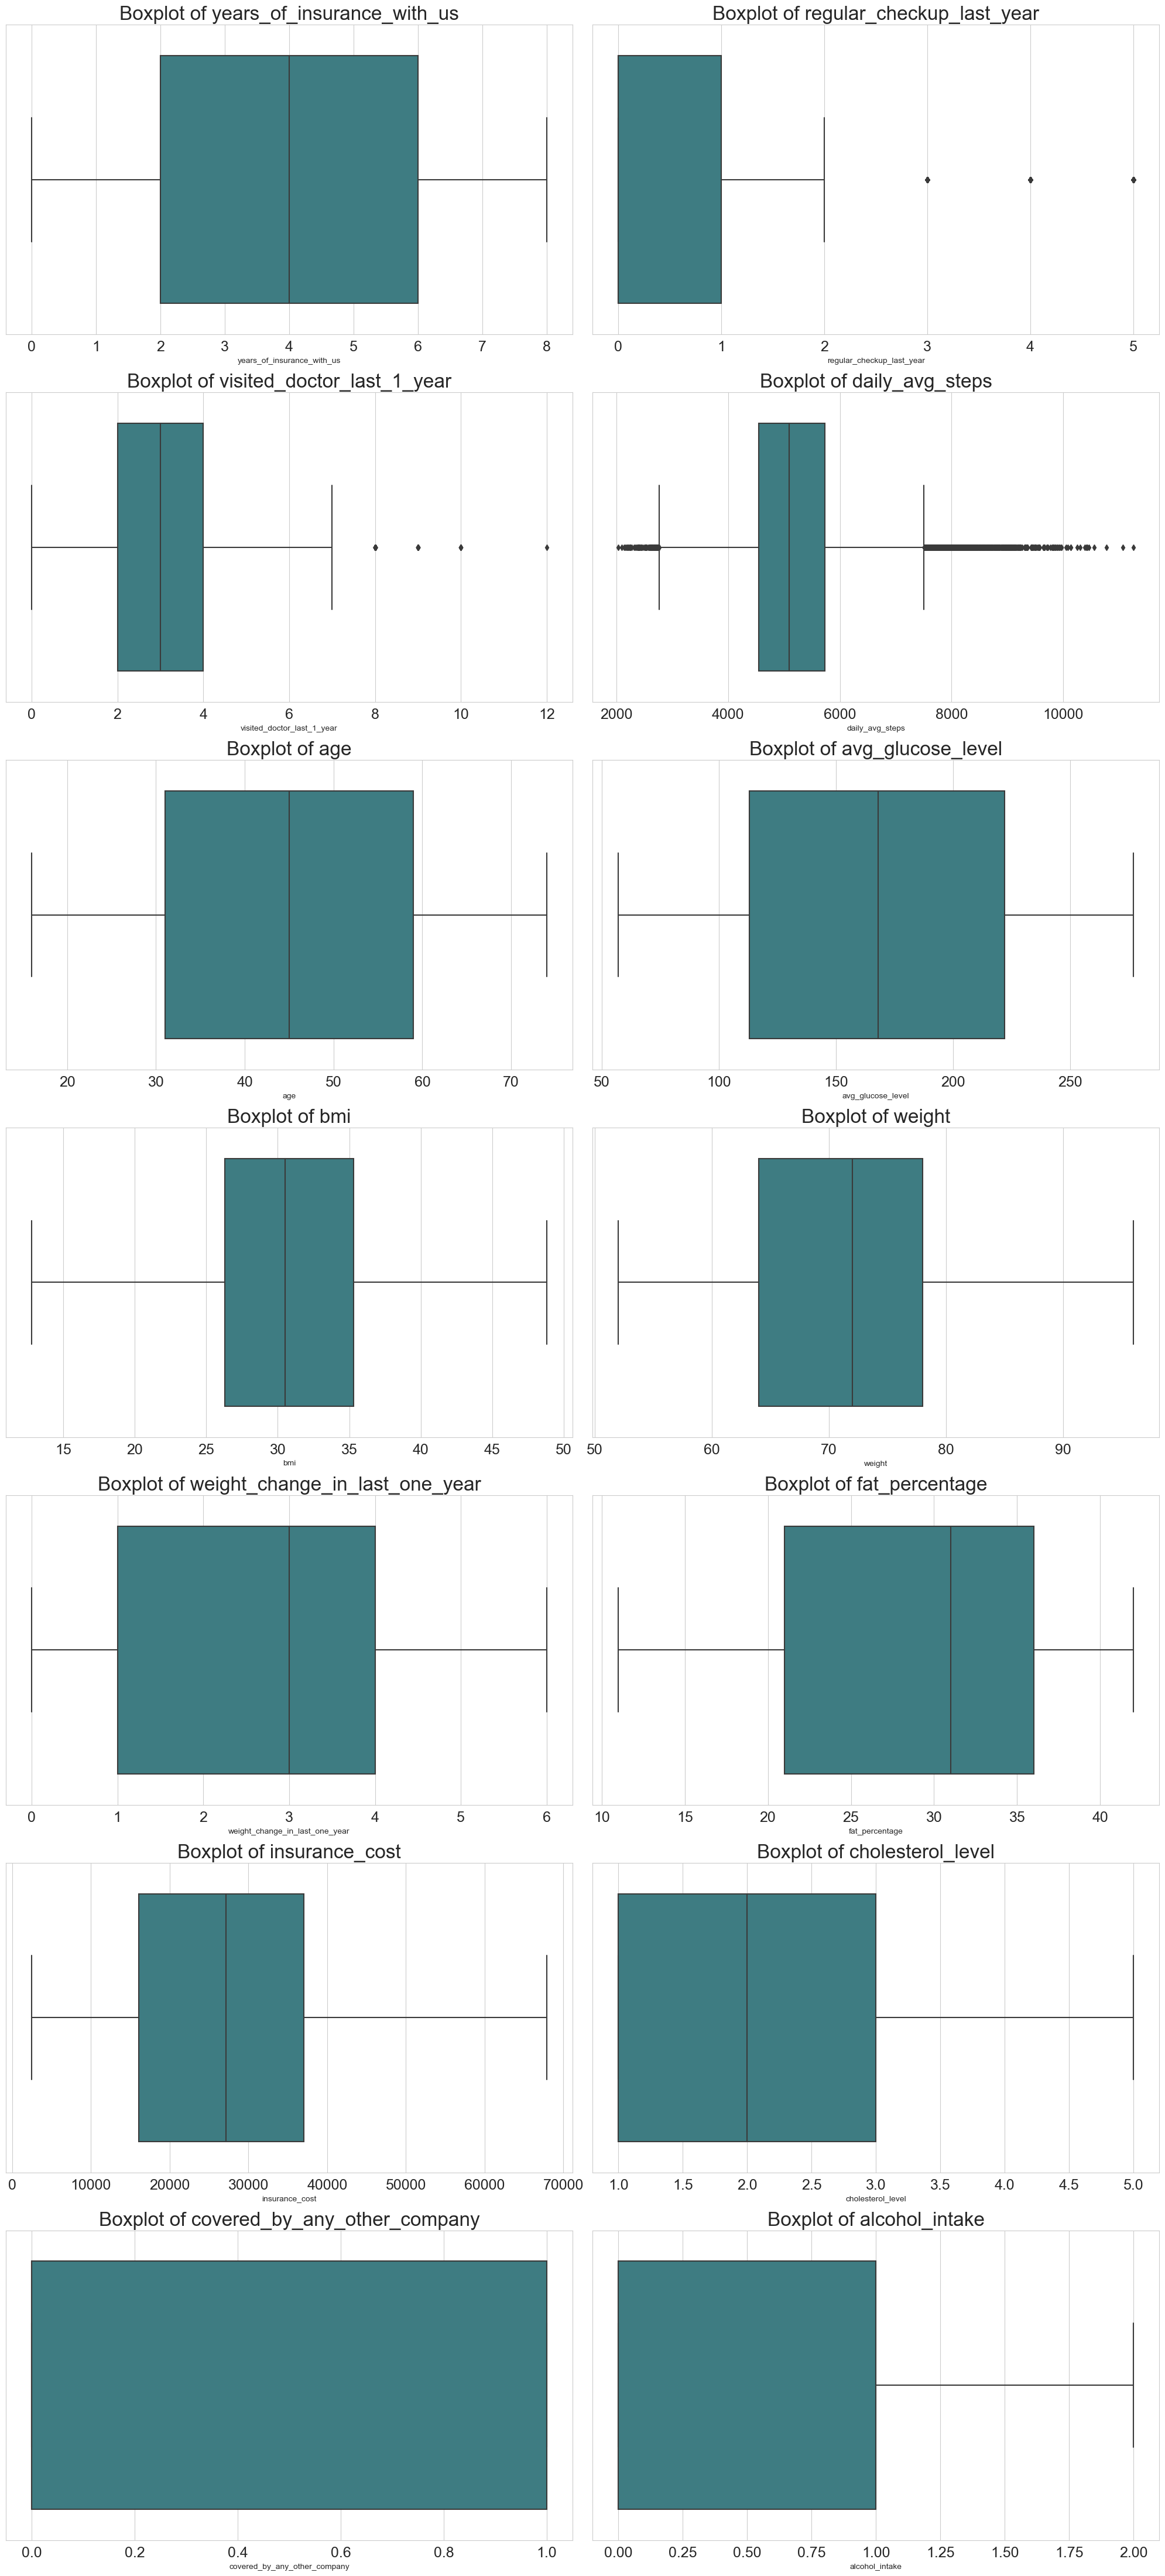

In [324]:
plt.figure(figsize=(20,75))
features=df_num_wo_outliers.columns
for f in range(0,len(features)):
    plt.subplot(12,2,f+1)
    sns.boxplot(data=df_num_wo_outliers,x=df_num_wo_outliers.columns[f],palette='crest')
    plt.title(f"Boxplot of {df_num_wo_outliers.columns[f]}",fontsize=24)
    plt.xticks(fontsize=18)
    plt.tight_layout();

In [325]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    upperrange=Q3+(1.5*IQR)
    lowerrange=Q1-(1.5*IQR)
    return upperrange,lowerrange

In [326]:
Q1=df_num_wo_outliers.quantile(0.25)
Q3=df_num_wo_outliers.quantile(0.75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

In [327]:
Q1=df_num_w_outliers.quantile(0.25)
Q3=df_num_w_outliers.quantile(0.75)
IQR=Q3-Q1
UL1=Q3+1.5*IQR
LL1=Q1-1.5*IQR

In [328]:
((df_num_wo_outliers > UL) | (df_num_wo_outliers < LL)).sum()

years_of_insurance_with_us           0
regular_checkup_last_year         2943
visited_doctor_last_1_year          96
daily_avg_steps                    952
age                                  0
avg_glucose_level                    0
bmi                                  0
weight                               0
weight_change_in_last_one_year       0
fat_percentage                       0
insurance_cost                       0
cholesterol_level                    0
covered_by_any_other_company         0
alcohol_intake                       0
dtype: int64

In [329]:
for x in df_num_wo_outliers.columns:
    ur,lr=remove_outlier(df_num_wo_outliers[x])
    df_num_wo_outliers[x]=np.where(df_num_wo_outliers[x]>ur,ur,df_num_wo_outliers[x])
    df_num_wo_outliers[x]=np.where(df_num_wo_outliers[x]<lr,lr,df_num_wo_outliers[x])

In [330]:
((df_num_w_outliers > UL1) | (df_num_w_outliers < LL1)).sum()

exercise_frequency          10362
heart_decs_history           1366
other_major_decs_history     2454
adventure_sports             2043
dtype: int64

In [331]:
df_num=pd.concat([df_num_wo_outliers,df_num_w_outliers],axis=1,join='inner')

In [332]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  float64
 1   regular_checkup_last_year       25000 non-null  float64
 2   visited_doctor_last_1_year      25000 non-null  float64
 3   daily_avg_steps                 25000 non-null  float64
 4   age                             25000 non-null  float64
 5   avg_glucose_level               25000 non-null  float64
 6   bmi                             25000 non-null  float64
 7   weight                          25000 non-null  float64
 8   weight_change_in_last_one_year  25000 non-null  float64
 9   fat_percentage                  25000 non-null  float64
 10  insurance_cost                  25000 non-null  float64
 11  cholesterol_level               25000 non-null  object 
 12  covered_by_any_other_company    

In [333]:
df_num.exercise_frequency.value_counts()

exercise_frequency
1    14638
2     5248
0     5114
Name: count, dtype: int64

In [334]:
df_num.heart_decs_history.value_counts()

heart_decs_history
0    23634
1     1366
Name: count, dtype: int64

In [335]:
df_num.other_major_decs_history.value_counts()

other_major_decs_history
0    22546
1     2454
Name: count, dtype: int64

In [336]:
df_num.adventure_sports.value_counts()

adventure_sports
0    22957
1     2043
Name: count, dtype: int64

In [337]:
#df_num1['year_last_admitted'=df1['year_last_admitted']

In [338]:
#df_num1

In [339]:
df2=pd.read_csv("Data.csv")

In [340]:
df_num['year_last_admitted']=df2.Year_last_admitted

In [341]:
df_num.columns

Index(['years_of_insurance_with_us', 'regular_checkup_last_year',
       'visited_doctor_last_1_year', 'daily_avg_steps', 'age',
       'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year',
       'fat_percentage', 'insurance_cost', 'cholesterol_level',
       'covered_by_any_other_company', 'alcohol_intake', 'exercise_frequency',
       'heart_decs_history', 'other_major_decs_history', 'adventure_sports',
       'year_last_admitted'],
      dtype='object')

In [342]:
df_num.exercise_frequency.value_counts()

exercise_frequency
1    14638
2     5248
0     5114
Name: count, dtype: int64

In [343]:
df_num.other_major_decs_history.value_counts()

other_major_decs_history
0    22546
1     2454
Name: count, dtype: int64

In [344]:
df_num.heart_decs_history.value_counts()

heart_decs_history
0    23634
1     1366
Name: count, dtype: int64

In [345]:
df_num.adventure_sports.value_counts()

adventure_sports
0    22957
1     2043
Name: count, dtype: int64

### DF_NEW1 starts here

In [346]:
df_new1=pd.concat([df_num,df_cat_encoded],axis=1,join='inner')

In [347]:
df_new1.exercise_frequency.value_counts()

exercise_frequency
1    14638
2     5248
0     5114
Name: count, dtype: int64

In [348]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  float64
 1   regular_checkup_last_year       25000 non-null  float64
 2   visited_doctor_last_1_year      25000 non-null  float64
 3   daily_avg_steps                 25000 non-null  float64
 4   age                             25000 non-null  float64
 5   avg_glucose_level               25000 non-null  float64
 6   bmi                             25000 non-null  float64
 7   weight                          25000 non-null  float64
 8   weight_change_in_last_one_year  25000 non-null  float64
 9   fat_percentage                  25000 non-null  float64
 10  insurance_cost                  25000 non-null  float64
 11  cholesterol_level               25000 non-null  object 
 12  covered_by_any_other_company    

In [349]:
df_new1.isna().sum()

years_of_insurance_with_us            0
regular_checkup_last_year             0
visited_doctor_last_1_year            0
daily_avg_steps                       0
age                                   0
avg_glucose_level                     0
bmi                                   0
weight                                0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
cholesterol_level                     0
covered_by_any_other_company          0
alcohol_intake                        0
exercise_frequency                    0
heart_decs_history                    0
other_major_decs_history              0
adventure_sports                      0
year_last_admitted                11881
occupation_Business                   0
occupation_Salaried                   0
occupation_Student                    0
gender_Female                         0
smoking_status_Unknown                0
smoking_status_formerly smoked        0


In [350]:
df_new1.year_last_admitted.value_counts(dropna=False)

year_last_admitted
NaN       11881
2010.0      557
1995.0      538
2007.0      532
2002.0      520
2013.0      516
2000.0      516
1998.0      514
1994.0      514
1997.0      513
2009.0      512
1993.0      508
2001.0      507
2003.0      504
2008.0      503
1999.0      498
2014.0      496
2005.0      491
1996.0      487
2012.0      483
2004.0      481
2011.0      475
2006.0      472
2015.0      449
1992.0      382
2016.0      370
1991.0      276
2017.0      253
2018.0      130
1990.0      122
Name: count, dtype: int64

In [351]:
# treating the null values of year_last_admitted instead of dropping it
#df_new1.year_last_admitted=df_new1.year_last_admitted.fillna(df_new1.year_last_admitted.mode()[0])

In [352]:
df_new1.exercise_frequency.value_counts()

exercise_frequency
1    14638
2     5248
0     5114
Name: count, dtype: int64

In [353]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
df_new1=pd.DataFrame(imputer.fit_transform(df_new1),columns=df_new1.columns)

In [354]:
df_new1.year_last_admitted=(round(df_new1.year_last_admitted))

In [355]:
df_new1.year_last_admitted.unique()

array([2009., 2016., 2005., 2007., 2004., 2003., 2015., 1994., 2010.,
       2017., 2002., 2014., 1996., 2008., 1991., 1995., 2013., 2001.,
       2011., 2018., 1998., 1997., 1999., 1992., 2012., 2000., 1993.,
       2006., 1990.])

In [356]:
df_new1.year_last_admitted=df_new1.year_last_admitted.astype('int64')

In [357]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  float64
 1   regular_checkup_last_year       25000 non-null  float64
 2   visited_doctor_last_1_year      25000 non-null  float64
 3   daily_avg_steps                 25000 non-null  float64
 4   age                             25000 non-null  float64
 5   avg_glucose_level               25000 non-null  float64
 6   bmi                             25000 non-null  float64
 7   weight                          25000 non-null  float64
 8   weight_change_in_last_one_year  25000 non-null  float64
 9   fat_percentage                  25000 non-null  float64
 10  insurance_cost                  25000 non-null  float64
 11  cholesterol_level               25000 non-null  float64
 12  covered_by_any_other_company    

In [358]:
df_new1.exercise_frequency.value_counts()

exercise_frequency
1.0    14638
2.0     5248
0.0     5114
Name: count, dtype: int64

In [359]:
# independent variables
X=df_new1.drop(["insurance_cost"],axis=1)
# dependent variable
y=df_new1[["insurance_cost"]]

In [360]:
# constant added to X
X=sm.add_constant(X)

In [361]:
#X_train_1,X_test_1,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
X_train_1,X_test_1,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

### VIF POST TUNING STARTS HERE

In [362]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 23311 to 23654
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   const                           20000 non-null  float64
 1   years_of_insurance_with_us      20000 non-null  float64
 2   regular_checkup_last_year       20000 non-null  float64
 3   visited_doctor_last_1_year      20000 non-null  float64
 4   daily_avg_steps                 20000 non-null  float64
 5   age                             20000 non-null  float64
 6   avg_glucose_level               20000 non-null  float64
 7   bmi                             20000 non-null  float64
 8   weight                          20000 non-null  float64
 9   weight_change_in_last_one_year  20000 non-null  float64
 10  fat_percentage                  20000 non-null  float64
 11  cholesterol_level               20000 non-null  float64
 12  covered_by_any_other_company    2

In [365]:
X_train_1.columns

Index(['const', 'years_of_insurance_with_us', 'regular_checkup_last_year',
       'visited_doctor_last_1_year', 'daily_avg_steps', 'age',
       'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year',
       'fat_percentage', 'cholesterol_level', 'covered_by_any_other_company',
       'alcohol_intake', 'exercise_frequency', 'heart_decs_history',
       'other_major_decs_history', 'adventure_sports', 'year_last_admitted',
       'occupation_Business', 'occupation_Salaried', 'occupation_Student',
       'gender_Female', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'zone_East', 'zone_North', 'zone_South',
       'zone_West'],
      dtype='object')

In [366]:
X_VIF_1=calc_vif(X_train_1.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X_train_1.drop([X_VIF_1.variables[0]],axis=1,inplace=True)
X_VIF_1

C:\Users\hp\anaconda3\postreset11102023\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\hp\anaconda3\postreset11102023\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


index                       variables       VIF
0      30                       zone_West       inf
1      24  smoking_status_formerly smoked       inf
2      21              occupation_Student       inf
3      20             occupation_Salaried       inf
4      19             occupation_Business       inf
5      25     smoking_status_never smoked       inf
6      26           smoking_status_smokes       inf
7      27                       zone_East       inf
8      23          smoking_status_Unknown       inf
9      28                      zone_North       inf
10     29                      zone_South       inf
11      8                          weight  4.440195
12     18              year_last_admitted  4.389526
13     11               cholesterol_level  1.436057
14     22                   gender_Female  1.254478
15      7                             bmi  1.200017
16      9  weight_change_in_last_one_year  1.179064
17     10                  fat_percentage  1.098331
18     12    covered_by_any_other_company  1.083276
19      1      years_of_insurance_with_us  1.075820
20     16        other_major_decs_history  1.056522
21      4                 daily_avg_steps  1.051887
22      3      visited_doctor_last_1_year  1.034322
23      2       regular_checkup_last_year  1.031373
24     15              heart_decs_history  1.025393
25     13                  alcohol_intake  1.022067
26     14              exercise_frequency  1.013935
27     17                adventure_sports  1.008542
28      6               avg_glucose_level  1.001272
29      5                             age  1.000903
30      0                           const  0.000000

In [367]:
X_VIF_2=calc_vif(X_train_1.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X_train_1.drop([X_VIF_2.variables[0]],axis=1,inplace=True)
X_VIF_2

C:\Users\hp\anaconda3\postreset11102023\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\hp\anaconda3\postreset11102023\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


index                       variables       VIF
0      23          smoking_status_Unknown       inf
1      21              occupation_Student       inf
2      20             occupation_Salaried       inf
3      19             occupation_Business       inf
4      24  smoking_status_formerly smoked       inf
5      25     smoking_status_never smoked       inf
6      26           smoking_status_smokes       inf
7       8                          weight  4.440195
8      18              year_last_admitted  4.389526
9      28                      zone_North  1.511613
10     11               cholesterol_level  1.436057
11     29                      zone_South  1.412514
12     27                       zone_East  1.409240
13     22                   gender_Female  1.254478
14      7                             bmi  1.200017
15      9  weight_change_in_last_one_year  1.179064
16     10                  fat_percentage  1.098331
17     12    covered_by_any_other_company  1.083276
18      1      years_of_insurance_with_us  1.075820
19     16        other_major_decs_history  1.056522
20      4                 daily_avg_steps  1.051887
21      3      visited_doctor_last_1_year  1.034322
22      2       regular_checkup_last_year  1.031373
23     15              heart_decs_history  1.025393
24     13                  alcohol_intake  1.022067
25     14              exercise_frequency  1.013935
26     17                adventure_sports  1.008542
27      6               avg_glucose_level  1.001272
28      5                             age  1.000903
29      0                           const  0.000000

In [368]:
X_VIF_3=calc_vif(X_train_1.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X_train_1.drop([X_VIF_3.variables[0]],axis=1,inplace=True)
X_VIF_3

C:\Users\hp\anaconda3\postreset11102023\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\hp\anaconda3\postreset11102023\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


index                       variables       VIF
0      21              occupation_Student       inf
1      20             occupation_Salaried       inf
2      19             occupation_Business       inf
3       8                          weight  4.440195
4      18              year_last_admitted  4.389526
5      24     smoking_status_never smoked  1.559976
6      27                      zone_North  1.511613
7      23  smoking_status_formerly smoked  1.462154
8      11               cholesterol_level  1.436057
9      28                      zone_South  1.412514
10     26                       zone_East  1.409240
11     25           smoking_status_smokes  1.394445
12     22                   gender_Female  1.254478
13      7                             bmi  1.200017
14      9  weight_change_in_last_one_year  1.179064
15     10                  fat_percentage  1.098331
16     12    covered_by_any_other_company  1.083276
17      1      years_of_insurance_with_us  1.075820
18     16        other_major_decs_history  1.056522
19      4                 daily_avg_steps  1.051887
20      3      visited_doctor_last_1_year  1.034322
21      2       regular_checkup_last_year  1.031373
22     15              heart_decs_history  1.025393
23     13                  alcohol_intake  1.022067
24     14              exercise_frequency  1.013935
25     17                adventure_sports  1.008542
26      6               avg_glucose_level  1.001272
27      5                             age  1.000903
28      0                           const  0.000000

In [369]:
X_VIF_4=calc_vif(X_train_1.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X_train_1.drop([X_VIF_4.variables[1]],axis=1,inplace=True)
X_VIF_4

index                       variables            VIF
0       0                           const  348710.895933
1       8                          weight       4.440195
2      18              year_last_admitted       4.389526
3      19             occupation_Business       1.643116
4      23     smoking_status_never smoked       1.559976
5      26                      zone_North       1.511613
6      20             occupation_Salaried       1.498728
7      22  smoking_status_formerly smoked       1.462154
8      11               cholesterol_level       1.436057
9      27                      zone_South       1.412514
10     25                       zone_East       1.409240
11     24           smoking_status_smokes       1.394445
12     21                   gender_Female       1.254478
13      7                             bmi       1.200017
14      9  weight_change_in_last_one_year       1.179064
15     10                  fat_percentage       1.098331
16     12    covered_by_any_other_company       1.083276
17      1      years_of_insurance_with_us       1.075820
18     16        other_major_decs_history       1.056522
19      4                 daily_avg_steps       1.051887
20      3      visited_doctor_last_1_year       1.034322
21      2       regular_checkup_last_year       1.031373
22     15              heart_decs_history       1.025393
23     13                  alcohol_intake       1.022067
24     14              exercise_frequency       1.013935
25     17                adventure_sports       1.008542
26      6               avg_glucose_level       1.001272
27      5                             age       1.000903

In [370]:
calc_vif(X_train_1.astype((float))).sort_values(by='VIF',ascending=False).reset_index()

index                       variables           VIF
0       0                           const  89558.796979
1      18             occupation_Business      1.643115
2      22     smoking_status_never smoked      1.559967
3      25                      zone_North      1.511552
4      19             occupation_Salaried      1.498642
5      21  smoking_status_formerly smoked      1.462138
6      10               cholesterol_level      1.436021
7      26                      zone_South      1.412251
8      24                       zone_East      1.409067
9      23           smoking_status_smokes      1.394442
10     20                   gender_Female      1.254373
11      7                             bmi      1.199975
12     17              year_last_admitted      1.185874
13      8  weight_change_in_last_one_year      1.165284
14      9                  fat_percentage      1.098321
15     11    covered_by_any_other_company      1.082317
16      1      years_of_insurance_with_us      1.075502
17     15        other_major_decs_history      1.056455
18      4                 daily_avg_steps      1.051817
19      3      visited_doctor_last_1_year      1.034160
20     14              heart_decs_history      1.025380
21     12                  alcohol_intake      1.022050
22      2       regular_checkup_last_year      1.020666
23     13              exercise_frequency      1.013922
24     16                adventure_sports      1.008307
25      6               avg_glucose_level      1.001270
26      5                             age      1.000861

#### All the VIF values are under 5 now.

X_VIF_5=calc_vif(X_train_1.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X_train_1.drop([X_VIF_5.variables[0]],axis=1,inplace=True)
X_VIF_5

X_VIF_6=calc_vif(X_train_1.astype((float))).sort_values(by='VIF',ascending=False).reset_index()
X_train_1.drop([X_VIF_6.variables[0]],axis=1,inplace=True)
X_VIF_6

In [371]:
olsmod_1=sm.OLS(y_train,X_train_1.astype((float)))
olsres_1=olsmod_1.fit()
olsres_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     2635.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:03:40   Log-Likelihood:            -2.0490e+05
No. Observations:               20000   AIC:                         4.099e+05
Df Residuals:                   19973   BIC:                         4.101e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            3.39e+06   1.44e+04    235.079      0.000    3.36e+06    3.42e+06
years_of_insurance_with_us       -54.5416     19.175     -2.844      0.004     -92.125     -16.958
regular_checkup_last_year      -1287.2682     52.982    -24.296      0.000   -1391.118   -1183.419
visited_doctor_last_1_year        23.7871     44.054      0.540      0.589     -62.562     110.136
daily_avg_steps                    0.0435      0.051      0.851      0.395      -0.057       0.144
age                                1.4945      3.000      0.498      0.618      -4.386       7.375
avg_glucose_level                  0.3426      0.769      0.446      0.656      -1.165       1.850
bmi                                2.5248      7.400      0.341      0.733     -11.980      17.029
weight_change_in_last_one_year  -199.5062     30.834     -6.470      0.000    -259.943    -139.069
fat_percentage                    -3.8658      5.859     -0.660      0.509     -15.350       7.619
cholesterol_level                 55.8946     45.714      1.223      0.221     -33.708     145.497
covered_by_any_other_company    1654.8657    109.237     15.149      0.000    1440.751    1868.980
alcohol_intake                    41.6982     77.378      0.539      0.590    -109.969     193.365
exercise_frequency                12.6301     75.743      0.167      0.868    -135.833     161.093
heart_decs_history               168.0239    214.413      0.784      0.433    -252.244     588.292
other_major_decs_history        -147.0779    164.633     -0.893      0.372    -469.771     175.616
adventure_sports                 517.1248    176.323      2.933      0.003     171.517     862.733
year_last_admitted             -1677.3179      7.207   -232.744      0.000   -1691.444   -1663.192
occupation_Business              -47.0596    126.015     -0.373      0.709    -294.059     199.939
occupation_Salaried             -119.7407    150.139     -0.798      0.425    -414.025     174.544
gender_Female                    135.5720    113.840      1.191      0.234     -87.563     358.707
smoking_status_formerly smoked    96.2675    154.393      0.624      0.533    -206.355     398.890
smoking_status_never smoked       63.3372    124.711      0.508      0.612    -181.107     307.782
smoking_status_smokes            -10.4845    156.789     -0.067      0.947    -317.803     296.834
zone_East                        179.6441    142.984      1.256      0.209    -100.615     459.904
zone_North                       110.7918    125.645      0.882      0.378    -135.482     357.066
zone_South                       247.8451    142.456      1.740      0.082     -31.380     527.070
==============================================================================
Omnibus:                     1726.

In [372]:
X_train_2=X_train_1.drop('smoking_status_smokes',axis=1)

In [373]:
#X_train_2=X_train_1.drop('bmi',axis=1)
olsmod_2=sm.OLS(y_train,X_train_2.astype((float)))
olsres_2=olsmod_2.fit()
olsres_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     2741.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:03:40   Log-Likelihood:            -2.0490e+05
No. Observations:               20000   AIC:                         4.099e+05
Df Residuals:                   19974   BIC:                         4.101e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            3.39e+06   1.44e+04    235.090      0.000    3.36e+06    3.42e+06
years_of_insurance_with_us       -54.5292     19.173     -2.844      0.004     -92.110     -16.948
regular_checkup_last_year      -1287.2770     52.981    -24.297      0.000   -1391.124   -1183.430
visited_doctor_last_1_year        23.7699     44.052      0.540      0.589     -62.575     110.115
daily_avg_steps                    0.0435      0.051      0.851      0.395      -0.057       0.144
age                                1.4951      3.000      0.498      0.618      -4.385       7.375
avg_glucose_level                  0.3428      0.769      0.446      0.656      -1.164       1.850
bmi                                2.4575      7.331      0.335      0.737     -11.912      16.827
weight_change_in_last_one_year  -199.4932     30.832     -6.470      0.000    -259.927    -139.059
fat_percentage                    -3.8621      5.859     -0.659      0.510     -15.346       7.622
cholesterol_level                 55.8863     45.712      1.223      0.222     -33.714     145.486
covered_by_any_other_company    1654.8407    109.234     15.150      0.000    1440.733    1868.948
alcohol_intake                    41.7142     77.376      0.539      0.590    -109.949     193.377
exercise_frequency                12.6435     75.741      0.167      0.867    -135.815     161.102
heart_decs_history               167.4571    214.240      0.782      0.434    -252.472     587.386
other_major_decs_history        -147.5557    164.473     -0.897      0.370    -469.937     174.826
adventure_sports                 517.1223    176.319      2.933      0.003     171.523     862.722
year_last_admitted             -1677.3222      7.206   -232.760      0.000   -1691.447   -1663.197
occupation_Business              -47.0117    126.009     -0.373      0.709    -294.001     199.977
occupation_Salaried             -119.7070    150.134     -0.797      0.425    -413.983     174.569
gender_Female                    136.9554    111.941      1.223      0.221     -82.459     356.370
smoking_status_formerly smoked   100.5270    140.637      0.715      0.475    -175.132     376.186
smoking_status_never smoked       67.3642    109.205      0.617      0.537    -146.687     281.416
zone_East                        179.5841    142.977      1.256      0.209    -100.663     459.831
zone_North                       110.7845    125.641      0.882      0.378    -135.483     357.052
zone_South                       247.8237    142.452      1.740      0.082     -31.394     527.041
==============================================================================
Omnibus:                     1726.158   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (J

In [374]:
#X_train_3=X_train_2.drop('smoking_status_never smoked',axis=1)
X_train_3=X_train_2.drop('exercise_frequency',axis=1)
olsmod_3=sm.OLS(y_train,X_train_3.astype((float)))
olsres_3=olsmod_3.fit()
olsres_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     2855.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:03:40   Log-Likelihood:            -2.0490e+05
No. Observations:               20000   AIC:                         4.099e+05
Df Residuals:                   19975   BIC:                         4.101e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            3.39e+06   1.44e+04    235.107      0.000    3.36e+06    3.42e+06
years_of_insurance_with_us       -54.5354     19.173     -2.844      0.004     -92.115     -16.955
regular_checkup_last_year      -1287.2841     52.979    -24.298      0.000   -1391.128   -1183.440
visited_doctor_last_1_year        23.8263     44.049      0.541      0.589     -62.514     110.167
daily_avg_steps                    0.0426      0.051      0.838      0.402      -0.057       0.142
age                                1.4961      3.000      0.499      0.618      -4.384       7.376
avg_glucose_level                  0.3439      0.769      0.447      0.655      -1.163       1.851
bmi                                2.4587      7.331      0.335      0.737     -11.910      16.828
weight_change_in_last_one_year  -199.4597     30.831     -6.469      0.000    -259.891    -139.028
fat_percentage                    -3.8415      5.857     -0.656      0.512     -15.322       7.639
cholesterol_level                 55.9773     45.708      1.225      0.221     -33.614     145.569
covered_by_any_other_company    1654.8853    109.231     15.150      0.000    1440.784    1868.987
alcohol_intake                    41.9841     77.357      0.543      0.587    -109.642     193.610
heart_decs_history               167.5696    214.234      0.782      0.434    -252.347     587.486
other_major_decs_history        -147.5461    164.469     -0.897      0.370    -469.920     174.827
adventure_sports                 516.7877    176.303      2.931      0.003     171.219     862.356
year_last_admitted             -1677.3255      7.206   -232.767      0.000   -1691.450   -1663.201
occupation_Business              -46.5523    125.976     -0.370      0.712    -293.476     200.372
occupation_Salaried             -119.1706    150.096     -0.794      0.427    -413.372     175.031
gender_Female                    136.7954    111.935      1.222      0.222     -82.606     356.196
smoking_status_formerly smoked   100.8109    140.623      0.717      0.473    -174.821     376.443
smoking_status_never smoked       67.3206    109.202      0.616      0.538    -146.725     281.366
zone_East                        179.4712    142.972      1.255      0.209    -100.766     459.708
zone_North                       110.9521    125.634      0.883      0.377    -135.302     357.206
zone_South                       247.6344    142.444      1.738      0.082     -31.567     526.836
==============================================================================
Omnibus:                     1726.217   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4526.820
Skew:                           0.499   Prob(JB):                         

In [375]:
#X_train_4=X_train_3.drop('exercise_frequency',axis=1)
X_train_4=X_train_3.drop('bmi',axis=1)
olsmod_4=sm.OLS(y_train,X_train_4.astype((float)))
olsres_4=olsmod_4.fit()
olsres_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     2980.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:03:40   Log-Likelihood:            -2.0490e+05
No. Observations:               20000   AIC:                         4.099e+05
Df Residuals:                   19976   BIC:                         4.100e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            3.39e+06   1.44e+04    235.138      0.000    3.36e+06    3.42e+06
years_of_insurance_with_us       -54.6311     19.170     -2.850      0.004     -92.206     -17.056
regular_checkup_last_year      -1287.3831     52.977    -24.301      0.000   -1391.223   -1183.543
visited_doctor_last_1_year        23.7199     44.047      0.539      0.590     -62.616     110.056
daily_avg_steps                    0.0425      0.051      0.836      0.403      -0.057       0.142
age                                1.4848      3.000      0.495      0.621      -4.395       7.364
avg_glucose_level                  0.3384      0.769      0.440      0.660      -1.168       1.845
weight_change_in_last_one_year  -199.3920     30.830     -6.468      0.000    -259.821    -138.963
fat_percentage                    -3.8453      5.857     -0.657      0.512     -15.326       7.635
cholesterol_level                 55.9388     45.707      1.224      0.221     -33.650     145.528
covered_by_any_other_company    1655.1700    109.225     15.154      0.000    1441.079    1869.261
alcohol_intake                    41.8827     77.355      0.541      0.588    -109.739     193.504
heart_decs_history               166.9587    214.222      0.779      0.436    -252.934     586.851
other_major_decs_history        -142.0722    163.654     -0.868      0.385    -462.847     178.703
adventure_sports                 516.7857    176.299      2.931      0.003     171.225     862.346
year_last_admitted             -1677.3179      7.206   -232.772      0.000   -1691.442   -1663.194
occupation_Business              -46.8199    125.971     -0.372      0.710    -293.733     200.094
occupation_Salaried             -118.7125    150.087     -0.791      0.429    -412.895     175.470
gender_Female                    125.1553    106.416      1.176      0.240     -83.428     333.739
smoking_status_formerly smoked   105.0868    140.041      0.750      0.453    -169.404     379.578
smoking_status_never smoked       71.2297    108.576      0.656      0.512    -141.589     284.048
zone_East                        179.9916    142.960      1.259      0.208    -100.223     460.206
zone_North                       111.2227    125.629      0.885      0.376    -135.021     357.466
zone_South                       247.7074    142.440      1.739      0.082     -31.488     526.902
==============================================================================
Omnibus:                     1726.194   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4526.999
Skew:                           0.499   Prob(JB):                         0.00
Kurtosis:                       5.106   Cond. No.                     1.69e+06
===============

In [376]:
X_train_5=X_train_4.drop('occupation_Business',axis=1)
olsmod_5=sm.OLS(y_train,X_train_5.astype((float)))
olsres_5=olsmod_5.fit()
olsres_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     3115.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:03:40   Log-Likelihood:            -2.0490e+05
No. Observations:               20000   AIC:                         4.099e+05
Df Residuals:                   19977   BIC:                         4.100e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            3.39e+06   1.44e+04    235.144      0.000    3.36e+06    3.42e+06
years_of_insurance_with_us       -54.6773     19.169     -2.852      0.004     -92.251     -17.104
regular_checkup_last_year      -1287.4622     52.976    -24.303      0.000   -1391.299   -1183.625
visited_doctor_last_1_year        23.1051     44.015      0.525      0.600     -63.168     109.379
daily_avg_steps                    0.0421      0.051      0.828      0.407      -0.057       0.142
age                                1.4818      3.000      0.494      0.621      -4.398       7.361
avg_glucose_level                  0.3366      0.769      0.438      0.661      -1.170       1.843
weight_change_in_last_one_year  -199.3824     30.829     -6.467      0.000    -259.810    -138.955
fat_percentage                    -3.9019      5.855     -0.666      0.505     -15.378       7.575
cholesterol_level                 47.2692     39.306      1.203      0.229     -29.773     124.312
covered_by_any_other_company    1655.0525    109.222     15.153      0.000    1440.967    1869.137
alcohol_intake                    44.2908     77.081      0.575      0.566    -106.795     195.376
heart_decs_history               166.1857    214.207      0.776      0.438    -253.678     586.049
other_major_decs_history        -142.0035    163.650     -0.868      0.386    -462.772     178.765
adventure_sports                 515.9417    176.281      2.927      0.003     170.417     861.466
year_last_admitted             -1677.3078      7.206   -232.777      0.000   -1691.431   -1663.184
occupation_Salaried              -91.1901    130.545     -0.699      0.485    -347.068     164.688
gender_Female                    124.7108    106.407      1.172      0.241     -83.855     333.277
smoking_status_formerly smoked   105.0421    140.038      0.750      0.453    -169.443     379.527
smoking_status_never smoked       71.1222    108.573      0.655      0.512    -141.691     283.935
zone_East                        179.9093    142.957      1.258      0.208    -100.299     460.117
zone_North                       111.6899    125.620      0.889      0.374    -134.536     357.915
zone_South                       247.7831    142.437      1.740      0.082     -31.406     526.972
==============================================================================
Omnibus:                     1726.103   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4526.641
Skew:                           0.499   Prob(JB):                         0.00
Kurtosis:                       5.106   Cond. No.                     1.69e+06
==============================================================================

Notes:
[1] Standard Errors assume 

In [377]:
#X_train_6=X_train_5.drop('visited_doctor_last_1_year',axis=1)
X_train_6=X_train_5.drop('avg_glucose_level',axis=1)
olsmod_6=sm.OLS(y_train,X_train_6.astype((float)))
olsres_6=olsmod_6.fit()
olsres_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     3264.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:03:40   Log-Likelihood:            -2.0490e+05
No. Observations:               20000   AIC:                         4.099e+05
Df Residuals:                   19978   BIC:                         4.100e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            3.39e+06   1.44e+04    235.149      0.000    3.36e+06    3.42e+06
years_of_insurance_with_us       -54.6826     19.169     -2.853      0.004     -92.255     -17.110
regular_checkup_last_year      -1287.2168     52.972    -24.300      0.000   -1391.046   -1183.388
visited_doctor_last_1_year        23.2918     44.012      0.529      0.597     -62.976     109.560
daily_avg_steps                    0.0422      0.051      0.832      0.406      -0.057       0.142
age                                1.4749      2.999      0.492      0.623      -4.404       7.354
weight_change_in_last_one_year  -199.4158     30.828     -6.469      0.000    -259.842    -138.990
fat_percentage                    -3.9073      5.855     -0.667      0.505     -15.383       7.569
cholesterol_level                 47.1585     39.304      1.200      0.230     -29.881     124.198
covered_by_any_other_company    1655.1313    109.220     15.154      0.000    1441.051    1869.212
alcohol_intake                    44.1790     77.079      0.573      0.567    -106.903     195.260
heart_decs_history               165.7978    214.201      0.774      0.439    -254.054     585.649
other_major_decs_history        -141.8977    163.647     -0.867      0.386    -462.659     178.863
adventure_sports                 515.5884    176.275      2.925      0.003     170.074     861.102
year_last_admitted             -1677.2827      7.205   -232.786      0.000   -1691.406   -1663.160
occupation_Salaried              -91.4863    130.540     -0.701      0.483    -347.356     164.383
gender_Female                    124.5999    106.404      1.171      0.242     -83.961     333.161
smoking_status_formerly smoked   105.0260    140.035      0.750      0.453    -169.453     379.506
smoking_status_never smoked       70.8154    108.569      0.652      0.514    -141.989     283.619
zone_East                        180.4615    142.949      1.262      0.207     -99.730     460.653
zone_North                       111.6490    125.617      0.889      0.374    -134.572     357.869
zone_South                       247.6580    142.434      1.739      0.082     -31.525     526.841
==============================================================================
Omnibus:                     1725.813   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4523.948
Skew:                           0.499   Prob(JB):                         0.00
Kurtosis:                       5.105   Cond. No.                     1.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,

In [378]:
#X_train_7=X_train_6.drop('occupation_Business',axis=1)
X_train_7=X_train_6.drop('age',axis=1)
olsmod_7=sm.OLS(y_train,X_train_7.astype((float)))
olsres_7=olsmod_7.fit()
olsres_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     3427.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:03:41   Log-Likelihood:            -2.0490e+05
No. Observations:               20000   AIC:                         4.098e+05
Df Residuals:                   19979   BIC:                         4.100e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            3.39e+06   1.44e+04    235.168      0.000    3.36e+06    3.42e+06
years_of_insurance_with_us       -54.5863     19.168     -2.848      0.004     -92.156     -17.016
regular_checkup_last_year      -1287.0250     52.969    -24.298      0.000   -1390.849   -1183.201
visited_doctor_last_1_year        23.2392     44.011      0.528      0.597     -63.027     109.505
daily_avg_steps                    0.0423      0.051      0.832      0.405      -0.057       0.142
weight_change_in_last_one_year  -199.3298     30.827     -6.466      0.000    -259.754    -138.906
fat_percentage                    -3.9393      5.854     -0.673      0.501     -15.415       7.536
cholesterol_level                 47.1941     39.303      1.201      0.230     -29.844     124.232
covered_by_any_other_company    1655.1252    109.218     15.154      0.000    1441.049    1869.202
alcohol_intake                    44.0583     77.077      0.572      0.568    -107.020     195.136
heart_decs_history               165.2192    214.194      0.771      0.441    -254.618     585.056
other_major_decs_history        -140.7588    163.627     -0.860      0.390    -461.482     179.964
adventure_sports                 515.1089    176.269      2.922      0.003     169.607     860.611
year_last_admitted             -1677.2825      7.205   -232.790      0.000   -1691.405   -1663.160
occupation_Salaried              -91.7265    130.537     -0.703      0.482    -347.589     164.136
gender_Female                    124.6266    106.402      1.171      0.242     -83.930     333.184
smoking_status_formerly smoked   104.5749    140.029      0.747      0.455    -169.894     379.043
smoking_status_never smoked       70.3235    108.562      0.648      0.517    -142.467     283.115
zone_East                        180.4541    142.946      1.262      0.207     -99.732     460.640
zone_North                       111.7464    125.615      0.890      0.374    -134.469     357.962
zone_South                       247.9330    142.430      1.741      0.082     -31.242     527.108
==============================================================================
Omnibus:                     1725.834   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4525.370
Skew:                           0.499   Prob(JB):                         0.00
Kurtosis:                       5.106   Cond. No.                     1.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.

In [379]:
#X_train_8=X_train_7.drop('other_major_decs_history',axis=1)
X_train_8=X_train_7.drop('visited_doctor_last_1_year',axis=1)
olsmod_8=sm.OLS(y_train,X_train_8.astype((float)))
olsres_8=olsmod_8.fit()
olsres_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     3607.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:03:41   Log-Likelihood:            -2.0490e+05
No. Observations:               20000   AIC:                         4.098e+05
Df Residuals:                   19980   BIC:                         4.100e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           3.391e+06   1.44e+04    235.237      0.000    3.36e+06    3.42e+06
years_of_insurance_with_us       -54.5820     19.167     -2.848      0.004     -92.151     -17.013
regular_checkup_last_year      -1287.1368     52.968    -24.300      0.000   -1390.958   -1183.315
daily_avg_steps                    0.0378      0.050      0.756      0.450      -0.060       0.136
weight_change_in_last_one_year  -199.5312     30.824     -6.473      0.000    -259.950    -139.113
fat_percentage                    -4.0214      5.852     -0.687      0.492     -15.492       7.450
cholesterol_level                 46.3922     39.273      1.181      0.238     -30.587     123.371
covered_by_any_other_company    1655.6916    109.211     15.161      0.000    1441.629    1869.754
alcohol_intake                    43.9180     77.075      0.570      0.569    -107.156     194.992
heart_decs_history               164.9344    214.189      0.770      0.441    -254.894     584.762
other_major_decs_history        -140.0042    163.618     -0.856      0.392    -460.709     180.701
adventure_sports                 515.4585    176.265      2.924      0.003     169.965     860.952
year_last_admitted             -1677.3137      7.205   -232.807      0.000   -1691.436   -1663.192
occupation_Salaried              -90.6020    130.517     -0.694      0.488    -346.426     165.222
gender_Female                    124.5688    106.400      1.171      0.242     -83.984     333.122
smoking_status_formerly smoked   104.9126    140.025      0.749      0.454    -169.548     379.373
smoking_status_never smoked       70.7186    108.558      0.651      0.515    -142.064     283.501
zone_East                        180.4544    142.943      1.262      0.207     -99.727     460.635
zone_North                       112.1387    125.610      0.893      0.372    -134.068     358.345
zone_South                       247.7680    142.427      1.740      0.082     -31.401     526.937
==============================================================================
Omnibus:                     1726.483   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4529.108
Skew:                           0.499   Prob(JB):                         0.00
Kurtosis:                       5.107   Cond. No.                     1.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [380]:
#X_train_9=X_train_8.drop('age',axis=1)
X_train_9=X_train_8.drop('alcohol_intake',axis=1)
olsmod_9=sm.OLS(y_train,X_train_9.astype((float)))
olsres_9=olsmod_9.fit()
olsres_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     3808.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:03:41   Log-Likelihood:            -2.0490e+05
No. Observations:               20000   AIC:                         4.098e+05
Df Residuals:                   19981   BIC:                         4.100e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            3.39e+06   1.44e+04    235.242      0.000    3.36e+06    3.42e+06
years_of_insurance_with_us       -54.5620     19.167     -2.847      0.004     -92.131     -16.993
regular_checkup_last_year      -1287.3950     52.965    -24.306      0.000   -1391.211   -1183.579
daily_avg_steps                    0.0386      0.050      0.771      0.440      -0.060       0.137
weight_change_in_last_one_year  -199.5483     30.824     -6.474      0.000    -259.966    -139.131
fat_percentage                    -3.9818      5.852     -0.680      0.496     -15.452       7.488
cholesterol_level                 44.7923     39.172      1.143      0.253     -31.988     121.573
covered_by_any_other_company    1656.0376    109.207     15.164      0.000    1441.982    1870.093
heart_decs_history               163.7025    214.174      0.764      0.445    -256.097     583.502
other_major_decs_history        -138.4465    163.592     -0.846      0.397    -459.101     182.208
adventure_sports                 515.7100    176.261      2.926      0.003     170.223     861.197
year_last_admitted             -1677.2713      7.204   -232.817      0.000   -1691.392   -1663.150
occupation_Salaried              -83.5623    129.929     -0.643      0.520    -338.233     171.109
gender_Female                    124.6857    106.398      1.172      0.241     -83.864     333.235
smoking_status_formerly smoked   103.6262    140.004      0.740      0.459    -170.794     378.046
smoking_status_never smoked       70.5630    108.556      0.650      0.516    -142.215     283.341
zone_East                        180.2610    142.941      1.261      0.207     -99.914     460.437
zone_North                       112.3627    125.608      0.895      0.371    -133.839     358.564
zone_South                       248.4804    142.419      1.745      0.081     -30.674     527.634
==============================================================================
Omnibus:                     1726.391   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4527.490
Skew:                           0.499   Prob(JB):                         0.00
Kurtosis:                       5.106   Cond. No.                     1.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [381]:
#X_train_10=X_train_9.drop('zone_North',axis=1)
X_train_10=X_train_9.drop('occupation_Salaried',axis=1)
olsmod_10=sm.OLS(y_train,X_train_10.astype((float)))
olsres_10=olsmod_10.fit()
olsres_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     4032.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:03:41   Log-Likelihood:            -2.0490e+05
No. Observations:               20000   AIC:                         4.098e+05
Df Residuals:                   19982   BIC:                         4.100e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            3.39e+06   1.44e+04    235.245      0.000    3.36e+06    3.42e+06
years_of_insurance_with_us       -54.4062     19.165     -2.839      0.005     -91.971     -16.841
regular_checkup_last_year      -1287.7901     52.961    -24.316      0.000   -1391.598   -1183.983
daily_avg_steps                    0.0359      0.050      0.719      0.472      -0.062       0.134
weight_change_in_last_one_year  -199.6338     30.823     -6.477      0.000    -260.050    -139.218
fat_percentage                    -2.9435      5.625     -0.523      0.601     -13.968       8.081
cholesterol_level                 39.6220     38.338      1.034      0.301     -35.523     114.767
covered_by_any_other_company    1655.6016    109.204     15.161      0.000    1441.554    1869.650
heart_decs_history               164.8934    214.163      0.770      0.441    -254.884     584.671
other_major_decs_history        -139.9000    163.574     -0.855      0.392    -460.519     180.719
adventure_sports                 516.8559    176.250      2.933      0.003     171.392     862.320
year_last_admitted             -1677.2726      7.204   -232.821      0.000   -1691.393   -1663.152
gender_Female                    124.3362    106.395      1.169      0.243     -84.207     332.880
smoking_status_formerly smoked   103.5767    140.002      0.740      0.459    -170.840     377.993
smoking_status_never smoked       71.0247    108.552      0.654      0.513    -141.745     283.795
zone_East                        181.0284    142.934      1.267      0.205     -99.133     461.190
zone_North                       111.7007    125.602      0.889      0.374    -134.489     357.890
zone_South                       249.0213    142.415      1.749      0.080     -30.124     528.166
==============================================================================
Omnibus:                     1727.565   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4531.693
Skew:                           0.499   Prob(JB):                         0.00
Kurtosis:                       5.107   Cond. No.                     1.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [382]:
X_train_11=X_train_10.drop('fat_percentage',axis=1)
olsmod_11=sm.OLS(y_train,X_train_11.astype((float)))
olsres_11=olsmod_11.fit()
olsres_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     4284.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:03:41   Log-Likelihood:            -2.0490e+05
No. Observations:               20000   AIC:                         4.098e+05
Df Residuals:                   19983   BIC:                         4.100e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            3.39e+06   1.44e+04    235.251      0.000    3.36e+06    3.42e+06
years_of_insurance_with_us       -54.3363     19.164     -2.835      0.005     -91.900     -16.773
regular_checkup_last_year      -1287.8349     52.960    -24.317      0.000   -1391.640   -1184.029
daily_avg_steps                    0.0346      0.050      0.695      0.487      -0.063       0.132
weight_change_in_last_one_year  -199.7622     30.822     -6.481      0.000    -260.175    -139.349
cholesterol_level                 37.7039     38.161      0.988      0.323     -37.096     112.503
covered_by_any_other_company    1654.9661    109.195     15.156      0.000    1440.935    1868.997
heart_decs_history               165.2082    214.159      0.771      0.440    -254.560     584.977
other_major_decs_history        -140.3061    163.570     -0.858      0.391    -460.916     180.304
adventure_sports                 517.0528    176.246      2.934      0.003     171.596     862.510
year_last_admitted             -1677.2840      7.204   -232.828      0.000   -1691.404   -1663.164
gender_Female                    124.2603    106.393      1.168      0.243     -84.279     332.800
smoking_status_formerly smoked   104.7567    139.982      0.748      0.454    -169.619     379.132
smoking_status_never smoked       71.5293    108.545      0.659      0.510    -141.229     284.287
zone_East                        181.7420    142.924      1.272      0.204     -98.402     461.886
zone_North                       112.0560    125.598      0.892      0.372    -134.126     358.237
zone_South                       249.3218    142.411      1.751      0.080     -29.816     528.459
==============================================================================
Omnibus:                     1728.057   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4534.780
Skew:                           0.499   Prob(JB):                         0.00
Kurtosis:                       5.108   Cond. No.                     1.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [383]:
#X_train_12=X_train_11.drop('occupation_Salaried',axis=1)
X_train_12=X_train_11.drop('smoking_status_never smoked',axis=1)
olsmod_12=sm.OLS(y_train,X_train_12.astype((float)))
olsres_12=olsmod_12.fit()
olsres_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     4570.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:03:41   Log-Likelihood:            -2.0490e+05
No. Observations:               20000   AIC:                         4.098e+05
Df Residuals:                   19984   BIC:                         4.100e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            3.39e+06   1.44e+04    235.269      0.000    3.36e+06    3.42e+06
years_of_insurance_with_us       -54.4887     19.163     -2.844      0.004     -92.049     -16.929
regular_checkup_last_year      -1287.9170     52.959    -24.319      0.000   -1391.721   -1184.113
daily_avg_steps                    0.0345      0.050      0.693      0.489      -0.063       0.132
weight_change_in_last_one_year  -199.4194     30.817     -6.471      0.000    -259.823    -139.016
cholesterol_level                 37.7093     38.161      0.988      0.323     -37.089     112.508
covered_by_any_other_company    1655.6032    109.189     15.163      0.000    1441.584    1869.623
heart_decs_history               161.8220    214.094      0.756      0.450    -257.820     581.464
other_major_decs_history        -132.5867    163.147     -0.813      0.416    -452.369     187.196
adventure_sports                 517.2618    176.243      2.935      0.003     171.810     862.713
year_last_admitted             -1677.3075      7.204   -232.837      0.000   -1691.428   -1663.187
gender_Female                    112.7055    104.937      1.074      0.283     -92.979     318.390
smoking_status_formerly smoked    70.1664    129.766      0.541      0.589    -184.185     324.518
zone_East                        181.4072    142.922      1.269      0.204     -98.731     461.545
zone_North                       112.7939    125.591      0.898      0.369    -133.374     358.962
zone_South                       250.0041    142.405      1.756      0.079     -29.122     529.130
==============================================================================
Omnibus:                     1727.444   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4534.590
Skew:                           0.499   Prob(JB):                         0.00
Kurtosis:                       5.108   Cond. No.                     1.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [384]:
#X_train_13=X_train_12.drop('daily_avg_steps',axis=1)
X_train_13=X_train_12.drop('smoking_status_formerly smoked',axis=1)
olsmod_13=sm.OLS(y_train,X_train_13.astype((float)))
olsres_13=olsmod_13.fit()
olsres_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     4897.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:03:43   Log-Likelihood:            -2.0490e+05
No. Observations:               20000   AIC:                         4.098e+05
Df Residuals:                   19985   BIC:                         4.100e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            3.39e+06   1.44e+04    235.278      0.000    3.36e+06    3.42e+06
years_of_insurance_with_us       -54.4227     19.162     -2.840      0.005     -91.981     -16.864
regular_checkup_last_year      -1288.1188     52.957    -24.324      0.000   -1391.918   -1184.319
daily_avg_steps                    0.0343      0.050      0.688      0.491      -0.063       0.132
weight_change_in_last_one_year  -199.5735     30.815     -6.477      0.000    -259.973    -139.174
cholesterol_level                 37.7602     38.160      0.990      0.322     -37.037     112.557
covered_by_any_other_company    1655.2133    109.185     15.160      0.000    1441.202    1869.224
heart_decs_history               166.5054    213.915      0.778      0.436    -252.785     585.796
other_major_decs_history        -130.4238    163.095     -0.800      0.424    -450.104     189.257
adventure_sports                 517.3555    176.240      2.936      0.003     171.910     862.801
year_last_admitted             -1677.2635      7.203   -232.850      0.000   -1691.382   -1663.145
gender_Female                    103.6324    103.585      1.000      0.317     -99.402     306.667
zone_East                        182.3753    142.908      1.276      0.202     -97.736     462.486
zone_North                       112.6200    125.588      0.897      0.370    -133.543     358.783
zone_South                       250.2125    142.402      1.757      0.079     -28.908     529.333
==============================================================================
Omnibus:                     1727.800   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4535.275
Skew:                           0.499   Prob(JB):                         0.00
Kurtosis:                       5.108   Cond. No.                     1.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [385]:
#X_train_14=X_train_13.drop('alcohol_intake',axis=1)
X_train_14=X_train_13.drop('daily_avg_steps',axis=1)
olsmod_14=sm.OLS(y_train,X_train_14.astype((float)))
olsres_14=olsmod_14.fit()
olsres_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     5273.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:03:43   Log-Likelihood:            -2.0490e+05
No. Observations:               20000   AIC:                         4.098e+05
Df Residuals:                   19986   BIC:                         4.099e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           3.391e+06   1.44e+04    235.297      0.000    3.36e+06    3.42e+06
years_of_insurance_with_us       -54.3972     19.162     -2.839      0.005     -91.955     -16.839
regular_checkup_last_year      -1288.1983     52.956    -24.326      0.000   -1391.996   -1184.401
weight_change_in_last_one_year  -199.3915     30.813     -6.471      0.000    -259.788    -138.995
cholesterol_level                 38.4199     38.148      1.007      0.314     -36.352     113.192
covered_by_any_other_company    1655.1702    109.183     15.160      0.000    1441.162    1869.178
heart_decs_history               167.9767    213.901      0.785      0.432    -251.288     587.241
other_major_decs_history        -130.9821    163.091     -0.803      0.422    -450.654     188.690
adventure_sports                 518.1460    176.234      2.940      0.003     172.713     863.579
year_last_admitted             -1677.2204      7.203   -232.856      0.000   -1691.339   -1663.102
gender_Female                    104.4270    103.577      1.008      0.313     -98.593     307.446
zone_East                        182.2007    142.906      1.275      0.202     -97.906     462.308
zone_North                       112.1670    125.585      0.893      0.372    -133.989     358.323
zone_South                       249.1457    142.392      1.750      0.080     -29.954     528.246
==============================================================================
Omnibus:                     1728.068   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4533.202
Skew:                           0.500   Prob(JB):                         0.00
Kurtosis:                       5.108   Cond. No.                     6.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [386]:
#X_train_15=X_train_14.drop('avg_glucose_level',axis=1)
X_train_15=X_train_14.drop('heart_decs_history',axis=1)
olsmod_15=sm.OLS(y_train,X_train_15.astype((float)))
olsres_15=olsmod_15.fit()
olsres_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     5713.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:03:43   Log-Likelihood:            -2.0491e+05
No. Observations:               20000   AIC:                         4.098e+05
Df Residuals:                   19987   BIC:                         4.099e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           3.391e+06   1.44e+04    235.299      0.000    3.36e+06    3.42e+06
years_of_insurance_with_us       -54.5493     19.160     -2.847      0.004     -92.105     -16.993
regular_checkup_last_year      -1288.0125     52.955    -24.323      0.000   -1391.808   -1184.217
weight_change_in_last_one_year  -199.2745     30.813     -6.467      0.000    -259.670    -138.879
cholesterol_level                 38.1352     38.145      1.000      0.317     -36.633     112.903
covered_by_any_other_company    1656.2601    109.173     15.171      0.000    1442.271    1870.249
other_major_decs_history        -119.7111    162.457     -0.737      0.461    -438.140     198.718
adventure_sports                 519.0605    176.228      2.945      0.003     173.638     864.483
year_last_admitted             -1677.2095      7.203   -232.857      0.000   -1691.327   -1663.092
gender_Female                     96.6239    103.098      0.937      0.349    -105.457     298.705
zone_East                        182.0855    142.904      1.274      0.203     -98.019     462.190
zone_North                       111.6699    125.582      0.889      0.374    -134.481     357.821
zone_South                       248.3734    142.387      1.744      0.081     -30.717     527.464
==============================================================================
Omnibus:                     1726.765   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4529.690
Skew:                           0.499   Prob(JB):                         0.00
Kurtosis:                       5.107   Cond. No.                     6.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [387]:
#X_train_16=X_train_15.drop('cholesterol_level',axis=1)
X_train_16=X_train_15.drop('other_major_decs_history',axis=1)
olsmod_16=sm.OLS(y_train,X_train_16.astype((float)))
olsres_16=olsmod_16.fit()
olsres_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     6232.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:03:43   Log-Likelihood:            -2.0491e+05
No. Observations:               20000   AIC:                         4.098e+05
Df Residuals:                   19988   BIC:                         4.099e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           3.391e+06   1.44e+04    235.305      0.000    3.36e+06    3.42e+06
years_of_insurance_with_us       -54.3991     19.159     -2.839      0.005     -91.952     -16.846
regular_checkup_last_year      -1287.8535     52.954    -24.320      0.000   -1391.647   -1184.060
weight_change_in_last_one_year  -199.2814     30.812     -6.468      0.000    -259.676    -138.887
cholesterol_level                 38.1091     38.145      0.999      0.318     -36.658     112.876
covered_by_any_other_company    1656.6025    109.171     15.174      0.000    1442.618    1870.587
adventure_sports                 518.2273    176.223      2.941      0.003     172.816     863.639
year_last_admitted             -1677.2365      7.203   -232.866      0.000   -1691.354   -1663.119
gender_Female                    109.3360    101.644      1.076      0.282     -89.894     308.566
zone_East                        181.2064    142.898      1.268      0.205     -98.885     461.298
zone_North                       111.1922    125.579      0.885      0.376    -134.953     357.337
zone_South                       247.3421    142.379      1.737      0.082     -31.732     526.416
==============================================================================
Omnibus:                     1726.722   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4530.756
Skew:                           0.499   Prob(JB):                         0.00
Kurtosis:                       5.107   Cond. No.                     6.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [388]:
#X_train_17=X_train_16.drop('gender_Female',axis=1)
X_train_17=X_train_16.drop('zone_North',axis=1)
olsmod_17=sm.OLS(y_train,X_train_17.astype((float)))
olsres_17=olsmod_17.fit()
olsres_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     6855.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:03:43   Log-Likelihood:            -2.0491e+05
No. Observations:               20000   AIC:                         4.098e+05
Df Residuals:                   19989   BIC:                         4.099e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           3.391e+06   1.44e+04    235.308      0.000    3.36e+06    3.42e+06
years_of_insurance_with_us       -54.4167     19.159     -2.840      0.005     -91.970     -16.864
regular_checkup_last_year      -1287.2607     52.949    -24.311      0.000   -1391.045   -1183.476
weight_change_in_last_one_year  -199.3949     30.812     -6.471      0.000    -259.789    -139.001
cholesterol_level                 38.1755     38.145      1.001      0.317     -36.591     112.942
covered_by_any_other_company    1655.9995    109.168     15.169      0.000    1442.020    1869.979
adventure_sports                 517.7924    176.221      2.938      0.003     172.384     863.201
year_last_admitted             -1677.2129      7.202   -232.866      0.000   -1691.330   -1663.095
gender_Female                    110.0646    101.640      1.083      0.279     -89.158     309.287
zone_East                        119.1068    124.502      0.957      0.339    -124.927     363.141
zone_South                       185.1827    123.868      1.495      0.135     -57.608     427.974
==============================================================================
Omnibus:                     1726.824   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4533.722
Skew:                           0.499   Prob(JB):                         0.00
Kurtosis:                       5.108   Cond. No.                     6.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [389]:
#X_train_18=X_train_17.drop('heart_decs_history',axis=1)
X_train_18=X_train_17.drop('zone_East',axis=1)
olsmod_18=sm.OLS(y_train,X_train_18.astype((float)))
olsres_18=olsmod_18.fit()
olsres_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     7617.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:03:43   Log-Likelihood:            -2.0491e+05
No. Observations:               20000   AIC:                         4.098e+05
Df Residuals:                   19990   BIC:                         4.099e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           3.391e+06   1.44e+04    235.355      0.000    3.36e+06    3.42e+06
years_of_insurance_with_us       -54.4232     19.159     -2.841      0.005     -91.976     -16.870
regular_checkup_last_year      -1288.2660     52.939    -24.335      0.000   -1392.030   -1184.502
weight_change_in_last_one_year  -199.0284     30.809     -6.460      0.000    -259.417    -138.639
cholesterol_level                 38.3979     38.144      1.007      0.314     -36.367     113.163
covered_by_any_other_company    1655.1882    109.165     15.162      0.000    1441.216    1869.160
adventure_sports                 517.4041    176.220      2.936      0.003     171.998     862.811
year_last_admitted             -1677.3101      7.202   -232.903      0.000   -1691.426   -1663.194
gender_Female                    109.1943    101.635      1.074      0.283     -90.019     308.408
zone_South                       155.3479    119.877      1.296      0.195     -79.622     390.318
==============================================================================
Omnibus:                     1725.577   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4527.404
Skew:                           0.499   Prob(JB):                         0.00
Kurtosis:                       5.107   Cond. No.                     6.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [390]:
#X_train_19=X_train_18.drop('zone_East',axis=1)
X_train_19=X_train_18.drop('cholesterol_level',axis=1)
olsmod_19=sm.OLS(y_train,X_train_19.astype((float)))
olsres_19=olsmod_19.fit()
olsres_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     8569.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:03:43   Log-Likelihood:            -2.0491e+05
No. Observations:               20000   AIC:                         4.098e+05
Df Residuals:                   19991   BIC:                         4.099e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           3.391e+06   1.44e+04    235.353      0.000    3.36e+06    3.42e+06
years_of_insurance_with_us       -54.6123     19.158     -2.851      0.004     -92.164     -17.061
regular_checkup_last_year      -1288.4737     52.938    -24.339      0.000   -1392.237   -1184.710
weight_change_in_last_one_year  -199.2826     30.808     -6.468      0.000    -259.670    -138.896
covered_by_any_other_company    1656.1205    109.161     15.171      0.000    1442.156    1870.085
adventure_sports                 515.7640    176.213      2.927      0.003     170.372     861.156
year_last_admitted             -1677.2348      7.201   -232.905      0.000   -1691.350   -1663.120
gender_Female                    109.2343    101.635      1.075      0.282     -89.979     308.448
zone_South                       155.3991    119.877      1.296      0.195     -79.571     390.369
==============================================================================
Omnibus:                     1725.496   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4523.832
Skew:                           0.499   Prob(JB):                         0.00
Kurtosis:                       5.105   Cond. No.                     6.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [391]:
#X_train_20=X_train_19.drop('smoking_status_smokes',axis=1)
X_train_20=X_train_19.drop('gender_Female',axis=1)
olsmod_20=sm.OLS(y_train,X_train_20.astype((float)))
olsres_20=olsmod_20.fit()
olsres_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     9793.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:03:44   Log-Likelihood:            -2.0491e+05
No. Observations:               20000   AIC:                         4.098e+05
Df Residuals:                   19992   BIC:                         4.099e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           3.391e+06   1.44e+04    235.354      0.000    3.36e+06    3.42e+06
years_of_insurance_with_us       -54.5049     19.158     -2.845      0.004     -92.056     -16.954
regular_checkup_last_year      -1287.6652     52.933    -24.326      0.000   -1391.419   -1183.912
weight_change_in_last_one_year  -199.5986     30.807     -6.479      0.000    -259.983    -139.214
covered_by_any_other_company    1656.3912    109.161     15.174      0.000    1442.426    1870.356
adventure_sports                 516.5032    176.212      2.931      0.003     171.113     861.894
year_last_admitted             -1677.2290      7.201   -232.903      0.000   -1691.344   -1663.114
zone_South                       155.3416    119.878      1.296      0.195     -79.629     390.312
==============================================================================
Omnibus:                     1724.645   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4516.447
Skew:                           0.499   Prob(JB):                         0.00
Kurtosis:                       5.103   Cond. No.                     6.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [392]:
X_train_21=X_train_20.drop('zone_South',axis=1)
olsmod_21=sm.OLS(y_train,X_train_21.astype((float)))
olsres_21=olsmod_21.fit()
olsres_21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                 1.142e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:03:44   Log-Likelihood:            -2.0491e+05
No. Observations:               20000   AIC:                         4.098e+05
Df Residuals:                   19993   BIC:                         4.099e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           3.391e+06   1.44e+04    235.361      0.000    3.36e+06    3.42e+06
years_of_insurance_with_us       -54.4016     19.158     -2.840      0.005     -91.953     -16.850
regular_checkup_last_year      -1286.1413     52.921    -24.303      0.000   -1389.871   -1182.412
weight_change_in_last_one_year  -199.7293     30.807     -6.483      0.000    -260.115    -139.344
covered_by_any_other_company    1656.8476    109.162     15.178      0.000    1442.880    1870.815
adventure_sports                 514.8897    176.211      2.922      0.003     169.502     860.277
year_last_admitted             -1677.2641      7.201   -232.906      0.000   -1691.380   -1663.149
==============================================================================
Omnibus:                     1725.900   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4524.064
Skew:                           0.499   Prob(JB):                         0.00
Kurtosis:                       5.105   Cond. No.                     6.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [393]:
df_pred_tuned=pd.DataFrame()

df_pred_tuned["Actual Values"]=y_train.values.flatten()  # actual values
df_pred_tuned["Fitted Values"]=olsres_21.fittedvalues.values  # predicted values
df_pred_tuned["Residuals"]=olsres_21.resid.values  # residuals

df_pred_tuned.head()

Actual Values  Fitted Values     Residuals
0        41956.0   44836.849808  -2880.849808
1        61700.0   45542.450911  16157.549089
2        37020.0   46999.569146  -9979.569146
3        38254.0   33992.995339   4261.004661
4        28382.0   24155.352571   4226.647429

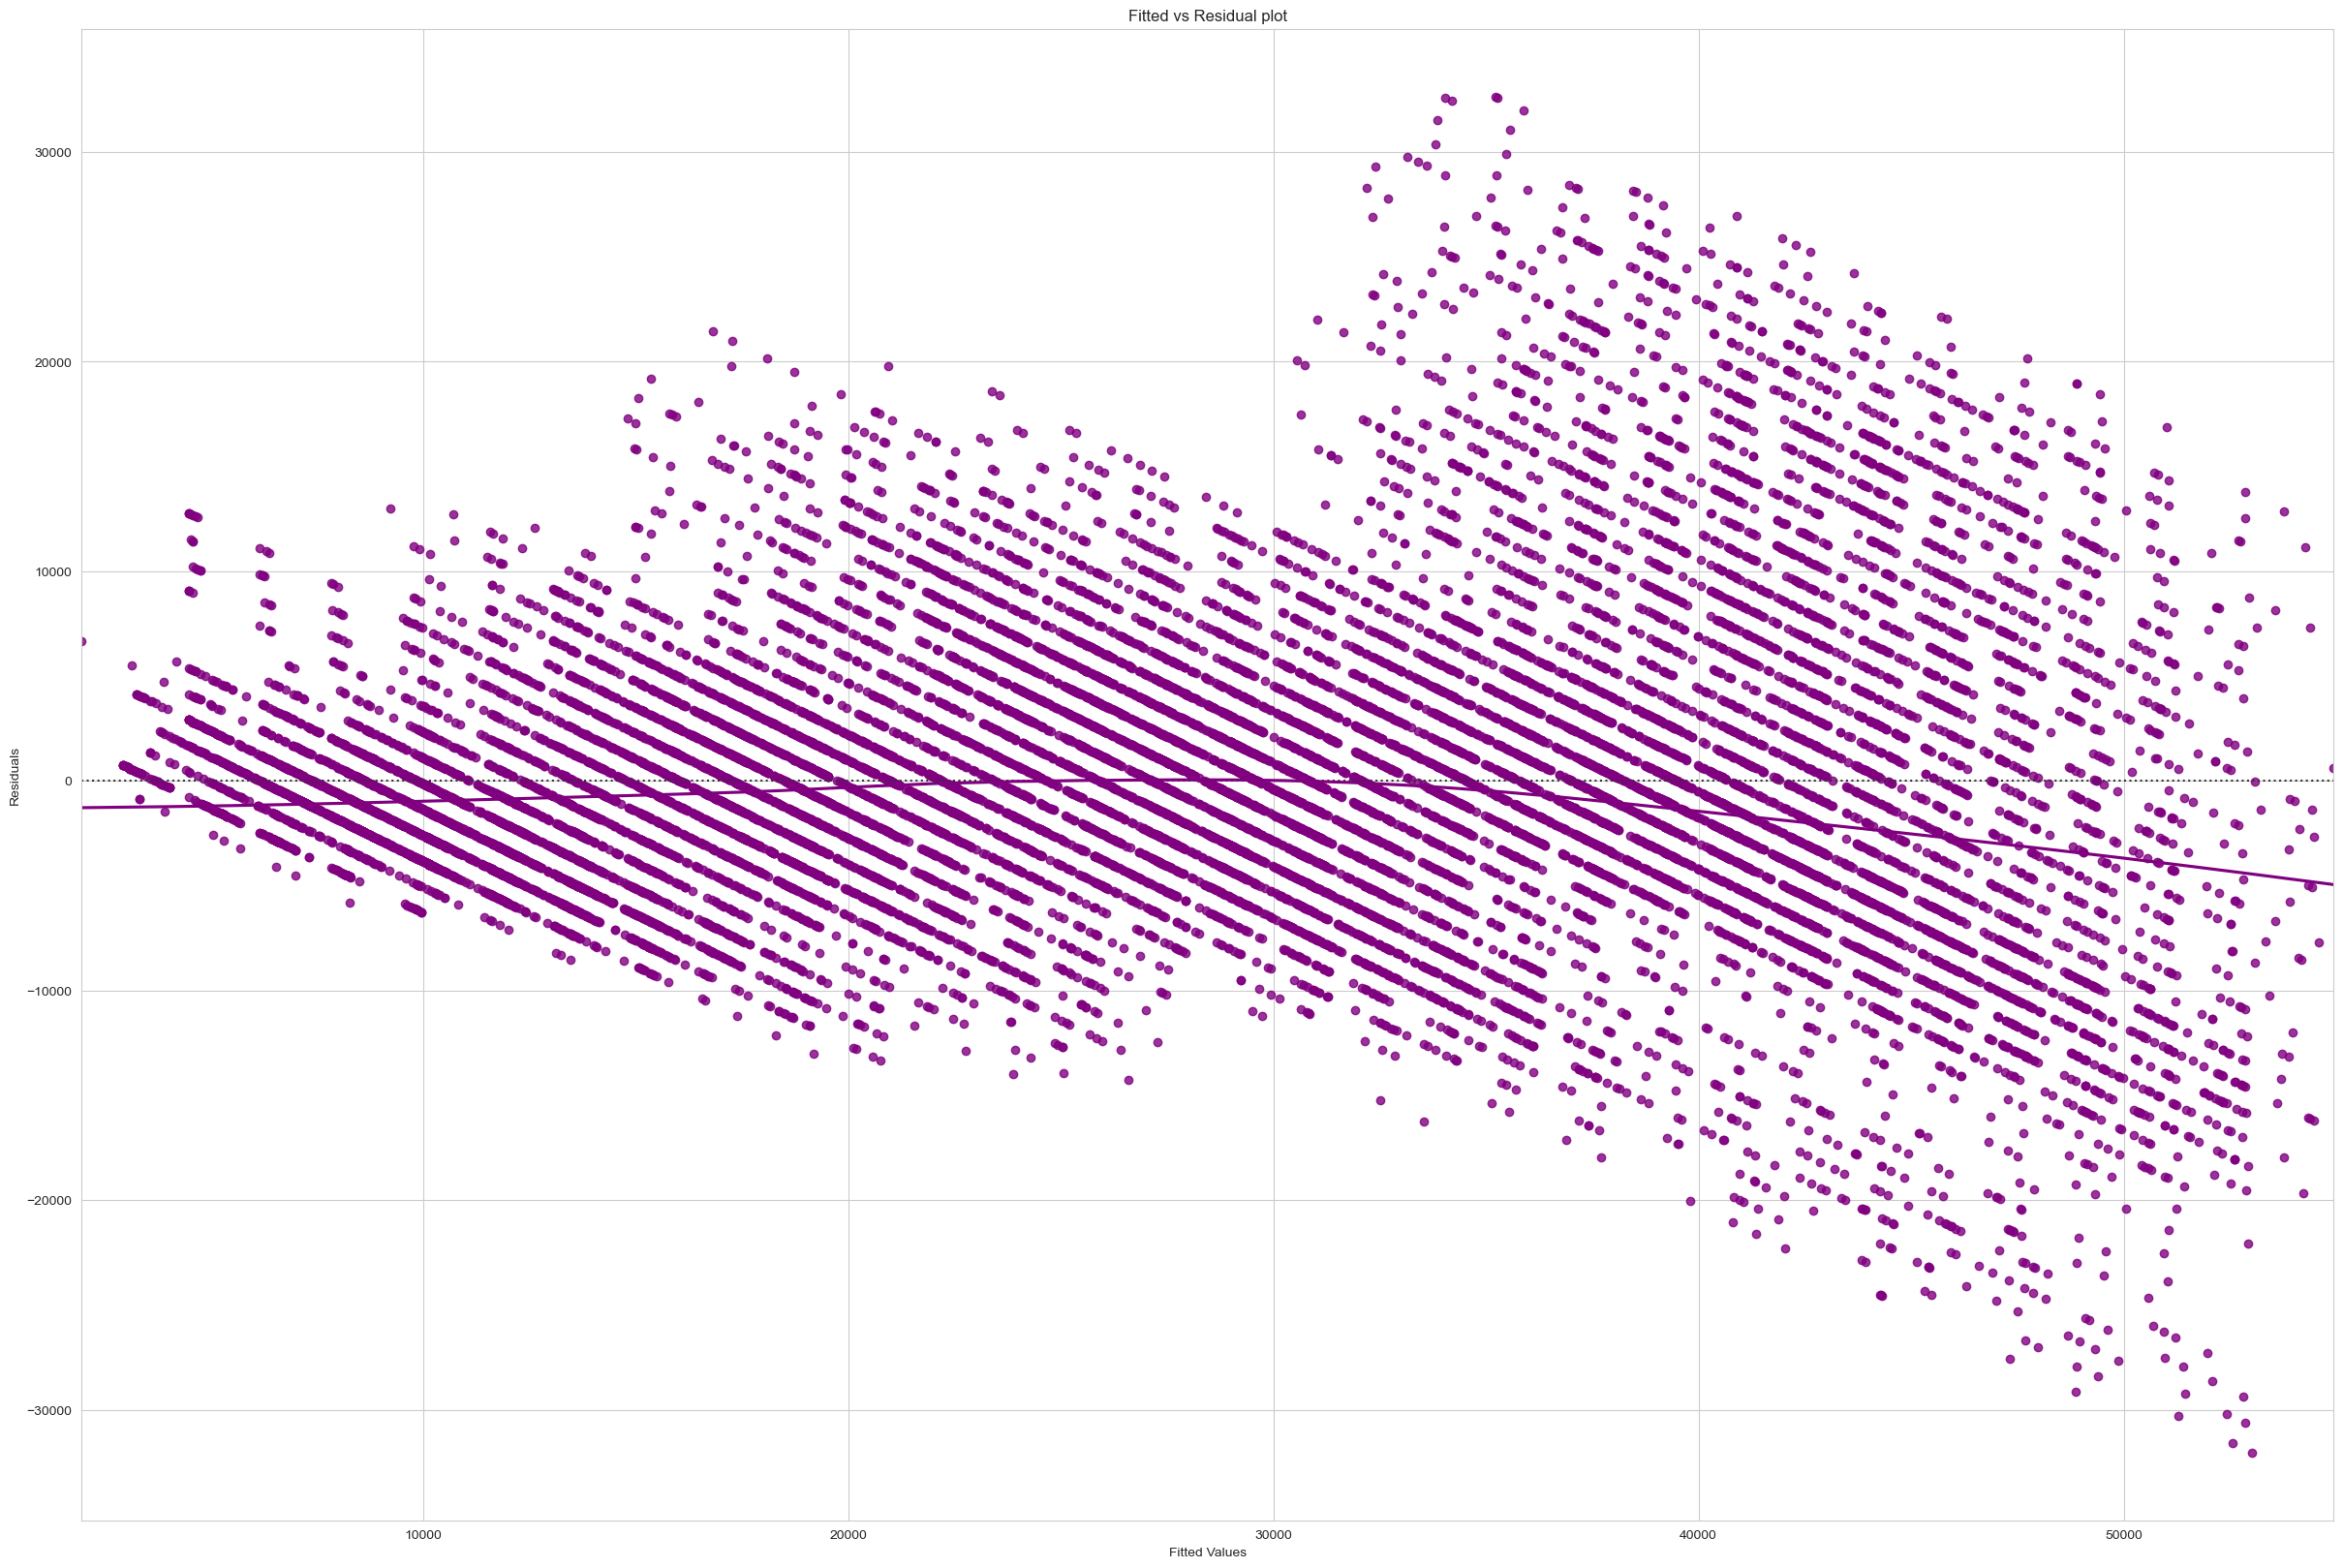

In [394]:
# let us plot the fitted values vs residuals
plt.figure(figsize=(30,20))
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred_tuned,x="Fitted Values",y="Residuals",color="purple",lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

<Axes: xlabel='Residuals', ylabel='Count'>

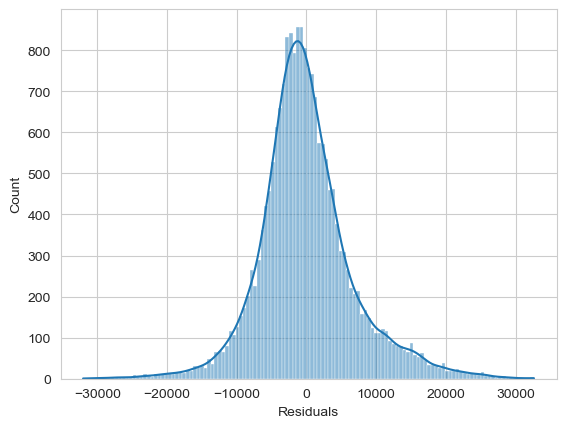

In [395]:
sns.histplot(df_pred_tuned["Residuals"], kde=True)

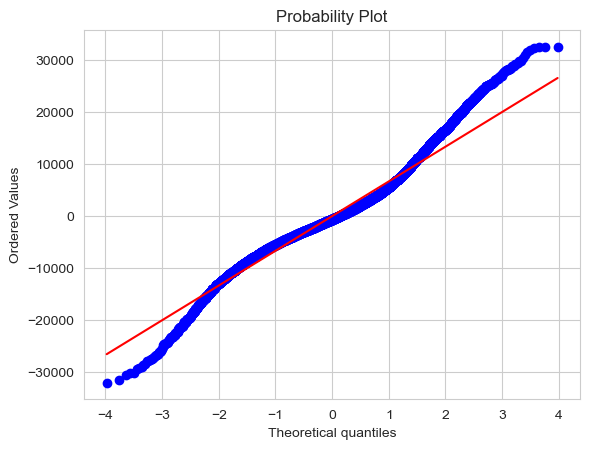

In [396]:
plt.title("Normality of residuals");
stats.probplot(df_pred_tuned["Residuals"],dist="norm",plot=pylab)
plt.show()

In [397]:
name=["F statistic","p-value"]
test=sms.het_goldfeldquandt(df_pred_tuned["Residuals"],X_train_21.astype(('float')))
lzip(name,test)

[('F statistic', 0.995908031460833), ('p-value', 0.5811909711015625)]

#### The p-value is more than 0.05, hence the model is homoscedastic.

In [398]:
# Let us write the equation of linear regression
Equation="insurance cost ="
print(Equation,end=" ")
for i in range(len(X_train_21.columns)):
    if i == 0:
        print(olsres_21.params[i], "+", end=" ")
    elif i != len(X_train_21.columns) - 1:
        print(
            olsres_21.params[i],
            "* (",
            X_train_21.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_21.params[i], "* (", X_train_21.columns[i], ")")

insurance cost = 3390841.831166854 + -54.40155629821339 * ( years_of_insurance_with_us ) +  -1286.1413432283912 * ( regular_checkup_last_year ) +  -199.72934614545315 * ( weight_change_in_last_one_year ) +  1656.8475810300793 * ( covered_by_any_other_company ) +  514.8896802080442 * ( adventure_sports ) +  -1677.2641469977652 * ( year_last_admitted )


insurance cost = 3390841.831166854 + -54.40155629821339 * ( years_of_insurance_with_us ) +  -1286.1413432283912 * ( regular_checkup_last_year ) +  -199.72934614545315 * ( weight_change_in_last_one_year ) +  1656.8475810300793 * ( covered_by_any_other_company ) +  514.8896802080442 * ( adventure_sports ) +  -1677.2641469977652 * ( year_last_admitted )

In [399]:
X_train_21.describe().T

count        mean       std     min     25%  \
const                           20000.0     1.00000  0.000000     1.0     1.0   
years_of_insurance_with_us      20000.0     4.09860  2.606476     0.0     2.0   
regular_checkup_last_year       20000.0     0.65725  0.918934     0.0     0.0   
weight_change_in_last_one_year  20000.0     2.51675  1.687176     0.0     1.0   
covered_by_any_other_company    20000.0     0.30160  0.458964     0.0     0.0   
adventure_sports                20000.0     0.08205  0.274448     0.0     0.0   
year_last_admitted              20000.0  2004.84655  7.282078  1990.0  1999.0   

                                   50%     75%     max  
const                              1.0     1.0     1.0  
years_of_insurance_with_us         4.0     6.0     8.0  
regular_checkup_last_year          0.0     1.0     2.5  
weight_change_in_last_one_year     3.0     4.0     6.0  
covered_by_any_other_company       0.0     1.0     1.0  
adventure_sports                   0.0     0.0     1.0  
year_last_admitted              2005.0  2011.0  2018.0

In [400]:
y_pred_lin_tuned=olsres_21.predict()

In [401]:
olsres_21.rsquared

0.7741934547575589

### TILL HERE, ALL GOOD

#### olsres is the final model and X_train_21 is the final dataset

In [402]:
X_test_2=X_test_1.drop(['smoking_status_formerly smoked','zone_West','smoking_status_Unknown','occupation_Student','weight','bmi','visited_doctor_last_1_year','occupation_Business','other_major_decs_history','age','zone_North','fat_percentage','occupation_Salaried','daily_avg_steps','alcohol_intake','avg_glucose_level','cholesterol_level','gender_Female','heart_decs_history','zone_East','smoking_status_smokes','zone_South','exercise_frequency','smoking_status_never smoked'],
              axis=1)

In [403]:
X_test_1=X_test_1.drop(['occupation_Student','smoking_status_Unknown','weight','zone_West'],axis=1)

### RIDGE tuned - giving worse results

In [404]:
### ridge on X_train_1
ridge=Ridge(alpha=1.0)
ridge_1=ridge.fit(X_train_1,y_train)

In [405]:
y_pred_ridge_1_train=ridge_1.predict(X_train_1)
y_pred_ridge_1_train

array([[44869.23479573],
       [45437.03770053],
       [47088.36178026],
       ...,
       [34161.35473723],
       [28881.54656888],
       [25862.40693472]])

In [406]:
X_test_1.columns

Index(['const', 'years_of_insurance_with_us', 'regular_checkup_last_year',
       'visited_doctor_last_1_year', 'daily_avg_steps', 'age',
       'avg_glucose_level', 'bmi', 'weight_change_in_last_one_year',
       'fat_percentage', 'cholesterol_level', 'covered_by_any_other_company',
       'alcohol_intake', 'exercise_frequency', 'heart_decs_history',
       'other_major_decs_history', 'adventure_sports', 'year_last_admitted',
       'occupation_Business', 'occupation_Salaried', 'gender_Female',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'zone_East', 'zone_North', 'zone_South'],
      dtype='object')

In [407]:
X_train_1.columns

Index(['const', 'years_of_insurance_with_us', 'regular_checkup_last_year',
       'visited_doctor_last_1_year', 'daily_avg_steps', 'age',
       'avg_glucose_level', 'bmi', 'weight_change_in_last_one_year',
       'fat_percentage', 'cholesterol_level', 'covered_by_any_other_company',
       'alcohol_intake', 'exercise_frequency', 'heart_decs_history',
       'other_major_decs_history', 'adventure_sports', 'year_last_admitted',
       'occupation_Business', 'occupation_Salaried', 'gender_Female',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'zone_East', 'zone_North', 'zone_South'],
      dtype='object')

In [408]:
y_pred_ridge_1=ridge_1.predict(X_test_1)
y_pred_ridge_1

array([[10513.76356308],
       [25498.10601023],
       [19661.09242353],
       ...,
       [45937.97832838],
       [11624.51729156],
       [30644.56955144]])

In [409]:
# test
mse1_ridge_1=mean_squared_error(y_test,y_pred_ridge_1)
mse1_ridge_1

44902466.768446736

In [410]:
# train
mse2_ridge_1=mean_squared_error(y_train,y_pred_ridge_1_train)
mse2_ridge_1

46383819.41848257

In [411]:
# test
mape1_ridge_1=mean_absolute_percentage_error(y_test,y_pred_ridge_1)
mape1_ridge_1

0.22210667651240745

In [412]:
# train
mape2_ridge_1=mean_absolute_percentage_error(y_train,y_pred_ridge_1_train)
mape2_ridge_1

0.222244703548494

In [413]:
# test
rmse1_ridge_1=np.sqrt(mean_squared_error(y_test,y_pred_ridge_1))
rmse1_ridge_1

6700.930291269022

In [414]:
# train
rmse2_ridge_1=np.sqrt(mean_squared_error(y_train,y_pred_ridge_1_train))
rmse2_ridge_1

6810.566747230554

In [415]:
# test
r2_ridge_1=ridge_1.score(X_test_1,y_test)
r2_ridge_1

0.7796033647444831

In [416]:
# train
rsq2_ridge_1=ridge_1.score(X_train_1,y_train)
rsq2_ridge_1

0.7743054336152929

In [417]:
### X_train_21
ridge=Ridge(alpha=1.0)
ridge_21=ridge.fit(X_train_21,y_train)

In [418]:
# test
y_pred_ridge_21=ridge_21.predict(X_test_2)
y_pred_ridge_21

array([[10531.62311011],
       [25524.22261344],
       [19739.87363343],
       ...,
       [46115.04159765],
       [11535.47921052],
       [30827.93036085]])

In [419]:
#train
y_pred_ridge_21_train=ridge_21.predict(X_train_21)
y_pred_ridge_21_train

array([[44836.99956877],
       [45542.65456782],
       [46999.34604627],
       ...,
       [34362.46680636],
       [28751.19993492],
       [25941.48177777]])

In [420]:
# test
mse1_ridge_21=mean_squared_error(y_test,y_pred_ridge_21)
mse1_ridge_21

44887636.99197027

In [421]:
# train
mse2_ridge_21=mean_squared_error(y_train,y_pred_ridge_21_train)
mse2_ridge_21

46406832.90188327

In [422]:
ridge_21.coef_

array([[    0.        ,   -54.38177433, -1286.05948635,  -199.732067  ,
         1656.42354546,   514.55183609, -1677.26629192]])

In [423]:
ridge_21.intercept_

array([3390846.1589837])

In [424]:
# test
mape1_ridge_21=mean_absolute_percentage_error(y_test,y_pred_ridge_21)
mape1_ridge_21

0.22190172275201922

In [425]:
# train
mape2_ridge_21=mean_absolute_percentage_error(y_train,y_pred_ridge_21_train)
mape2_ridge_21

0.22215650763979028

In [426]:
# test
rmse1_ridge_21=np.sqrt(mean_squared_error(y_test,y_pred_ridge_21))
rmse1_ridge_21

6699.823653796439

In [427]:
# train
rmse2_ridge_21=np.sqrt(mean_squared_error(y_train,y_pred_ridge_21_train))
rmse2_ridge_21

6812.256080175148

In [428]:
# test
r2_ridge_21=ridge_21.score(X_test_2,y_test)
r2_ridge_21

0.7796761543498707

In [429]:
# train
rsq2_ridge_21=ridge_21.score(X_train_21,y_train)
rsq2_ridge_21

0.7741934545195168

### LASSO tuned

In [430]:
### lasso on train_1
lasso=Lasso(alpha=0.1)
lasso_1=lasso.fit(X_train_1,y_train)

In [431]:
lasso_1.coef_

array([ 0.00000000e+00, -5.45033365e+01, -1.28713160e+03,  2.36851389e+01,
        4.34137754e-02,  1.49321938e+00,  3.42444021e-01,  2.51349585e+00,
       -1.99472727e+02, -3.85689029e+00,  5.55469200e+01,  1.65435397e+03,
        4.14438409e+01,  1.23664776e+01,  1.65813628e+02, -1.45740678e+02,
        5.15772435e+02, -1.67732671e+03, -4.58389586e+01, -1.18216410e+02,
        1.34842720e+02,  9.51119739e+01,  6.24994583e+01, -1.03654112e+01,
        1.77997044e+02,  1.09359505e+02,  2.46197696e+02])

In [432]:
lasso_1.intercept_

array([3390248.64957322])

In [433]:
# train
y_pred_lasso_1_train=lasso_1.predict(X_train_1)
y_pred_lasso_1_train

array([44868.78054518, 45439.05361555, 47087.3032777 , ...,
       34162.75809455, 28881.62783188, 25863.59422325])

In [434]:
# test
y_pred_lasso_1=lasso_1.predict(X_test_1)
y_pred_lasso_1

array([10512.82223448, 25497.27770386, 19661.64425402, ...,
       45938.2823523 , 11623.17644391, 30646.08533896])

In [435]:
# test
mse1_lasso_1=mean_squared_error(y_test,y_pred_lasso_1)
mse1_lasso_1

44901837.37237776

In [436]:
# train
mse2_lasso_1=mean_squared_error(y_train,y_pred_lasso_1_train)
mse2_lasso_1

46383821.053236194

In [437]:
# test
mape1_lasso_1=mean_absolute_percentage_error(y_test,y_pred_lasso_1)
mape1_lasso_1

0.22210290984285636

In [438]:
# train
mape2_lasso_1=mean_absolute_percentage_error(y_train,y_pred_lasso_1_train)
mape2_lasso_1

0.22224346267266729

In [439]:
# test
rmse1_lasso_1=np.sqrt(mean_squared_error(y_test,y_pred_lasso_1))
rmse1_lasso_1

6700.883327769389

In [440]:
# train
rmse2_lasso_1=np.sqrt(mean_squared_error(y_train,y_pred_lasso_1_train))
rmse2_lasso_1

6810.566867246528

In [441]:
# test
r2_lasso_1=lasso_1.score(X_test_1,y_test)
r2_lasso_1

0.7796064540352466

In [442]:
# train
rsq2_lasso_1=lasso_1.score(X_train_1,y_train)
rsq2_lasso_1

0.7743054256609024

In [443]:
### lasso on X_train_21
lasso=Lasso(alpha=0.1)
lasso_21=lasso.fit(X_train_21,y_train)

In [444]:
lasso_21.coef_

array([    0.        ,   -54.36257959, -1286.01003119,  -199.70223911,
        1656.32735352,   513.56446165, -1677.27260998])

In [445]:
lasso_21.intercept_

array([3390858.74950753])

In [446]:
 # train
y_pred_lasso_21_train=lasso_21.predict(X_train_21)
y_pred_lasso_21_train

array([44837.09035598, 45542.86009093, 46999.48520535, ...,
       34361.73696289, 28751.26757003, 25941.46648781])

In [447]:
# test
y_pred_lasso_21=lasso_21.predict(X_test_2)
y_pred_lasso_21

array([10531.76608217, 25524.31393034, 19739.89113032, ...,
       46115.20203427, 11535.48224027, 30827.94465823])

In [448]:
# test
mse1_lasso_21=mean_squared_error(y_test,y_pred_lasso_21)
mse1_lasso_21

44887539.090921566

In [449]:
# train
mse2_lasso_21=mean_squared_error(y_train,y_pred_lasso_21_train)
mse2_lasso_21

46406833.05494981

In [450]:
# test
mape1_lasso_21=mean_absolute_percentage_error(y_test,y_pred_lasso_21)
mape1_lasso_21

0.2219014523539036

In [451]:
# train
mape2_lasso_21=mean_absolute_percentage_error(y_train,y_pred_lasso_21_train)
mape2_lasso_21

0.2221564675126632

In [452]:
# test
rmse1_lasso_21=np.sqrt(mean_squared_error(y_test,y_pred_lasso_21))
rmse1_lasso_21

6699.816347551742

In [453]:
# train
rmse2_lasso_21=np.sqrt(mean_squared_error(y_train,y_pred_lasso_21_train))
rmse2_lasso_21

6812.256091409792

In [454]:
# test
r2_lasso_21=lasso_21.score(X_test_2,y_test)
r2_lasso_21

0.7796766348816383

In [455]:
# train
rsq2_lasso_21=lasso_21.score(X_train_21,y_train)
rsq2_lasso_21

0.774193453774725

### Elastic Net tuned

In [456]:
### ENET on X_train_1
enet=ElasticNet(alpha=1.0,l1_ratio=0.5)
enet_1=enet.fit(X_train_1,y_train)

In [457]:
# train
y_pred_enet_1_train=enet_1.predict(X_train_1)
y_pred_lasso_1_train

array([44868.78054518, 45439.05361555, 47087.3032777 , ...,
       34162.75809455, 28881.62783188, 25863.59422325])

In [458]:
# test
y_pred_enet_1=enet_1.predict(X_test_1)
y_pred_enet_1

array([11707.37098644, 25660.44667078, 19514.06630809, ...,
       46238.21628767, 11543.90433441, 30739.5265263 ])

In [459]:
enet_1.coef_

array([ 0.00000000e+00, -2.35110697e+00, -8.02540092e+02,  2.10418601e+01,
        4.04224154e-02,  1.16457006e+00,  2.53788599e-01,  1.38083607e+00,
       -1.89851273e+02, -2.56177348e+00,  3.36260702e+01,  4.65020360e+02,
        1.98781444e+01,  4.77330830e+00,  1.37381266e+01, -2.08486870e+01,
        6.93859914e+01, -1.67566467e+03,  3.59887817e+00, -1.87398193e+01,
        3.28064579e+01,  1.11064590e+01,  1.08551722e+01, -1.24586447e+01,
        2.24057339e+01, -4.33759991e+00,  3.32462006e+01])

In [460]:
enet_1.intercept_

array([3387018.42784281])

In [461]:
# test
mse1_enet_1=mean_squared_error(y_test,y_pred_enet_1)
mse1_enet_1

45181233.09213977

In [462]:
# train
mse2_enet_1=mean_squared_error(y_train,y_pred_enet_1_train)
mse2_enet_1

46885786.47402604

In [463]:
# test
mape1_enet_1=mean_absolute_percentage_error(y_test,y_pred_enet_1)
mape1_enet_1

0.2228495581161244

In [464]:
# train
mape2_enet_1=mean_absolute_percentage_error(y_train,y_pred_enet_1_train)
mape2_enet_1

0.2235784330594629

In [465]:
# test
rmse1_enet_1=np.sqrt(mean_squared_error(y_test,y_pred_enet_1))
rmse1_enet_1

6721.698676089235

In [466]:
# train
rmse2_enet_1=np.sqrt(mean_squared_error(y_train,y_pred_enet_1_train))
rmse2_enet_1

6847.319656188547

In [467]:
# test
r2_enet_1=enet_1.score(X_test_1,y_test)
r2_enet_1

0.7782350844653323

In [468]:
# train
rsq2_enet_1=enet_1.score(X_train_1,y_train)
rsq2_enet_1

0.7718629603916423

In [469]:
### ENET on X_train_21
enet=ElasticNet(alpha=1.0,l1_ratio=0.5)
enet_21=enet.fit(X_train_21,y_train)

In [470]:
# train
y_pred_enet_21_train=enet_21.predict(X_train_21)
y_pred_enet_21_train

array([45204.17652336, 45800.77331014, 46076.12931085, ...,
       34636.19903631, 28680.79446485, 25897.31275035])

In [471]:
# test
y_pred_enet_21=enet_21.predict(X_test_2)
y_pred_enet_21

array([11779.36783093, 25698.17322423, 19538.4084471 , ...,
       46317.53173112, 11531.27969545, 30736.3908606 ])

In [472]:
enet_21.coef_

array([    0.        ,    -2.28502089,  -802.59137557,  -189.99944256,
         465.35544327,    69.31602981, -1675.59751064])

In [473]:
enet_21.intercept_

array([3387340.48858005])

In [474]:
# test
mse1_enet_21=mean_squared_error(y_test,y_pred_enet_21)
mse1_enet_21

45199700.31287443

In [475]:
# train
mse2_enet_21=mean_squared_error(y_train,y_pred_enet_21_train)
mse2_enet_21

46897023.2028815

In [476]:
# test
mape1_enet_21=mean_absolute_percentage_error(y_test,y_pred_enet_21)
mape1_enet_21

0.22283025743617435

In [477]:
# train
mape2_enet_21=mean_absolute_percentage_error(y_train,y_pred_enet_21_train)
mape2_enet_21

0.22360970272422287

In [478]:
# test
rmse1_enet_21=np.sqrt(mean_squared_error(y_test,y_pred_enet_21))
rmse1_enet_21

6723.072237665934

In [479]:
# train
rmse2_enet_21=np.sqrt(mean_squared_error(y_train,y_pred_enet_21_train))
rmse2_enet_21

6848.140127281385

In [480]:
# test
r2_enet_21=enet_21.score(X_test_2,y_test)
r2_enet_21

0.778144441041811

In [481]:
# train
rsq2_enet_21=enet_21.score(X_train_21,y_train)
rsq2_enet_21

0.7718082846732902

### ENSEMBLE STARTS HERE

In [482]:
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor
gbr=GradientBoostingRegressor(loss='squared_error',n_estimators=50,random_state=42)
gbr=gbr.fit(X_train_21,y_train)

C:\Users\hp\anaconda3\postreset11102023\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [483]:
# train
y_pred_gbr_train=gbr.predict(X_train_21)
y_pred_gbr_train

array([44670.34663769, 42767.95528669, 44705.34522836, ...,
       36768.88570069, 28180.85460298, 26841.17579114])

In [484]:
# test
y_pred_gbr=gbr.predict(X_test_2)
y_pred_gbr

array([10361.24884981, 27579.07670241, 19110.98085005, ...,
       38158.58249462,  9481.78681071, 28351.04666254])

In [485]:
# test
mse1_gbr=mean_squared_error(y_test,y_pred_gbr)
mse1_gbr

39505059.91877993

In [486]:
# train
mse2_gbr=mean_squared_error(y_train,y_pred_gbr_train)
mse2_gbr

40788529.86125474

In [487]:
# test
mape1_gbr=mean_absolute_percentage_error(y_test,y_pred_gbr)
mape1_gbr

0.1967285725711078

In [488]:
# train
mape2_gbr=mean_absolute_percentage_error(y_train,y_pred_gbr_train)
mape2_gbr

0.198437838468967

In [489]:
# test
rmse1_gbr=np.sqrt(mean_squared_error(y_test,y_pred_gbr))
rmse1_gbr

6285.305077621923

In [490]:
# train
rmse2_gbr=np.sqrt(mean_squared_error(y_train,y_pred_gbr_train))
rmse2_gbr

6386.58984601757

In [491]:
# test
r2_gbr=gbr.score(X_test_2,y_test)
r2_gbr

0.8060956800755322

In [492]:
# train
rsq2_gbr=gbr.score(X_train_21,y_train)
rsq2_gbr

0.8015310149979294

In [493]:
br=BaggingRegressor(n_estimators=100,random_state=42)
br=br.fit(X_train_21,y_train)

C:\Users\hp\anaconda3\postreset11102023\Lib\site-packages\sklearn\ensemble\_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [494]:
# train
y_pred_br_train=br.predict(X_train_21)
y_pred_br_train

array([47447.68195238, 47897.40461616, 29076.44819048, ...,
       33836.28      , 28016.53045822, 24596.00098718])

In [495]:
# test
y_pred_br=br.predict(X_test_2)
y_pred_br

array([11042.30209524, 31245.84957143, 17411.74      , ...,
       35509.99533333,  8915.65      , 28398.27637584])

In [496]:
# test
mse1_br=mean_squared_error(y_test,y_pred_br)
mse1_br

47557575.83765965

In [497]:
# train
mse2_br=mean_squared_error(y_train,y_pred_br_train)
mse2_br

27186026.66101618

In [498]:
# test
mape1_br=mean_absolute_percentage_error(y_test,y_pred_br)
mape1_br

0.2084294198969779

In [499]:
# train
mape2_br=mean_absolute_percentage_error(y_train,y_pred_br_train)
mape2_br

0.15253778568100274

In [500]:
# test
rmse1_br=np.sqrt(mean_squared_error(y_test,y_pred_br))
rmse1_br

6896.200101335492

In [501]:
# train
rmse2_br=np.sqrt(mean_squared_error(y_train,y_pred_br_train))
rmse2_br

5214.022119344737

In [502]:
# test
r2_br=br.score(X_test_2,y_test)
r2_br

0.76657118305815

In [503]:
# train
rsq2_br=br.score(X_train_21,y_train)
rsq2_br

0.8677181272283019

### FINALISED MODEL AND INFERENCE TO BE ADDED IN THE REPORT

# END